In [1]:
import sys
sys.path.append('./conclude/newmethod/simulation_final/')
import os
os.chdir('./conclude/newmethod/simulation_final/')

In [2]:
import matplotlib.pyplot as plt
from scipy.special import logit
import seaborn as sns
import numpy as np
import math
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import pandas as pd
from sklearn.metrics import (precision_recall_curve,PrecisionRecallDisplay)
from sklearn.metrics import precision_score,recall_score
from sklearn import metrics 
import seaborn as sns
import os 
import matplotlib.patches as mpatches
from nlcd_user import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from matplotlib.colors import ListedColormap
color_algo={'SVR':(0.8941176470588235, 0.10196078431372557, 0.10980392156862737),'ANN':(0.21568627450980393, 0.4941176470588236, 0.7215686274509804),'CIT':(0.3019607843137256, 0.6862745098039216, 0.29019607843137263),'KRR':(0.5960784313725492, 0.3058823529411765, 0.6392156862745098),'findr':(1.0, 0.4980392156862745, 0.0),'mrpc':(0.9999999999999998, 1.0, 0.19999999999999996)}

In [ ]:
#cmap=sns.choose_colorbrewer_palette("q")

interactive(children=(Dropdown(description='name', options=('Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Paste…

In [3]:
def calculate_precision_recall_MRPC(causal,ind,causal_id=None,indep_id=None):#,yeast=False): # yeast was used for TF based experiment, now it is indv trio based 
    precision_list=[]
    recall_list=[]
    pos=pd.read_csv(causal)
 #   if causal_id:
 #       presultscausal=presultscausal.iloc[causal_id,]
    #presultscausal=presultscausal.iloc[:,:-2]
    #presultscausal.insert(0,column='GroundTruth',value=[1]*len(presultscausal))
    neg=pd.read_csv(ind)
 #   if indep_id:             #pending, see if the idx of these id is zero based or 1 based 
 #       presultsind=presultsind.iloc[indep_id,]
    for fdr in [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]: # 0 not included
    
        pos_cutoff= pos[pos['fdr'] == fdr ]
        if causal_id :
            pos_cutoff=pos_cutoff.iloc[causal_id,]
        neg_cutoff= neg[neg['fdr'] == fdr]
        if indep_id :
            neg_cutoff=neg_cutoff.iloc[indep_id,]
        
        
        #if yeast==False:

            #print(pos_cutoff)
    # Get column names starting with 'edge names'
        edge_columns = [col for col in pos_cutoff.columns if col.startswith('edge names')]
        TP = 0

        # Iterate through each row
        for index, row in pos_cutoff.iterrows():
            # Iterate through each edge column in the row
            for col in edge_columns:
                # Check if 'A|B' is present in the current edge column
                if 'A|B' == row[col]:
                    TP += 1
                    # Break the inner loop once 'A|B' is found in the current row
                    break
        FN=len(pos_cutoff)-TP


        FP= 0 
        edge_columns = [col for col in neg_cutoff.columns if col.startswith('edge names')]
        # Iterate through each row
        for index, row in neg_cutoff.iterrows():
            # Iterate through each edge column in the row
            for col in edge_columns:
                # Check if 'A|B' is present in the current edge column
                if 'A|B' == row[col]:
                    FP += 1
                    # Break the inner loop once 'A|B' is found in the current row
                    break
        TN=len(neg_cutoff)-FP

        precision=TP/(TP+FP)
        recall=TP/(TP+FN)

        precision_list.append(precision)
        recall_list.append(recall)
        #precision_list[-1]=precision_list[-2]
        #else: 
                   #print(pos_cutoff)
    # Get column names starting with 'edge names'
        #     TP = 0

        #     # Iterate through each row
        #     for index, row in pos_cutoff.iterrows():
        #         # Iterate through each edge column in the row
        #         if 1 == row['Present']:
        #             TP += 1
        #     FN=len(pos_cutoff)-TP


        #     FP= 0 
        #     # Iterate through each row
        #     for index, row in neg_cutoff.iterrows():
        #             # Check if 'A|B' is present in the current edge column
        #         if 1 == row['Present']:
        #             FP += 1
        #     TN=len(neg_cutoff)-FP

        #     precision=TP/(TP+FP)
        #     recall=TP/(TP+FN)

        #     precision_list.append(precision)
        #     recall_list.append(recall)
        # #precision_list[-1]=precision_list[-2]
    
    # get the minimum recall and extent it to the left 
    #min_pair = min(zip(precision_list, recall_list), key=lambda pair: pair[1])
    #max_pair = max(zip(precision_list, recall_list), key=lambda pair: pair[1])
    #print(max_pair)
    #precision_list.insert(0,min_pair[0])
    precision_list.insert(0,precision_list[0])
    recall_list.insert(0,0)
    # extending to the right 
    if 1 not in recall_list:
        #0.5 because our random classifier number of false positives
        precision_list.append(0.5)
        recall_list.append(1)
    #print("Without sorting")
    #print(precision_list)
    #print(recall_list)
    #sorted_pairs = sorted(zip(precision_list, recall_list), key=lambda x: x[1],reverse=True)
    #precision_sorted, recall_sorted = zip(*sorted_pairs)
    assert 1 in recall_list, "1 is not present in the recall list"
    return list(reversed(precision_list)),list(reversed(recall_list))
    #return list(precision_sorted),list(recall_sorted)






In [4]:
def calculate_avgprecision_MRPC(causal,ind,causal_id=None,indep_id=None):
    precision,recall=calculate_precision_recall_MRPC(causal,ind,causal_id,indep_id)
    # Zip the lists and sort based on recall_mrpc
    # sorted_pairs = sorted(zip(precision_mrpc, recall_mrpc), key=lambda x: x[1])
    # average_precision_score = 0
    # for i in range(1, len(sorted_pairs)):
    #     precision_n = sorted_pairs[i][0]
    #     recall_n = sorted_pairs[i][1]
    #     recall_n_minus_1 = sorted_pairs[i-1][1]
    #     increment = (recall_n - recall_n_minus_1) * precision_n
    #     average_precision_score += increment

    # return average_precision_score
    average_precision_score = 0
    for i in range(0, len(precision)-1):
        precision_n = precision[i]
        recall_n = recall[i]
        recall_n_minus_1 = recall[i+1]
        increment = (recall_n - recall_n_minus_1) * precision_n
        average_precision_score += increment
    #print(-np.sum(np.diff(recall) * np.array(precision)[:-1]))
    return average_precision_score



In [5]:
def calculate_avgprecision_manual(precision,recall):
    # Zip the lists and sort based on recall_mrpc
    # making them numpy arrays before zipping and sorting to avoid decimal loss
    #sorted_pairs = sorted(zip(precision, recall), key=lambda x: x[1])
    average_precision_score = 0
    for i in range(0, len(precision)-1):
        precision_n = precision[i]
        recall_n = recall[i]
        recall_n_minus_1 = recall[i+1]
        increment = (recall_n - recall_n_minus_1) * precision_n
        average_precision_score += increment
    print(-np.sum(np.diff(recall) * np.array(precision)[:-1]))
    return average_precision_score


Without sorting
[0.5182239893969516, 0.5182239893969516, 0.5151890886546807, 0.5118203309692672, 0.5143348623853211, 0.5155555555555555, 0.5153005464480874, 0.5174449812130971, 0.5147835269271384, 0.5140771637122002, 0.5131240349974266, 0.5127942681678608, 0.5119714722363728, 0.5106167846309403, 0.5113008538422903, 0.5114885114885115, 0.5109235352532274, 0.5116164112703905, 0.5118343195266272, 0.511307767944936, 0.5107632093933464, 0.5]
[0, 0.6337115072933549, 0.673419773095624, 0.7017828200972447, 0.726904376012966, 0.7520259319286872, 0.7641815235008104, 0.7811993517017828, 0.7901134521880064, 0.7990275526742301, 0.8079416531604539, 0.8119935170178282, 0.8144246353322528, 0.8184764991896273, 0.8249594813614263, 0.8298217179902755, 0.8338735818476499, 0.8387358184764991, 0.8411669367909238, 0.8427876823338736, 0.8460291734197731, 1]
[0.5, 0.5107632093933464, 0.511307767944936, 0.5118343195266272, 0.5116164112703905, 0.5109235352532274, 0.5114885114885115, 0.5113008538422903, 0.5106167

0.514530971987919

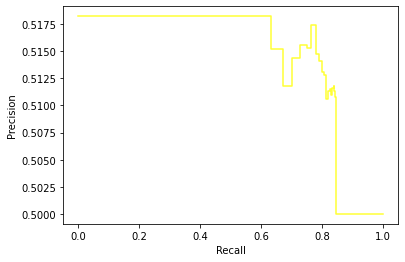

In [ ]:
# precision_mrpc,recall_mrpc=calculate_precision_recall_MRPC('./results/journal/simulation/MRPC/yeast_results/yeast_indv/1_trios_mrpc.csv','./results/journal/simulation/MRPC/yeast_results/yeast_indv/0_trios_mrpc.csv')#,causal_id=[1,5,8])
# print(precision_mrpc)
# print(recall_mrpc)
# precision_davis,recall_davis=davis_goadrich_interpolation(precision_mrpc,recall_mrpc,positive=100)
# disp = PrecisionRecallDisplay(precision=precision_mrpc, recall=recall_mrpc)
# disp.plot(color=color_algo['mrpc'])
# calculate_avgprecision_MRPC('./results/journal/simulation/MRPC/yeast_results/yeast_indv/1_trios_mrpc.csv','./results/journal/simulation/MRPC/yeast_results/yeast_indv/0_trios_mrpc.csv')
# #ax.set_ylim([0, 1])
# #plt.scatter(recall_mrpc,precision_mrpc)


In [ ]:
#precision_mrpc,recall_mrpc=calculate_precision_recall_MRPC('./results/journal/simulation/MRPC/yeast_results/yeast_indv/1_trios_mrpc.csv','./results/journal/simulation/MRPC/yeast_results/yeast_indv/0_trios_mrpc.csv')

In [ ]:

#precision_mrpc_sim,recall_mrpc_sim=calculate_precision_recall_MRPC("./results/journal/simulation/MRPC/sim_results/edges_robust/Linear1000mrpc.csv","./results/journal/simulation/MRPC/sim_results/edges_robust/Indp1000mrpc.csv")

In [ ]:
#recall_mrpc_sim

[0,
 0.95,
 0.95,
 0.95,
 0.95,
 0.96,
 0.97,
 0.97,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.99,
 0.99,
 1.0,
 1.0,
 1]

In [5]:
# new function 
def calculate_precision_recall(causal,ind,causal_id=None,indep_id=None):
    #print("using new function, python inbuilt")
    precision=[]
    recall=[]
    presultscausal=pd.read_csv(causal)
    if causal_id:
        presultscausal=presultscausal.iloc[causal_id,]
    presultscausal=presultscausal.iloc[:,:-2]
    presultscausal.insert(0,column='GroundTruth',value=[1]*len(presultscausal))
    presultsind=pd.read_csv(ind)
    if indep_id:
        presultsind=presultsind.iloc[indep_id,]
    presultsind=presultsind.iloc[:,:-2]
    presultsind.insert(0,column='GroundTruth',value=[0]*len(presultsind))
    pMix=pd.concat([presultscausal,presultsind],ignore_index=True)
    if 'p_cit' in pMix.columns:
        pMix.rename(columns={'p_cit':'p_final'}, inplace=True)
    gt=pMix['GroundTruth']
    pred=pMix['p_final']
    mask = ~np.isnan(pred)
    gt=gt[mask]
    pred=pred[mask]
    pred=1-pred  # taking 1 minus , because in our case lesser the p-value, the better. but in the curve function higher the better
    #the function returns decreasing recall values so find the first precision and extend it 
    precision,recall,thresholds=precision_recall_curve(gt,pred,pos_label=1)
    precision[-1]=precision[-2]
    assert 1 in recall, "1 is not present in the recall list"
    return precision,recall

        

In [6]:
# new function 
def calculate_precision_recall_findr(causal,ind,causal_id=None,indep_id=None):
    #print("using new function, python inbuilt")
    precision=[]
    recall=[]
    presultscausal=pd.read_csv(causal)
    #print(presultscausal)
    if causal_id:
        presultscausal=presultscausal.iloc[causal_id,]
    #we need all the columns so commenting it out to delselect the last column 
    #presultscausal=presultscausal.iloc[:,:-1]
    presultscausal.insert(0,column='GroundTruth',value=[1]*len(presultscausal))
    presultsind=pd.read_csv(ind)
    if indep_id:
        presultsind=presultsind.iloc[indep_id,]
    #we need all the columns so commenting it out to delselect the last column 
    #presultsind=presultsind.iloc[:,:-1]
    presultsind.insert(0,column='GroundTruth',value=[0]*len(presultsind))
    pMix=pd.concat([presultscausal,presultsind],ignore_index=True)
    #print(pMix)
    if 'p_val' in pMix.columns:
        #print("hi")
        pMix.rename(columns={'p_val':'p_final'}, inplace=True)
    gt=pMix['GroundTruth']
    pred=pMix['p_final']
    mask = ~np.isnan(pred)
    gt=gt[mask]
    pred=pred[mask]
    #findr it is all probabilities, so commenting it
    #pred=1-pred  # taking 1 minus , because in our case lesser the p-value, the better. but in the curve function higher the better
    #the function returns decreasing recall values so find the first precision and extend it 
    precision,recall,thresholds=precision_recall_curve(gt,pred,pos_label=1)
    precision[-1]=precision[-2]
    assert 1 in recall, "1 is not present in the recall list"
    return precision,recall
            

In [ ]:
# # new function 
# def calculate_precision_recall_polymr(causal,ind,causal_id=None,indep_id=None):
#     #print("using new function, python inbuilt")
#     precision=[]
#     recall=[]
#     presultscausal=pd.read_csv(causal)
#     if causal_id:
#         presultscausal=presultscausal.iloc[causal_id,]
#     presultscausal=presultscausal.iloc[:,:-1]
#     presultscausal.insert(0,column='GroundTruth',value=[1]*len(presultscausal))
#     presultsind=pd.read_csv(ind)
#     if indep_id:
#         presultsind=presultsind.iloc[indep_id,]
#     presultsind=presultsind.iloc[:,:-1]
#     presultsind.insert(0,column='GroundTruth',value=[0]*len(presultsind))
#     pMix=pd.concat([presultscausal,presultsind],ignore_index=True)
#     print(pMix)
#     if 'pval_null_model' in pMix.columns:
#         pMix.rename(columns={'pval_null_model':'p_final'}, inplace=True)
#     gt=pMix['GroundTruth']
#     pred=pMix['p_final']
#     mask = ~np.isnan(pred)
#     gt=gt[mask]
#     pred=pred[mask]
#     #polymr it is all p values 
#     pred=1-pred  # taking 1 minus , because in our case lesser the p-value, the better. but in the curve function higher the better
#     #the function returns decreasing recall values so find the first precision and extend it 
#     precision,recall,thresholds=precision_recall_curve(gt,pred,pos_label=1)
#     precision[-1]=precision[-2]
#     return precision,recall
            

In [7]:
def read_data(data):

    #read the input file 
    fo=open(data, "r")
    L=[]
    A=[]
    B=[]
# the simulated data is generated with a seed at the start of the file
# so we skip it, but not for the yeast data 
# if yeast is present then dont read the seed line
    if(data.find('yeast')==-1 and data.find('human')==-1): #if yeast is not present
        line=fo.readline() # read the line, the control will start from the next line 

    while(1):
    # the first line of the trio is the parameter configuration, skip it 
        line=fo.readline()
    # read the genotype information 
        line=fo.readline()
        if line== "" :
            break
        l = [j for j in line.split()]
        L.append(np.array([int(i) for i in l]))
        line=fo.readline()
        a = [j for j in line.split()]
        A.append(np.array([float(i) for i in a]))
        line=fo.readline()
        b = [j for j in line.split()]
        B.append(np.array([float(i) for i in b]))
#combine all the samples into a list 
    dataset = [i for i in zip(L,A,B)]
    fo.close()
    return dataset

In [8]:
# new function for average precision score
def calculate_avgprecision(causal,ind,causal_id=None,indep_id=None):
    presultscausal=pd.read_csv(causal)
    if causal_id:
        presultscausal=presultscausal.iloc[causal_id,]
    presultscausal=presultscausal.iloc[:,:-2]
    presultscausal.insert(0,column='GroundTruth',value=[1]*len(presultscausal))
    presultsind=pd.read_csv(ind)
    if indep_id:
        presultsind=presultsind.iloc[indep_id,]
    presultsind=presultsind.iloc[:,:-2]
    presultsind.insert(0,column='GroundTruth',value=[0]*len(presultsind))
    pMix=pd.concat([presultscausal,presultsind],ignore_index=True)
    if 'p_cit' in pMix.columns:
        pMix.rename(columns={'p_cit':'p_final'}, inplace=True)
    gt=pMix['GroundTruth']
    pred=pMix['p_final']
    mask = ~np.isnan(pred)
    gt=gt[mask]
    pred=pred[mask]
    pred=1-pred  # taking 1 minus , because in our case lesser the p-value, the better. but in the curve function higher the better
    #the function returns decreasing recall values so find the first precision and extend it 
    return average_precision_score(gt,pred,pos_label=1)


        

In [9]:
def davis_goadrich_interpolation(precision, recall, positive, num=100):
    """Interpolation of the precision-recall curve according to
    Davis and Goadrich [1]_.

    Davis and Goadrich propose an hyperbolic interpolation to define the
    precision-recall curve. Values on the precision-recall curve are interpolated such
    as in the equation of section 4. of [1]_.

    Parameters
    ----------
    precision : ndarray of shape (n_samples,)
        Precision values as returned by :func:`~sklearn.metrics.precision_recall_curve`.

    recall : ndarray of shape (n_samples,)
        Recall values as returned by :func:`~sklearn.metrics.precision_recall_curve`.

    positive : int
        The total number of positive samples in the dataset used when calling
        :func:`~sklearn.metrics.precision_recall_curve`.

    num : int, default=100
        Number of points to interpolate between sub-integral true positive values.

    References
    ----------
    [1] Davis, Jesse, and Mark Goadrich.
        "The relationship between Precision-Recall and ROC curves."
        Proceedings of the 23rd international conference on Machine learning.
        2006.
    """
    # Remove the last value of precision and recall as it corresponds to the
    # point (0, 1) and will lead to a division by zero during interpolation
    # We add this value back later.
    precision=np.array(precision)
    recall=np.array(recall)
    precision_last,recall_last=precision[-1],recall[-1]
    precision, recall = precision[:-1], recall[:-1]
    # Invert also the order to have an increasing number of true positive later on
    precision, recall = precision[::-1], recall[::-1]
    true_positive = (recall * positive).round()
    false_positive = ((recall * positive) * (1 - precision) / precision).round()

    indices = np.arange(len(true_positive))

    def recall_interpolation(true_positive_start, true_positive_stop, positive, num):
        return np.linspace(true_positive_start, true_positive_stop, num=num) / positive

    def precision_interpolation(
        true_positive_start,
        true_positive_stop,
        false_positive_start,
        false_positive_stop,
        num,
    ):
        x = np.linspace(true_positive_start, true_positive_stop, num=num)
        increment_denominator = (
            (false_positive_stop - false_positive_start)
            / (true_positive_stop - true_positive_start)
            * (x - true_positive_start)
        )
        return x / (x + false_positive_start + increment_denominator)

    # We use a double list to concatenate all the element afterwards
    # Add back the PR point corresponding to the point (0, 1) 
    # In our case the point (0,1) need not be 1, it moved to the left, so instead of 1, it is of some value. 
    recall_interp, precision_interp = [[recall_last]], [[precision_last]]
    for indices_start, indices_stop in zip(indices[:-1], indices[1:]):
        # Interpolate sub-integral values
        true_positive_start = true_positive[indices_start]
        true_positive_stop = true_positive[indices_stop]
        false_positive_start = false_positive[indices_start]
        false_positive_stop = false_positive[indices_stop]
        if np.isclose(true_positive_start, true_positive_stop):
            # Discontinuity in the PR curve where true positive is constant
            # and false positive is increasing
            continue

        recall_interp.append(
            recall_interpolation(
                true_positive_start,
                true_positive_stop,
                positive,
                num,
            )
        )
        precision_interp.append(
            precision_interpolation(
                true_positive_start,
                true_positive_stop,
                false_positive_start,
                false_positive_stop,
                num,
            )
        )

    # Revert the order to be consistent with the output of precision_recall_curve
    return np.hstack(precision_interp)[::-1], np.hstack(recall_interp)[::-1]

In [10]:
# nlcd_dir="./results/journal/simulation/nlcd/"
# cit_dir="./results/journal/simulation/cit/"
# findr_dir="./results/journal/simulation/findr/"
# mrpc_dir="./results/journal/simulation/MRPC/sim_results/edges_robust/"

# for i in [ '500'] :
#     for j in ['Linear']:
#         for k in [ '500']: # put 100 permutations in supplementary 
#             #precision_nlmr_SVR, recall_nlmr_SVR = calculate_precision_recall(nlcd_dir + j + "SVR" + i + "s" + k + "perm.csv", nlcd_dir+"IndpSVR" + i + "s" + k + "perm.csv")
#             precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall(nlcd_dir + j + "KRR" + i + "s" + k + "perm.csv", nlcd_dir+"IndpKRR" + i + "s" + k + "perm.csv")
#             manual_avgprecision= calculate_avgprecision_manual(precision_nlmr_KRR,recall_nlmr_KRR)
#             #precision_sorted=list(precision_sorted)
#             #recall_sorted=list(recall_sorted)
#             print("manual",manual_avgprecision)
#             average_precision = calculate_avgprecision(nlcd_dir + j + "KRR" + i + "s" + k + "perm.csv", nlcd_dir+"IndpKRR" + i + "s" + k + "perm.csv")
#             #precision_nlmr_ANN, recall_nlmr_ANN = calculate_precision_recall(nlcd_dir + j + "ANN" + i + "s" + k + "perm.csv", nlcd_dir+"IndpANN" + i + "s" + k + "perm.csv")
#             #precision_CIT, recall_CIT = calculate_precision_recall(cit_dir + j + i + "cit" + k + "perm.csv", cit_dir+"Indp" + i + "cit" + k + "perm.csv")
#             #precision_findr, recall_findr = calculate_precision_recall_findr(findr_dir + j + i  +"findr"+ ".csv", findr_dir + "Indp" + i +"findr"  + ".csv")
#             #precision_mrpc, recall_mrpc = calculate_precision_recall_MRPC(mrpc_dir + j + i  +"mrpc"+ ".csv", mrpc_dir + "Indp" + i +"mrpc"  + ".csv")
#             #curr_ax = ax[plot_index]
# print(average_precision)


In [11]:
# new function for average precision score
def calculate_avgprecision_findr(causal,ind,causal_id=None,indep_id=None):
    presultscausal=pd.read_csv(causal)
    if causal_id:
        presultscausal=presultscausal.iloc[causal_id,]
    #presultscausal=presultscausal.iloc[:,:-2]
    presultscausal.insert(0,column='GroundTruth',value=[1]*len(presultscausal))
    presultsind=pd.read_csv(ind)
    if indep_id:
        presultsind=presultsind.iloc[indep_id,]
    #presultsind=presultsind.iloc[:,:-2]
    presultsind.insert(0,column='GroundTruth',value=[0]*len(presultsind))
    pMix=pd.concat([presultscausal,presultsind],ignore_index=True)
    if 'p_val' in pMix.columns:
        pMix.rename(columns={'p_val':'p_final'}, inplace=True)
    gt=pMix['GroundTruth']
    pred=pMix['p_final']
    mask = ~np.isnan(pred)
    gt=gt[mask]
    pred=pred[mask]
    #pred=1-pred  # findr, no 1-minus
    #the function returns decreasing recall values so find the first precision and extend it 
    return average_precision_score(gt,pred,pos_label=1)


        

In [12]:
def make_table(causal,ind,causal_id=None,indep_id=None,newfunc=True):
    precision=[]
    recall=[]
    TN=[]
    FN=[]
    FP=[]
    TP=[]
    presultscausal=pd.read_csv(causal)
    if causal_id:
        presultscausal=presultscausal.iloc[causal_id,]
    presultscausal=presultscausal.iloc[:,:-2]
    presultscausal.insert(0,column='GroundTruth',value=[1]*len(presultscausal))
    presultsind=pd.read_csv(ind)
    if indep_id:
        presultsind=presultsind.iloc[indep_id,]
    presultsind=presultsind.iloc[:,:-2]
    presultsind.insert(0,column='GroundTruth',value=[0]*len(presultsind))
    pMix=pd.concat([presultscausal,presultsind],ignore_index=True)
    if 'p_cit' in pMix.columns:
        pMix.rename(columns={'p_cit':'p_final'}, inplace=True)
    if newfunc==True:
        print("using new function")
        gt=pMix['GroundTruth']
        pred=pMix['p_final']
        mask = ~np.isnan(pred)
        gt=gt[mask]
        pred=pred[mask]
        pred=1-pred  # taking 1 minus , because in our case lesser the p-value, the better. but in the curve function higher the better
        #the function returns decreasing recall values so find the first precision and extend it 
        precision,recall,thresholds=precision_recall_curve(gt,pred,pos_label=1)
        #remove the last value from precision and recall 
        precision.resize(precision.size-1)
        recall.resize(recall.size-1)
        table=pd.DataFrame(np.column_stack([1-thresholds,precision,recall]),columns=['p_cutoffs','precision','recall'])
        table=table.sort_values(['p_cutoffs'])
    else:
        print("Using old function")
        # removing NaN values, CIT might throw up some NaN values 
        uniq_val=np.unique(pMix['p_final'])
        uniq_val = uniq_val[~np.isnan(uniq_val)]
        for j in range(0,len(uniq_val)):
            i=uniq_val[j]
            #if j==0:  ## extrapolate to the left side 
            #    pMix['results']=pMix.apply (lambda row: 1 if row['p_final'] <=i   else 0, axis=1)
            #    precision.append(precision_score(pMix['GroundTruth'],pMix['results']))
            #    recall.append(0)
            pMix['results']=pMix.apply (lambda row: 1 if row['p_final'] <=i   else 0, axis=1)
            confusion_matrix = metrics.confusion_matrix(pMix['GroundTruth'], pMix['results']) 
            TN.append(confusion_matrix[0][0])
            FN.append(confusion_matrix[1][0])
            FP.append(confusion_matrix[0][1])
            TP.append(confusion_matrix[1][1])
            precision.append(precision_score(pMix['GroundTruth'],pMix['results']))
            recall.append(recall_score(pMix['GroundTruth'],pMix['results']))

        table=pd.DataFrame(np.column_stack([uniq_val,TP,FP,TN,FN,precision,recall]),columns=['p cutoffs','TP','FP','TN','FN','precision','recall'])

            
    return table

In [13]:
def make_table_findr(causal,ind,causal_id=None,indep_id=None,newfunc=True):
    precision=[]
    recall=[]
    TN=[]
    FN=[]
    FP=[]
    TP=[]
    presultscausal=pd.read_csv(causal)
    if causal_id:
        presultscausal=presultscausal.iloc[causal_id,]
    #presultscausal=presultscausal.iloc[:,:-2]
    presultscausal.insert(0,column='GroundTruth',value=[1]*len(presultscausal))
    presultsind=pd.read_csv(ind)
    if indep_id:
        presultsind=presultsind.iloc[indep_id,]
    #presultsind=presultsind.iloc[:,:-2]
    presultsind.insert(0,column='GroundTruth',value=[0]*len(presultsind))
    pMix=pd.concat([presultscausal,presultsind],ignore_index=True)
    if 'p_val' in pMix.columns:
        pMix.rename(columns={'p_val':'p_final'}, inplace=True)
    if newfunc==True:
        print("using new function")
        gt=pMix['GroundTruth']
        pred=pMix['p_final']
        mask = ~np.isnan(pred)
        gt=gt[mask]
        pred=pred[mask]
        #pred=1-pred  # taking 1 minus , because in our case lesser the p-value, the better. but in the curve function higher the better
        #the function returns decreasing recall values so find the first precision and extend it 
        precision,recall,thresholds=precision_recall_curve(gt,pred,pos_label=1)
        #remove the last value from precision and recall 
        precision[-1]=precision[-2]
        precision.resize(precision.size-1)
        recall.resize(recall.size-1)
        table=pd.DataFrame(np.column_stack([thresholds,precision,recall]),columns=['probability','precision','recall'])
        table=table.sort_values(['probability'])
    else:
        print("Using old function")
        # removing NaN values, CIT might throw up some NaN values 
        uniq_val=np.unique(pMix['p_final'])
        uniq_val = uniq_val[~np.isnan(uniq_val)]
        for j in range(0,len(uniq_val)):
            i=uniq_val[j]
            #if j==0:  ## extrapolate to the left side 
            #    pMix['results']=pMix.apply (lambda row: 1 if row['p_final'] <=i   else 0, axis=1)
            #    precision.append(precision_score(pMix['GroundTruth'],pMix['results']))
            #    recall.append(0)
            pMix['results']=pMix.apply (lambda row: 1 if row['p_final'] <=i   else 0, axis=1)
            confusion_matrix = metrics.confusion_matrix(pMix['GroundTruth'], pMix['results']) 
            TN.append(confusion_matrix[0][0])
            FN.append(confusion_matrix[1][0])
            FP.append(confusion_matrix[0][1])
            TP.append(confusion_matrix[1][1])
            precision.append(precision_score(pMix['GroundTruth'],pMix['results']))
            recall.append(recall_score(pMix['GroundTruth'],pMix['results']))

        table=pd.DataFrame(np.column_stack([uniq_val,TP,FP,TN,FN,precision,recall]),columns=['p cutoffs','TP','FP','TN','FN','precision','recall'])

            
    return table

In [ ]:
# varcausalyeast=pd.read_csv('../../../findr/findrfiles/scripts/var_indices/yeast_wilko_var_causal_'+str(0.25)+'.csv',header=None)[0].to_list()
# varindepyeast=pd.read_csv('../../../findr/findrfiles/scripts/var_indices/yeast_wilko_var_indep_'+str(0.25)+'.csv',header=None)[0].to_list()
# findr_table=make_table_findr("../../../findr/findrfiles/scripts/findr_yeast/yeast_1_1234_findr.csv","../../../findr/findrfiles/scripts/findr_yeast/yeast_0_1234_findr.csv",causal_id=varcausalyeast,indep_id=varindepyeast)
# nlcd_table=make_table("./results/journal/yeast/wilko10runs/nlcd/yeast_causal"+str(1)+".csv", "./results/journal/yeast/wilko10runs/nlcd/yeast_indp"+str(1)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
# findr_table.to_csv("findr_table.csv")
# nlcd_table.to_csv("nlcd_table.csv")


using new function
using new function


In [14]:
def make_ranking_table(causal,ind):
    presultscausal=pd.read_csv(causal)
    if 'p_cit' in presultscausal.columns:
        presultscausal.rename(columns={'p_cit':'p_final'}, inplace=True)
    presultscausal.insert(0,column='GroundTruth',value=['causal']*len(presultscausal))
    presultsind=pd.read_csv(ind)
    if 'p_cit' in presultsind.columns:
        presultsind.rename(columns={'p_cit':'p_final'}, inplace=True)
    presultsind.insert(0,column='GroundTruth',value=['independent']*len(presultsind))
    presultscausal=presultscausal[['p_final','GroundTruth']]
    presultsind=presultsind[['p_final','GroundTruth']]
    finaltable=presultscausal.append(presultsind)
    finaltable.sort_values(['p_final'],inplace=True)
    
    return finaltable
    

In [15]:
def overlap_endpoints(L,A,p):
    # Calculate mu_1: mean of A where L == 1
    mu_1 = A[L == 1].mean()

    # Calculate a: fraction of L values where L == 0
    a = (L == 0).mean()
    
    x= (logit(p)-logit(a)+ ((mu_1 **2 )/2))/mu_1
    return x

In [67]:
logit(0.8)

1.3862943611198908

In [16]:
def overlap_endpoints_quadratic(*args): #       L,A,p, mu_0,mu_1,var_0,var_1,a):
    # parameter definition ##
    # a is the fraction of L values where L==0 
    # mu_0 is the mean of points of A(L==0)
    # mu_1 is the mean of points of A(L==1)
    # var_0 is the mean of points of A(L==0)
    # var_1 is the mean of points of A(L==1)     
    #############################
    ### this is calculating the parameters over the data 
    # Calculate mu_1: mean of A where L == 1
    if len(args)==3:
        A=args[1]
        L=args[0]
        p=args[2]
        mu_1 = A[L == 1].mean()
        mu_0 = A[L == 0].mean()
        var_1 = A[L == 1].var()
        var_0=A[L == 0].var()
        a = (L == 0).mean()

    ### this is by using the actual parameters 
    if len(args)==6:
        mu_0=args[1]
        mu_1=args[2]
        var_0=args[3]
        var_1=args[4]
        a=args[5]
        p=args[0]



    r= (1/(2*var_0)) -(1/(2*var_1)) 
    q= (mu_1/var_1) - (mu_0/var_0)
    s=((mu_0**2)/(2*var_0))-((mu_1**2)/(2*var_1))-(math.log(var_1)/2)+(math.log(var_0)/2)+logit(a)-logit(p)
    print("value of r",r)
    if(r!=0):
        if ((q**2 - 4 * r * s)>=0):
            x1 = (-q + math.sqrt(q**2 - 4 * r * s)) / (2 * r)
            x2 = (-q - math.sqrt(q**2 - 4 * r * s)) / (2 * r)
        else:
            print("discriminant negative!!")
    else:
        x1=-s/q 
        x2=-s/q
    try:
        if x1 > 0 and x2 > 0 and r!=0:
            print("Both roots are positive.")
        elif x1 < 0 and x2 < 0:
            raise ValueError("Both roots are negative.")
    except ValueError as e:
        print(f"Error: {e}")
        return None

    #print("Solution from function")
    #print("x1",x1)
    #print("x2",x2)    
    
    return max(x1,x2),x1,x2

In [21]:
##going to find the configurations for the next cell plot 
print("Linear configuration")
print(read_configuration('./data/Linear500.txt').iloc[52,])
print("Sine configuration")
print(read_configuration('./data/Sine500.txt').iloc[54,])
print("Saw configuration")
print(read_configuration('./data/Saw500.txt').iloc[54,])

Linear configuration
0    2.5
1      1
Name: 52, dtype: object
Sine configuration
0    2.5
1    0.6
2    0.5
3       
Name: 54, dtype: object
Saw configuration
0    2.5
1    0.6
2    0.5
3       
Name: 54, dtype: object


In [17]:
def fig2_a():
    ####### figure 2 overlap depiction ############

    dflinear=read_data("./data/Linear500.txt") # going to read the data with the 52nd index 
    dfsine=read_data("./data/Sine500.txt") # going to read the data with the 54th index
    dfsaw=read_data("./data/Saw500.txt") # going to read the data with the 54th index 
    norows = 3
    nocols = 1

    fig, ax = plt.subplots(nrows=norows, ncols=nocols, sharey=True, figsize=(4, 10))
    #fig.suptitle('Example plots for different datatypes')

    curr_ax = ax[0]
    plot_index = 0
    curr_ax.scatter(dflinear[52][1], dflinear[52][2], c=dflinear[52][0], cmap='viridis', alpha=0.6)
    # end points calculation for linear
    print("Linear endpoints")
    beta1=2.5
    mu_0=0
    mu_1=2.5  ## beta1+ epsilon mean
    var_0=1
    var_1=1
    a=0.5
    # print("Using the general formula")
    # x_min=overlap_endpoints_quadratic(dflinear[52][0],dflinear[52][1],0.8)
    # x_max=overlap_endpoints_quadratic(dflinear[52][0],dflinear[52][1],0.2)
    # print("x min",x_min)
    # print("x max",x_max)
    # print("Using the simplified formula")
    # x_min=overlap_endpoints(dflinear[52][0],dflinear[52][1],0.8)
    # x_max=overlap_endpoints(dflinear[52][0],dflinear[52][1],0.2)
    # print("x min",x_min)
    # print("x max",x_max)
    print("Using the general formula true values")
    x_min,x1,x2=overlap_endpoints_quadratic(0.8,mu_0,mu_1,var_0,var_1,a)
    print("x min x1 x2",x_min,x1,x2)
    x_max,x1,x2=overlap_endpoints_quadratic(0.2,mu_0,mu_1,var_0,var_1,a)
    
    print("x max x1 x2",x_max,x1,x2)   

    #curr_ax.axvspan(xmin=0, xmax=2, alpha=0.3, color='gray') 
    curr_ax.axvspan(xmin=x_min, xmax=x_max, alpha=0.3, color='gray')  # Add shaded area
    curr_ax.set_xlabel('A')
    curr_ax.set_ylabel('B')

    curr_ax.set_title('Linear')
    # Create custom legend handles with correct colors
    unique_labels = set(dfsaw[54][0])
    num_labels = len(unique_labels)
    colors = plt.cm.get_cmap('viridis', num_labels)(range(num_labels))
    cmap = ListedColormap(colors)
    legend_handles = [mpatches.Patch(color=color, label=f'L={label}') for color, label in zip(colors, unique_labels)]

    # Create legend handles and labels for the shaded area
    shade_handle = mpatches.Patch(facecolor='gray', edgecolor='black', alpha=0.3, label='Shaded Area')

    # Combine legend handles and labels
    handles = legend_handles + [shade_handle]
    labels = ['L=0', 'L=1', 'Overlap']

    # Add the combined legend to the subplot
    curr_ax.legend(handles, labels, loc='lower right')

    curr_ax = ax[1]
    plot_index += 1
    beta1=2.5
    mu_0=0
    mu_1=2.5
    var_0=1
    var_1=1
    a=0.5
    curr_ax.scatter(dfsine[54][1], dfsine[54][2], c=dfsine[54][0], cmap='viridis', alpha=0.6)
    print("Sine endpoints")
    #print("Using the general formula")
    #x_min=overlap_endpoints_quadratic(dfsine[54][0],dfsine[54][1],0.8)
    #x_max=overlap_endpoints_quadratic(dfsine[54][0],dfsine[54][1],0.2)
    #print(x_min)
    #print(x_max)
    #print("Using the simplified formula")
    #x_min=overlap_endpoints(dfsine[54][0],dfsine[54][1],0.8)
    #x_max=overlap_endpoints(dfsine[54][0],dfsine[54][1],0.2)
    #print(x_min)
    #print(x_max)
    print("Using the general formula true values")
    x_min,x1,x2=overlap_endpoints_quadratic(0.8,mu_0,mu_1,var_0,var_1,a)
    print("x min x1 x2",x_min,x1,x2)
    x_max,x1,x2=overlap_endpoints_quadratic(0.2,mu_0,mu_1,var_0,var_1,a)
    print("x max x1 x2",x_max,x1,x2)   
    #curr_ax.axvspan(xmin=0, xmax=2, alpha=0.3, color='gray')  # Add shaded area
    curr_ax.axvspan(xmin=x_min,xmax=x_max, alpha=0.3, color='gray')  # Add shaded area
    curr_ax.set_xlabel('A')
    curr_ax.set_ylabel('B')
    curr_ax.set_title('Sine')

    curr_ax = ax[2]
    plot_index += 1
    curr_ax.scatter(dfsaw[54][1], dfsaw[54][2], c=dfsaw[54][0], cmap='viridis', alpha=0.6)
    beta1=2.5
    mu_0=0
    mu_1=2.5
    var_0=1
    var_1=1
    a=0.5
    print("Saw endpoints")
    # print("Using the general formula")
    # x_min=overlap_endpoints_quadratic(dfsaw[54][0],dfsaw[54][1],0.8)
    # x_max=overlap_endpoints_quadratic(dfsaw[54][0],dfsaw[54][1],0.2)
    # print(x_min)
    # print(x_max)
    # print("Using the simplified formula")
    # x_min=overlap_endpoints(dfsaw[54][0],dfsaw[54][1],0.8)
    # x_max=overlap_endpoints(dfsaw[54][0],dfsaw[54][1],0.2)
    # print(x_min)
    # print(x_max)
    print("Using the general formula true values")
    x_min,x1,x2=overlap_endpoints_quadratic(0.8,mu_0,mu_1,var_0,var_1,a)
    print("x min x1 x2",x_min,x1,x2)
    x_max,x1,x2=overlap_endpoints_quadratic(0.2,mu_0,mu_1,var_0,var_1,a)
    print("x max x1 x2",x_max,x1,x2)      
    #curr_ax.axvspan(xmin=0.3, xmax=2, alpha=0.3, color='gray')  # Add shaded area
    curr_ax.axvspan(xmin=x_min, xmax=x_max, alpha=0.3, color='gray') 
    curr_ax.set_xlabel('A')
    curr_ax.set_ylabel('B')
    curr_ax.set_title('Saw')



    plt.tight_layout()
    #plt.savefig("./results/journal/plots/fig2_example.png", bbox_inches='tight', dpi=1200)
    #plt.savefig('./results/journal/plots/fig2_example.svg', bbox_inches='tight', format='svg', dpi=1200)
    #plt.savefig('./results/journal/plots/fig2_example.pdf', bbox_inches='tight', format='pdf', dpi=1200)

Linear endpoints
Using the general formula true values
value of r 0.0
x min x1 x2 1.8045177444479563 1.8045177444479563 1.8045177444479563
value of r 0.0
x max x1 x2 0.6954822555520438 0.6954822555520438 0.6954822555520438
Sine endpoints
Using the general formula true values
value of r 0.0
x min x1 x2 1.8045177444479563 1.8045177444479563 1.8045177444479563
value of r 0.0
x max x1 x2 0.6954822555520438 0.6954822555520438 0.6954822555520438
Saw endpoints
Using the general formula true values
value of r 0.0
x min x1 x2 1.8045177444479563 1.8045177444479563 1.8045177444479563
value of r 0.0
x max x1 x2 0.6954822555520438 0.6954822555520438 0.6954822555520438


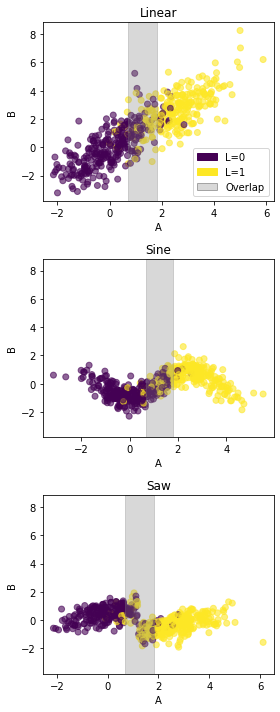

In [19]:
fig2_a()

In [13]:
def fig2_suppl_a():
    ### Figure 2 supplementary ################
    nlcd_dir="./results/journal/simulation/nlcd/"
    cit_dir="./results/journal/simulation/cit/"
    norows=3
    nocols=3
    fig, ax = plt.subplots(nrows=norows, ncols=nocols, sharex=True, sharey=True, figsize=(10,10))
    #fig.suptitle("Precision-Recall Curve plots for 100 permutations ")
    #fig.text(0.5, 1, 'Precision-Recall Curve plots', ha='center')
    #fig.text(0.22, 1, 'Linear', ha='center')
    #fig.text(0.52, 1, 'Sine', ha='center')
    #fig.text(0.85, 1, 'Saw', ha='center')
    #fig.text(0,0.20, 'Sample size 1000', va='center', rotation='vertical')
    #fig.text(0,0.50, 'Sample size 500', va='center', rotation='vertical')
    #fig.text(0,0.79, 'Sample size 300', va='center', rotation='vertical')

    plot_index = 0

    for i in ['300', '500', '1000'] :
        for j in ['Linear', 'Sine', 'Saw']:
            for k in [ '100']: # put 100 permutations in supplementary 
                precision_nlmr_SVR, recall_nlmr_SVR = calculate_precision_recall(nlcd_dir + j + "SVR" + i + "s" + k + "perm.csv", nlcd_dir+"IndpSVR" + i + "s" + k + "perm.csv")
                precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall(nlcd_dir + j + "KRR" + i + "s" + k + "perm.csv", nlcd_dir+"IndpKRR" + i + "s" + k + "perm.csv")
                precision_nlmr_ANN, recall_nlmr_ANN = calculate_precision_recall(nlcd_dir + j + "ANN" + i + "s" + k + "perm.csv", nlcd_dir+"IndpANN" + i + "s" + k + "perm.csv")
                precision_CIT, recall_CIT = calculate_precision_recall(cit_dir + j + i + "cit" + k + "perm.csv", cit_dir+"Indp" + i + "cit" + k + "perm.csv")

                curr_ax = ax[plot_index // nocols, plot_index % nocols]
                
                #curr_ax.plot(recall_CIT,precision_CIT,color=color_algo['CIT'])
                #curr_ax.plot(recall_nlmr_ANN,precision_nlmr_ANN,color=color_algo['ANN'])
                #curr_ax.plot(recall_nlmr_SVR,precision_nlmr_SVR,color=color_algo['SVR'])
                #curr_ax.plot(recall_nlmr_KRR,precision_nlmr_KRR,color=color_algo['KRR'])
                disp = PrecisionRecallDisplay(precision=precision_nlmr_SVR, recall=recall_nlmr_SVR)
                disp.plot(ax=curr_ax, color=color_algo['SVR'])
                disp = PrecisionRecallDisplay(precision=precision_nlmr_ANN, recall=recall_nlmr_ANN)
                disp.plot(ax=curr_ax, color=color_algo['ANN'])
                disp = PrecisionRecallDisplay(precision=precision_CIT, recall=recall_CIT)
                disp.plot(ax=curr_ax, color=color_algo['CIT'])
                disp = PrecisionRecallDisplay(precision=precision_nlmr_KRR, recall=recall_nlmr_KRR)
                disp.plot(ax=curr_ax, color=color_algo['KRR'])
                curr_ax.set_ylabel('')
                curr_ax.set_xlabel('')
                if(plot_index // nocols == 0 and plot_index % nocols == 0):
                    curr_ax.set_title('Linear')
                elif(plot_index // nocols == 0 and plot_index % nocols == 1):
                    curr_ax.set_title('Sine')
                elif(plot_index // nocols == 0 and plot_index % nocols == 2):
                    curr_ax.set_title('Sawtooth')   
                if(plot_index % nocols == 0 and plot_index//norows==0):
                    curr_ax.set_ylabel('Sample size =300 \n Precision')
                if(plot_index % nocols == 0 and plot_index//norows==1):
                    curr_ax.set_ylabel('Sample size =500 \n Precision')
                if(plot_index % nocols == 0 and plot_index//norows==2):
                    curr_ax.set_ylabel('Sample size =1000 \n Precision')
                if(plot_index //nocols == (norows-1)):
                    curr_ax.set_xlabel('Recall')
                if(plot_index // nocols == norows-1 and plot_index % nocols == 0) :# if the plot is lower left, then add the legend in that plot
                    xindex=norows-1
                    yindex=0
                    handles = [ax[xindex, yindex].lines[3],ax[xindex,yindex].lines[0], ax[xindex, yindex].lines[1],ax[xindex, yindex].lines[2]]
                    labels = ['NLCD (KRR)','NLCD (SVR)', 'NLCD (ANN)',  'CIT (baseline)']
                    curr_ax.legend(handles,labels,loc="lower left")
            

                plot_index += 1

    fig.tight_layout()
    #plt.savefig("./results/journal/plots/fig_2_suppl_a.png",bbox_inches='tight',dpi=1200)
    #plt.savefig('./results/journal/plots/fig_2_suppl_a.svg', bbox_inches='tight',format='svg', dpi=1200)
    plt.savefig('./results/journal/plots/fig_2_suppl_a.pdf', bbox_inches='tight',format='pdf', dpi=1200)


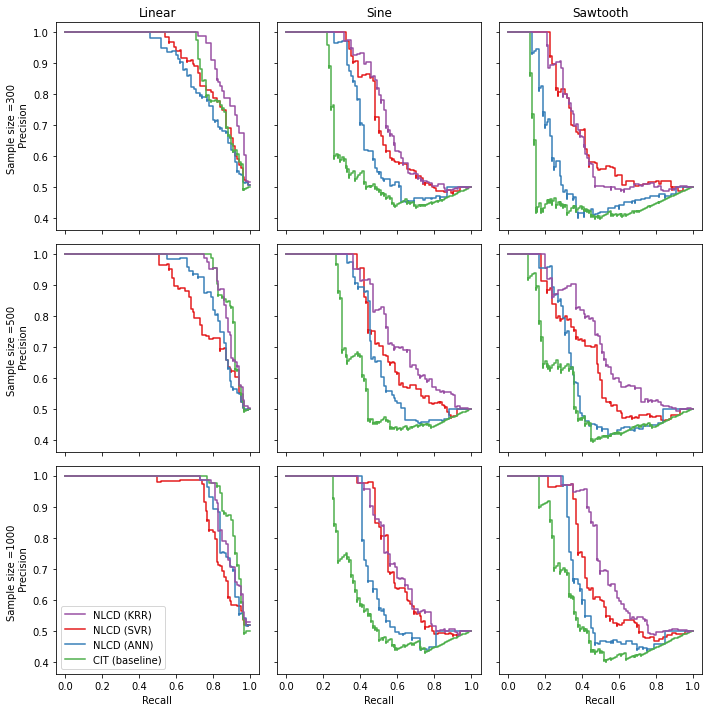

In [14]:
fig2_suppl_a()

In [18]:
def fig2_suppl_b():
    #### Figure 2 supplementary b ###########
    nlcd_dir='./results/journal/2way/'
    norows = 2
    nocols = 2
    fig, ax = plt.subplots(nrows=norows, ncols=nocols, sharex=True, sharey=True, figsize=(8, 7))
    #fig.suptitle("Hex plot of p-values from A->B vs B->A p for NLCD(KRR) 100 permutations ")
    plot_index = 0

    for j in ['Linear', 'Sine', 'Saw', 'Indp']:
        dfcausal = pd.read_csv(nlcd_dir + j + 'KRR500s100perm.csv')
        dfrev = pd.read_csv(nlcd_dir + j + 'KRR500s100perm_rev.csv')
        curr_ax = ax[plot_index // nocols, plot_index % nocols]
        hb = curr_ax.hexbin(dfcausal['p_final'], dfrev['p_final'], gridsize=5, mincnt=1, cmap='Blues',vmin=0,vmax=30)
        
        if(plot_index == 0 or plot_index == 2):
            curr_ax.set_ylabel('B->A')
        else:
            curr_ax.set_ylabel('')
        curr_ax.set_xlabel('A->B ')
        
        if(j == 'Linear'):
            curr_ax.set_title('Linear')
        elif(j == 'Sine'):
            curr_ax.set_title('Sine')
        elif(j == 'Saw'):
            curr_ax.set_title('Sawtooth')
        elif(j == 'Indp'):
            curr_ax.set_title('Independent')
        
        plot_index += 1

    cbar_ax = fig.add_axes([0.93, 0.15, 0.03, 0.7])  # Adjust the position and size of the colorbar as needed
    cbar = fig.colorbar(hb, cax=cbar_ax)
    cbar.set_label('Counts')


    #plt.savefig("./results/journal/plots/fig_2_suppl_b.png", bbox_inches='tight', dpi=1200)
    #plt.savefig('./results/journal/plots/fig_2_suppl_b.svg', bbox_inches='tight', format='svg', dpi=1200)
    plt.savefig('./results/journal/plots/fig_2_suppl_b.pdf', bbox_inches='tight', format='pdf', dpi=1200)

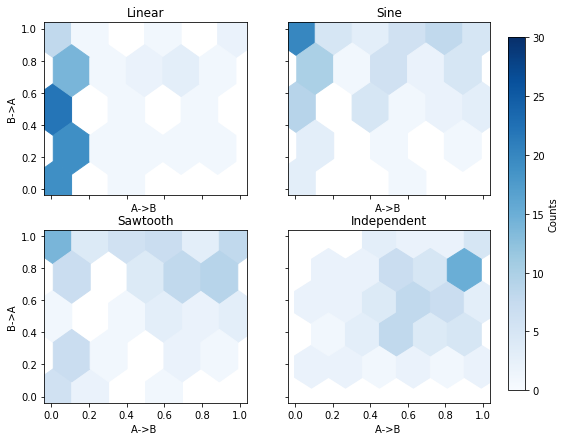

In [19]:
fig2_suppl_b()

In [ ]:
def fig2_b():
    ### Figure 2 ################
    nlcd_dir="./results/journal/simulation/nlcd/"
    cit_dir="./results/journal/simulation/cit/"
    norows=3
    nocols=3
    fig, ax = plt.subplots(nrows=norows, ncols=nocols, sharex=True, sharey=True, figsize=(10,10))
    fig.suptitle("Precision-Recall Curve plots for 500 permutations ")
    plot_index = 0

    for i in ['300', '500', '1000'] :
        for j in ['Linear', 'Sine', 'Saw']:
            for k in [ '500']: # put 100 permutations in supplementary 
                precision_nlmr_SVR, recall_nlmr_SVR = calculate_precision_recall(nlcd_dir + j + "SVR" + i + "s" + k + "perm.csv", nlcd_dir+"IndpSVR" + i + "s" + k + "perm.csv")
                precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall(nlcd_dir + j + "KRR" + i + "s" + k + "perm.csv", nlcd_dir+"IndpKRR" + i + "s" + k + "perm.csv")
                precision_nlmr_ANN, recall_nlmr_ANN = calculate_precision_recall(nlcd_dir + j + "ANN" + i + "s" + k + "perm.csv", nlcd_dir+"IndpANN" + i + "s" + k + "perm.csv")
                precision_CIT, recall_CIT = calculate_precision_recall(cit_dir + j + i + "cit" + k + "perm.csv", cit_dir+"Indp" + i + "cit" + k + "perm.csv")

                curr_ax = ax[plot_index // nocols, plot_index % nocols]
        
                disp = PrecisionRecallDisplay(precision=precision_nlmr_SVR, recall=recall_nlmr_SVR)
                disp.plot(ax=curr_ax, color=color_algo['SVR'])#,marker='.') #https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.plot.html
                disp = PrecisionRecallDisplay(precision=precision_nlmr_ANN, recall=recall_nlmr_ANN)
                disp.plot(ax=curr_ax, color=color_algo['ANN'])
               
                disp = PrecisionRecallDisplay(precision=precision_nlmr_KRR, recall=recall_nlmr_KRR)
                disp.plot(ax=curr_ax, color=color_algo['KRR'])
                disp = PrecisionRecallDisplay(precision=precision_CIT, recall=recall_CIT)
                disp.plot(ax=curr_ax, color=color_algo['CIT'])
                curr_ax.set_ylabel('')
                curr_ax.set_xlabel('')
                # set datatype as titles 
                if(plot_index // nocols == 0 and plot_index % nocols == 0):        
                    curr_ax.set_title('Linear')
                elif(plot_index // nocols == 0 and plot_index % nocols == 1):
                    curr_ax.set_title('Sine')
                elif(plot_index // nocols == 0 and plot_index % nocols == 2):
                    curr_ax.set_title('Sawtooth')   
                if(plot_index % nocols == 0 and plot_index//norows==0):
                    curr_ax.set_ylabel('Sample size =300 \n Precision')
                if(plot_index % nocols == 0 and plot_index//norows==1):
                    curr_ax.set_ylabel('Sample size =500 \n Precision')
                if(plot_index % nocols == 0 and plot_index//norows==2):
                    curr_ax.set_ylabel('Sample size =1000 \n Precision')
                if(plot_index //nocols == (norows-1)): # if its the last row then add x labels 
                    curr_ax.set_xlabel('Recall')
                if(plot_index // nocols == norows-1 and plot_index % nocols == 0) :# if the plot is lower left, then add the legend in that plot
                    xindex=norows-1
                    yindex=0
                    handles = [ax[xindex, yindex].lines[2],ax[xindex,yindex].lines[0], ax[xindex, yindex].lines[1],ax[xindex, yindex].lines[3]]
                    labels = ['NLCD (KRR)','NLCD (SVR)', 'NLCD (ANN)',  'CIT (baseline)']
                    curr_ax.legend(handles,labels,loc="lower left")

                
                plot_index += 1

    #plt.tight_layout()
    # Create a common legend
    #handles = [ax[0, 0].lines[0], ax[0, 0].lines[1], ax[0, 0].lines[2], ax[0, 0].lines[3]]
    #labels = ['SVR', 'ANN', 'CIT', 'KRR']
    #fig.legend(handles, labels, loc='lower left')

    fig.tight_layout()
    plt.savefig("./results/journal/plots/fig2.png",bbox_inches='tight',dpi=1200)
    plt.savefig('./results/journal/plots/fig2.svg', bbox_inches='tight',format='svg', dpi=1200)


In [ ]:
fig2_b()

In [29]:
def fig2_suppl_a_mod():
    ### Figure 2 ################
    #this is for sample 500
    nlcd_dir="./results/journal/simulation/nlcd/"
    cit_dir="./results/journal/simulation/cit/"
    findr_dir="./results/journal/simulation/findr/"
    mrpc_dir="./results/journal/simulation/MRPC/sim_results/edges_robust/"
    norows=3
    nocols=3
    fig, ax = plt.subplots(nrows=norows, ncols=nocols, sharex=True, sharey=True, figsize=(10,10))
    #fig.suptitle("Precision-Recall Curve plots for 500 permutations ")
    plot_index = 0

    for i in [ '300','500','1000'] :
        for j in ['Linear', 'Sine', 'Saw']:
            print("Data type: ", j)
            for k in [ '500']: # put 100 permutations in supplementary 
                precision_nlmr_SVR, recall_nlmr_SVR = calculate_precision_recall(nlcd_dir + j + "SVR" + i + "s" + k + "perm.csv", nlcd_dir+"IndpSVR" + i + "s" + k + "perm.csv")
                print('nlcd SVR ',calculate_avgprecision(nlcd_dir + j + "SVR" + i + "s" + k + "perm.csv", nlcd_dir+"IndpSVR" + i + "s" + k + "perm.csv"))
                print('nlcd SVR avg precision manual',calculate_avgprecision_manual(precision_nlmr_SVR,recall_nlmr_SVR))
                precision_nlmr_SVR,recall_nlmr_SVR=davis_goadrich_interpolation(precision_nlmr_SVR,recall_nlmr_SVR,positive=100)
                
                precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall(nlcd_dir + j + "KRR" + i + "s" + k + "perm.csv", nlcd_dir+"IndpKRR" + i + "s" + k + "perm.csv")
                print('nlcd krr ',calculate_avgprecision(nlcd_dir + j + "KRR" + i + "s" + k + "perm.csv", nlcd_dir+"IndpKRR" + i + "s" + k + "perm.csv"))
                print('nlcd krr avg precision manual',calculate_avgprecision_manual(precision_nlmr_KRR,recall_nlmr_KRR))
                precision_nlmr_KRR,recall_nlmr_KRR=davis_goadrich_interpolation(precision_nlmr_KRR,recall_nlmr_KRR,positive=100)
                
                precision_nlmr_ANN, recall_nlmr_ANN = calculate_precision_recall(nlcd_dir + j + "ANN" + i + "s" + k + "perm.csv", nlcd_dir+"IndpANN" + i + "s" + k + "perm.csv")
                print('nlcd ann ',calculate_avgprecision(nlcd_dir + j + "ANN" + i + "s" + k + "perm.csv", nlcd_dir+"IndpANN" + i + "s" + k + "perm.csv"))
                print('nlcd ann avg precision manual',calculate_avgprecision_manual(precision_nlmr_ANN,recall_nlmr_ANN))
                precision_nlmr_ANN,recall_nlmr_ANN=davis_goadrich_interpolation(precision_nlmr_ANN,recall_nlmr_ANN,positive=100)
                
                precision_CIT, recall_CIT = calculate_precision_recall(cit_dir + j + i + "cit" + k + "perm.csv", cit_dir+"Indp" + i + "cit" + k + "perm.csv")
                print('cit ',calculate_avgprecision(cit_dir + j + i + "cit" + k + "perm.csv", cit_dir+"Indp" + i + "cit" + k + "perm.csv"))
                print('cit avg precision manual',calculate_avgprecision_manual(precision_CIT,recall_CIT))
                precision_CIT,recall_CIT=davis_goadrich_interpolation(precision_CIT,recall_CIT,positive=100)
                
                precision_findr, recall_findr = calculate_precision_recall_findr(findr_dir + j + i  +"findr"+ ".csv", findr_dir + "Indp" + i +"findr"  + ".csv")
                print('findr ',calculate_avgprecision_findr(findr_dir + j + i  +"findr"+ ".csv", findr_dir + "Indp" + i +"findr"  + ".csv"))
                print('findr avg precision manual',calculate_avgprecision_manual(precision_findr,recall_findr))
                precision_findr,recall_findr=davis_goadrich_interpolation(precision_findr,recall_findr,positive=100)
                
                precision_mrpc, recall_mrpc = calculate_precision_recall_MRPC(mrpc_dir + j + i  +"mrpc"+ ".csv", mrpc_dir + "Indp" + i +"mrpc"  + ".csv")
                print('mrpc ',calculate_avgprecision_MRPC(mrpc_dir + j + i  +"mrpc"+ ".csv", mrpc_dir + "Indp" + i +"mrpc"  + ".csv"))
                print('mrpc avg precision manual',calculate_avgprecision_manual(precision_mrpc,recall_mrpc))
                precision_mrpc,recall_mrpc=davis_goadrich_interpolation(precision_mrpc,recall_mrpc,positive=100)
                curr_ax = ax[plot_index // nocols, plot_index % nocols]
        
                disp = PrecisionRecallDisplay(precision=precision_nlmr_SVR, recall=recall_nlmr_SVR)
                disp.plot(ax=curr_ax, color=color_algo['SVR'])#,marker='.') #https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.plot.html
                disp = PrecisionRecallDisplay(precision=precision_nlmr_ANN, recall=recall_nlmr_ANN)
                disp.plot(ax=curr_ax, color=color_algo['ANN'])
               
                disp = PrecisionRecallDisplay(precision=precision_nlmr_KRR, recall=recall_nlmr_KRR)
                disp.plot(ax=curr_ax, color=color_algo['KRR'])
                disp = PrecisionRecallDisplay(precision=precision_CIT, recall=recall_CIT)
                disp.plot(ax=curr_ax, color=color_algo['CIT'])
                disp = PrecisionRecallDisplay(precision=precision_findr, recall=recall_findr)
                disp.plot(ax=curr_ax, color=color_algo['findr'])
                disp = PrecisionRecallDisplay(precision=precision_mrpc, recall=recall_mrpc)
                disp.plot(ax=curr_ax, color=color_algo['mrpc'])
                curr_ax.set_ylabel('')
                curr_ax.set_xlabel('')
                # set datatype as titles 
                if(plot_index // nocols == 0 and plot_index % nocols == 0):
                    curr_ax.set_title('Linear')
                elif(plot_index // nocols == 0 and plot_index % nocols == 1):
                    curr_ax.set_title('Sine')
                elif(plot_index // nocols == 0 and plot_index % nocols == 2):
                    curr_ax.set_title('Sawtooth')   
                if(plot_index % nocols == 0 and plot_index//norows==0):
                    curr_ax.set_ylabel('Sample size =300 \n Precision')
                if(plot_index % nocols == 0 and plot_index//norows==1):
                    curr_ax.set_ylabel('Sample size =500 \n Precision')
                if(plot_index % nocols == 0 and plot_index//norows==2):
                    curr_ax.set_ylabel('Sample size =1000 \n Precision')
                if(plot_index //nocols == (norows-1)):
                    curr_ax.set_xlabel('Recall')
                if(plot_index // nocols == norows-1 and plot_index % nocols == 0) :# if the plot is lower left, then add the legend in that plot
                    xindex=norows-1
                    yindex=0
                    xindex=norows-1
                    yindex=0
                    #handles = [ax[ yindex].lines[2],ax[yindex].lines[0], ax[ yindex].lines[1],ax[yindex].lines[3],ax[yindex].lines[4],ax[yindex].lines[5]]
                    handles = [ax[xindex, yindex].lines[2],ax[xindex,yindex].lines[0], ax[xindex, yindex].lines[1],ax[xindex, yindex].lines[3],ax[xindex,yindex].lines[4],ax[xindex,yindex].lines[5]]
                    labels = ['NLCD (KRR)','NLCD (SVR)', 'NLCD (ANN)',  'CIT','Findr','MRPC']
                    curr_ax.legend(handles,labels,loc="lower left")
                
                plot_index += 1
        

    #plt.tight_layout()
    # Create a common legend
    #handles = [ax[0, 0].lines[0], ax[0, 0].lines[1], ax[0, 0].lines[2], ax[0, 0].lines[3]]
    #labels = ['SVR', 'ANN', 'CIT', 'KRR']
    #fig.legend(handles, labels, loc='lower left')

    fig.tight_layout()
    plt.savefig("./results/journal/plots/fig2_suppl_a_mod.png",bbox_inches='tight',dpi=1200)
    plt.savefig('./results/journal/plots/fig2_suppl_a_mod.svg', bbox_inches='tight',format='svg', dpi=1200)


Data type:  Linear
nlcd SVR  0.9068314852732967
0.9068314852732967
nlcd SVR avg precision manual 0.9068314852732968
nlcd krr  0.9444445952826288
0.9444445952826288
nlcd krr avg precision manual 0.9444445952826288
nlcd ann  0.9025528824806026
0.9025528824806026
nlcd ann avg precision manual 0.9025528824806026
cit  0.9172536407596429
0.9172536407596429
cit avg precision manual 0.9172536407596431
findr  0.9302683219412918
0.9302683219412918
findr avg precision manual 0.9302683219412922
mrpc  0.974382544783618
0.974382544783618
mrpc avg precision manual 0.974382544783618
Data type:  Sine
nlcd SVR  0.7471726112627813
0.7471726112627813
nlcd SVR avg precision manual 0.7471726112627812
nlcd krr  0.7679818887029096
0.7679818887029096
nlcd krr avg precision manual 0.7679818887029097
nlcd ann  0.6925986878950305
0.6925986878950305
nlcd ann avg precision manual 0.6925986878950308
cit  0.6171387647206239
0.6171387647206239
cit avg precision manual 0.6171387647206241
findr  0.5540151451794249
0.554

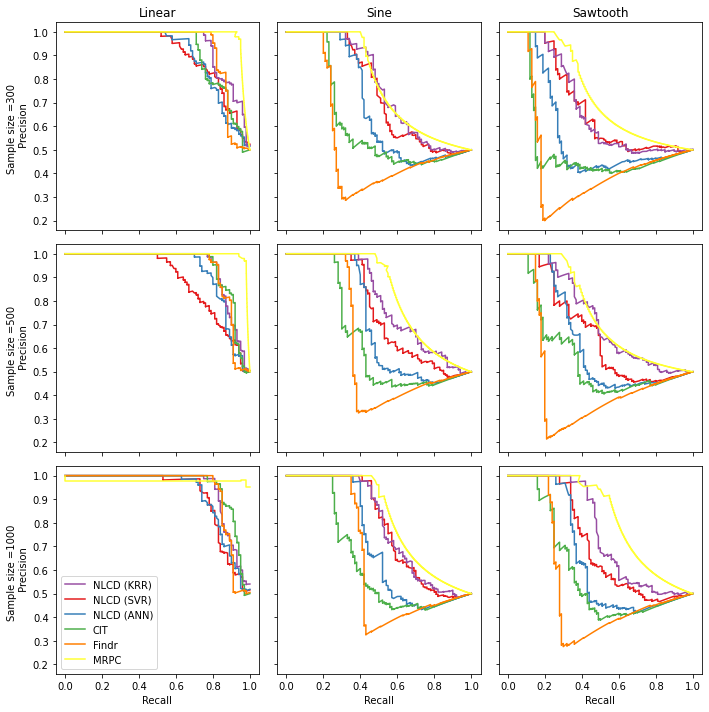

In [30]:

fig2_suppl_a_mod()

In [18]:
def fig3_mod_main_aupr():
    ### Figure 2 ################
    #this is for sample 500
    nlcd_dir="./results/journal/simulation/nlcd/"
    cit_dir="./results/journal/simulation/cit/"
    findr_dir="./results/journal/simulation/findr/"
    mrpc_dir="./results/journal/simulation/MRPC/sim_results/edges_robust/"
    norows=3
    nocols=1
    fig, ax = plt.subplots(nrows=norows, ncols=nocols, sharex=True, sharey=True, figsize=(4,10))
    #fig.suptitle("Precision-Recall Curve plots for 500 permutations ")
    plot_index = 0

    for i in [ '500'] :
        for j in ['Linear', 'Sine', 'Saw']:
            print("Data type: ", j)
            for k in [ '500']: # put 100 permutations in supplementary 
                precision_nlmr_SVR, recall_nlmr_SVR = calculate_precision_recall(nlcd_dir + j + "SVR" + i + "s" + k + "perm.csv", nlcd_dir+"IndpSVR" + i + "s" + k + "perm.csv")
                print('nlcd SVR ',calculate_avgprecision(nlcd_dir + j + "SVR" + i + "s" + k + "perm.csv", nlcd_dir+"IndpSVR" + i + "s" + k + "perm.csv"))
                nlcd_svr=calculate_avgprecision(nlcd_dir + j + "SVR" + i + "s" + k + "perm.csv", nlcd_dir+"IndpSVR" + i + "s" + k + "perm.csv")
                print('nlcd SVR avg precision manual',calculate_avgprecision_manual(precision_nlmr_SVR,recall_nlmr_SVR))
                precision_nlmr_SVR,recall_nlmr_SVR=davis_goadrich_interpolation(precision_nlmr_SVR,recall_nlmr_SVR,positive=100)
                
                precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall(nlcd_dir + j + "KRR" + i + "s" + k + "perm.csv", nlcd_dir+"IndpKRR" + i + "s" + k + "perm.csv")
                print('nlcd krr ',calculate_avgprecision(nlcd_dir + j + "KRR" + i + "s" + k + "perm.csv", nlcd_dir+"IndpKRR" + i + "s" + k + "perm.csv"))
                nlcd_krr=calculate_avgprecision(nlcd_dir + j + "KRR" + i + "s" + k + "perm.csv", nlcd_dir+"IndpKRR" + i + "s" + k + "perm.csv")
                print('nlcd krr avg precision manual',calculate_avgprecision_manual(precision_nlmr_KRR,recall_nlmr_KRR))
                precision_nlmr_KRR,recall_nlmr_KRR=davis_goadrich_interpolation(precision_nlmr_KRR,recall_nlmr_KRR,positive=100)
                
                precision_nlmr_ANN, recall_nlmr_ANN = calculate_precision_recall(nlcd_dir + j + "ANN" + i + "s" + k + "perm.csv", nlcd_dir+"IndpANN" + i + "s" + k + "perm.csv")
                print('nlcd ann ',calculate_avgprecision(nlcd_dir + j + "ANN" + i + "s" + k + "perm.csv", nlcd_dir+"IndpANN" + i + "s" + k + "perm.csv"))
                nlcd_ann=calculate_avgprecision(nlcd_dir + j + "ANN" + i + "s" + k + "perm.csv", nlcd_dir+"IndpANN" + i + "s" + k + "perm.csv")
                
                print('nlcd ann avg precision manual',calculate_avgprecision_manual(precision_nlmr_ANN,recall_nlmr_ANN))
                precision_nlmr_ANN,recall_nlmr_ANN=davis_goadrich_interpolation(precision_nlmr_ANN,recall_nlmr_ANN,positive=100)
                
                precision_CIT, recall_CIT = calculate_precision_recall(cit_dir + j + i + "cit" + k + "perm.csv", cit_dir+"Indp" + i + "cit" + k + "perm.csv")
                print('cit ',calculate_avgprecision(cit_dir + j + i + "cit" + k + "perm.csv", cit_dir+"Indp" + i + "cit" + k + "perm.csv"))
                cit=calculate_avgprecision(cit_dir + j + i + "cit" + k + "perm.csv", cit_dir+"Indp" + i + "cit" + k + "perm.csv")
                print('cit avg precision manual',calculate_avgprecision_manual(precision_CIT,recall_CIT))
                precision_CIT,recall_CIT=davis_goadrich_interpolation(precision_CIT,recall_CIT,positive=100)
                
                precision_findr, recall_findr = calculate_precision_recall_findr(findr_dir + j + i  +"findr"+ ".csv", findr_dir + "Indp" + i +"findr"  + ".csv")
                print('findr ',calculate_avgprecision_findr(findr_dir + j + i  +"findr"+ ".csv", findr_dir + "Indp" + i +"findr"  + ".csv"))
                findr=calculate_avgprecision_findr(findr_dir + j + i  +"findr"+ ".csv", findr_dir + "Indp" + i +"findr"  + ".csv")
                print('findr avg precision manual',calculate_avgprecision_manual(precision_findr,recall_findr))
                precision_findr,recall_findr=davis_goadrich_interpolation(precision_findr,recall_findr,positive=100)
                
                precision_mrpc, recall_mrpc = calculate_precision_recall_MRPC(mrpc_dir + j + i  +"mrpc"+ ".csv", mrpc_dir + "Indp" + i +"mrpc"  + ".csv")
                print('mrpc ',calculate_avgprecision_MRPC(mrpc_dir + j + i  +"mrpc"+ ".csv", mrpc_dir + "Indp" + i +"mrpc"  + ".csv"))
                mrpc =calculate_avgprecision_MRPC(mrpc_dir + j + i  +"mrpc"+ ".csv", mrpc_dir + "Indp" + i +"mrpc"  + ".csv")
                print('mrpc avg precision manual',calculate_avgprecision_manual(precision_mrpc,recall_mrpc))
                #precision_mrpc,recall_mrpc=davis_goadrich_interpolation(precision_mrpc,recall_mrpc,positive=100)
                curr_ax = ax[plot_index]
        
        
                curr_ax.set_ylabel('')
                curr_ax.set_xlabel('')
                # set datatype as titles 
                if(plot_index  == 0 ):        
                    curr_ax.set_title('Linear')
                elif(plot_index == 1 ):
                    curr_ax.set_title('Sine')
                elif(plot_index  == 2 ):
                    curr_ax.set_title('Sawtooth')   
                #if(plot_index ==2):
                    #curr_ax.set_ylabel('Sample size =500 \n Precision') 
                    #curr_ax.set_xlabel('Different Methods')
                curr_ax.set_ylabel('AUPRC') 
                curr_ax.set_ylim(0.4,1.1) 

                
                plot_index += 1


                algo_means = {
                'CIT': round(cit,2),
                'NLCD (SVR)': round(nlcd_svr,2),
                'NLCD (KRR)': round(nlcd_krr,2),
                'NLCD (ANN)': round(nlcd_ann,2),
                'Findr':round(findr,2),
                'MRPC':round(mrpc,2)
                }
                species=list(algo_means.keys())
                print(species)
                #x = np.arange(len(species))  # the label locations
                width = 0.5 # the width of the bars , change this if the numbers are overlapping 
                #x=0
                #multiplier = 0
                x = range(len(species))
            #ax=axs[l_index]
            for idx, (attribute, measurement) in enumerate(algo_means.items()):
                #offset = width * multiplier
                if attribute=='CIT':
                    rects = curr_ax.bar(x[idx] , measurement, width,label=attribute,color=color_algo['CIT'],capsize=4)
                    curr_ax.bar_label(rects, padding=5)
                elif attribute=='NLCD (SVR)':
                    rects = curr_ax.bar(x[idx] , measurement, width,label=attribute,color=color_algo['SVR'],capsize=4)    
                    curr_ax.bar_label(rects, padding=5)
                elif attribute=='NLCD (KRR)':
                    rects = curr_ax.bar(x[idx], measurement, width,label=attribute,color=color_algo['KRR'],capsize=4)    
                    curr_ax.bar_label(rects, padding=5)
                elif attribute=='NLCD (ANN)':
                    rects = curr_ax.bar(x[idx]  , measurement, width,label=attribute,color=color_algo['ANN'],capsize=4)    
                    curr_ax.bar_label(rects, padding=5)
                elif attribute=='Findr':
                    rects = curr_ax.bar(x[idx] , measurement, width, label=attribute,color=color_algo['findr'],capsize=4)    
                    curr_ax.bar_label(rects, padding=5) 
                elif attribute=='MRPC':
                    rects = curr_ax.bar(x[idx]  , measurement, width, label=attribute,color=color_algo['mrpc'],capsize=4)    
                    curr_ax.bar_label(rects, padding=5) 

               # multiplier += 1
            curr_ax.set_xticks(x)
            curr_ax.set_xticklabels(species,rotation=90)
    

    fig.tight_layout()
    plt.savefig("./results/journal/plots/fig3_mod_main_aupr.png",bbox_inches='tight',dpi=1200)
    plt.savefig('./results/journal/plots/fig3_mod_main_aupr.svg', bbox_inches='tight',format='svg', dpi=1200)
    plt.savefig("./results/journal/plots/fig3_mod_main_aupr.pdf", format="pdf", bbox_inches="tight",dpi=1200)



Data type:  Linear
nlcd SVR  0.8886367101396497
0.8886367101396497
nlcd SVR avg precision manual 0.8886367101396497
nlcd krr  0.9453262568891792
0.9453262568891792
nlcd krr avg precision manual 0.9453262568891792
nlcd ann  0.9268913684595477
0.9268913684595477
nlcd ann avg precision manual 0.9268913684595477
cit  0.9477805356485232
0.9477805356485232
cit avg precision manual 0.9477805356485232
findr  0.939568311960316
0.939568311960316
findr avg precision manual 0.9395683119603163
mrpc  0.989095757126733
0.989095757126733
mrpc avg precision manual 0.989095757126733
['CIT', 'NLCD (SVR)', 'NLCD (KRR)', 'NLCD (ANN)', 'Findr', 'MRPC']
Data type:  Sine
nlcd SVR  0.7577441075878831
0.7577441075878831
nlcd SVR avg precision manual 0.7577441075878832
nlcd krr  0.8004133141934184
0.8004133141934184
nlcd krr avg precision manual 0.8004133141934184
nlcd ann  0.7119272125099945
0.7119272125099945
nlcd ann avg precision manual 0.7119272125099945
cit  0.6453593914691937
0.6453593914691937
cit avg pr

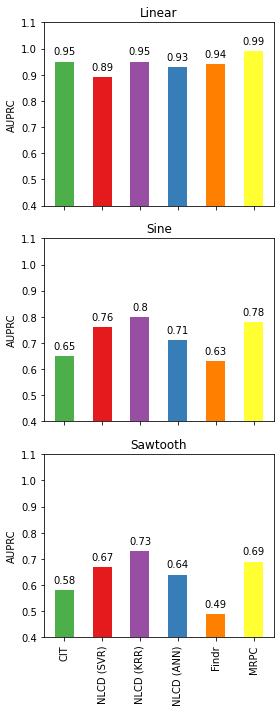

In [19]:
fig3_mod_main_aupr()

In [18]:
def fig2_b_mod_main_nlcd():
    ### Figure 2 ################
    #this is for sample 500
    nlcd_dir="./results/journal/simulation/nlcd/"
    #cit_dir="./results/journal/simulation/cit/"
    #findr_dir="./results/journal/simulation/findr/"
    #mrpc_dir="./results/journal/simulation/MRPC/sim_results/edges_robust/"
    norows=3
    nocols=1
    fig, ax = plt.subplots(nrows=norows, ncols=nocols, sharex=True, sharey=True, figsize=(4,10))
    #fig.suptitle("Precision-Recall Curve plots for 500 permutations ")
    plot_index = 0

    for i in [ '500'] :
        for j in ['Linear', 'Sine', 'Saw']:
            print("Data type: ", j)
            for k in [ '500']: # put 100 permutations in supplementary 
                precision_nlmr_SVR, recall_nlmr_SVR = calculate_precision_recall(nlcd_dir + j + "SVR" + i + "s" + k + "perm.csv", nlcd_dir+"IndpSVR" + i + "s" + k + "perm.csv")
                print('nlcd SVR ',calculate_avgprecision(nlcd_dir + j + "SVR" + i + "s" + k + "perm.csv", nlcd_dir+"IndpSVR" + i + "s" + k + "perm.csv"))
                print('nlcd SVR avg precision manual',calculate_avgprecision_manual(precision_nlmr_SVR,recall_nlmr_SVR))
                precision_nlmr_SVR,recall_nlmr_SVR=davis_goadrich_interpolation(precision_nlmr_SVR,recall_nlmr_SVR,positive=100)
                
                precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall(nlcd_dir + j + "KRR" + i + "s" + k + "perm.csv", nlcd_dir+"IndpKRR" + i + "s" + k + "perm.csv")
                print('nlcd krr ',calculate_avgprecision(nlcd_dir + j + "KRR" + i + "s" + k + "perm.csv", nlcd_dir+"IndpKRR" + i + "s" + k + "perm.csv"))
                print('nlcd krr avg precision manual',calculate_avgprecision_manual(precision_nlmr_KRR,recall_nlmr_KRR))
                precision_nlmr_KRR,recall_nlmr_KRR=davis_goadrich_interpolation(precision_nlmr_KRR,recall_nlmr_KRR,positive=100)
                
                precision_nlmr_ANN, recall_nlmr_ANN = calculate_precision_recall(nlcd_dir + j + "ANN" + i + "s" + k + "perm.csv", nlcd_dir+"IndpANN" + i + "s" + k + "perm.csv")
                print('nlcd ann ',calculate_avgprecision(nlcd_dir + j + "ANN" + i + "s" + k + "perm.csv", nlcd_dir+"IndpANN" + i + "s" + k + "perm.csv"))
                print('nlcd ann avg precision manual',calculate_avgprecision_manual(precision_nlmr_ANN,recall_nlmr_ANN))
                precision_nlmr_ANN,recall_nlmr_ANN=davis_goadrich_interpolation(precision_nlmr_ANN,recall_nlmr_ANN,positive=100)
                ''' 
                precision_CIT, recall_CIT = calculate_precision_recall(cit_dir + j + i + "cit" + k + "perm.csv", cit_dir+"Indp" + i + "cit" + k + "perm.csv")
                print('cit ',calculate_avgprecision(cit_dir + j + i + "cit" + k + "perm.csv", cit_dir+"Indp" + i + "cit" + k + "perm.csv"))
                print('cit avg precision manual',calculate_avgprecision_manual(precision_CIT,recall_CIT))
                precision_CIT,recall_CIT=davis_goadrich_interpolation(precision_CIT,recall_CIT,positive=100)
                
                precision_findr, recall_findr = calculate_precision_recall_findr(findr_dir + j + i  +"findr"+ ".csv", findr_dir + "Indp" + i +"findr"  + ".csv")
                print('findr ',calculate_avgprecision_findr(findr_dir + j + i  +"findr"+ ".csv", findr_dir + "Indp" + i +"findr"  + ".csv"))
                print('findr avg precision manual',calculate_avgprecision_manual(precision_findr,recall_findr))
                precision_findr,recall_findr=davis_goadrich_interpolation(precision_findr,recall_findr,positive=100)
                
                precision_mrpc, recall_mrpc = calculate_precision_recall_MRPC(mrpc_dir + j + i  +"mrpc"+ ".csv", mrpc_dir + "Indp" + i +"mrpc"  + ".csv")
                print('mrpc ',calculate_avgprecision_MRPC(mrpc_dir + j + i  +"mrpc"+ ".csv", mrpc_dir + "Indp" + i +"mrpc"  + ".csv"))
                print('mrpc avg precision manual',calculate_avgprecision_manual(precision_mrpc,recall_mrpc))
                precision_mrpc,recall_mrpc=davis_goadrich_interpolation(precision_mrpc,recall_mrpc,positive=100)
                '''
                curr_ax = ax[plot_index]
                
                disp = PrecisionRecallDisplay(precision=precision_nlmr_SVR, recall=recall_nlmr_SVR)
                disp.plot(ax=curr_ax, color=color_algo['SVR'])#,marker='.') #https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.plot.html
                disp = PrecisionRecallDisplay(precision=precision_nlmr_ANN, recall=recall_nlmr_ANN)
                disp.plot(ax=curr_ax, color=color_algo['ANN'])
               
                disp = PrecisionRecallDisplay(precision=precision_nlmr_KRR, recall=recall_nlmr_KRR)
                disp.plot(ax=curr_ax, color=color_algo['KRR'])
                '''
                disp = PrecisionRecallDisplay(precision=precision_CIT, recall=recall_CIT)
                disp.plot(ax=curr_ax, color=color_algo['CIT'])
                disp = PrecisionRecallDisplay(precision=precision_findr, recall=recall_findr)
                disp.plot(ax=curr_ax, color=color_algo['findr'])
                disp = PrecisionRecallDisplay(precision=precision_mrpc, recall=recall_mrpc)
                disp.plot(ax=curr_ax, color=color_algo['mrpc'])
                '''
                curr_ax.set_ylabel('')
                curr_ax.set_xlabel('')
                # set datatype as titles 
                if(plot_index  == 0 ):        
                    curr_ax.set_title('Linear')
                elif(plot_index == 1 ):
                    curr_ax.set_title('Sine')
                elif(plot_index  == 2 ):
                    curr_ax.set_title('Sawtooth')   
                if(plot_index ==2):
                    #curr_ax.set_ylabel('Sample size =500 \n Precision') 
                    curr_ax.set_xlabel('Recall')
                curr_ax.set_ylabel('Precision') 
                
                if(plot_index==0) :# if the plot is lower left, then add the legend in that plot
                    xindex=norows-1
                    yindex=0
                    handles = [ax[ yindex].lines[2],ax[yindex].lines[0], ax[ yindex].lines[1]]
                    labels = ['NLCD (KRR)','NLCD (SVR)', 'NLCD (ANN)']
                    curr_ax.legend(handles,labels,loc="lower left")

                
                plot_index += 1

    #plt.tight_layout()
    # Create a common legend
    #handles = [ax[0, 0].lines[0], ax[0, 0].lines[1], ax[0, 0].lines[2], ax[0, 0].lines[3]]
    #labels = ['SVR', 'ANN', 'CIT', 'KRR']
    #fig.legend(handles, labels, loc='lower left')

    fig.tight_layout()
    plt.savefig("./results/journal/plots/fig2_mod_main_nlcd.png",bbox_inches='tight',dpi=1200)
    plt.savefig('./results/journal/plots/fig2_mod_main_nlcd.svg', bbox_inches='tight',format='svg', dpi=1200)


Data type:  Linear
nlcd SVR  0.8886367101396497
0.8886367101396497
nlcd SVR avg precision manual 0.8886367101396497
nlcd krr  0.9453262568891792
0.9453262568891792
nlcd krr avg precision manual 0.9453262568891792
nlcd ann  0.9268913684595477
0.9268913684595477
nlcd ann avg precision manual 0.9268913684595477
Data type:  Sine
nlcd SVR  0.7577441075878831
0.7577441075878831
nlcd SVR avg precision manual 0.7577441075878832
nlcd krr  0.8004133141934184
0.8004133141934184
nlcd krr avg precision manual 0.8004133141934184
nlcd ann  0.7119272125099945
0.7119272125099945
nlcd ann avg precision manual 0.7119272125099945
Data type:  Saw
nlcd SVR  0.671806580100555
0.671806580100555
nlcd SVR avg precision manual 0.6718065801005549
nlcd krr  0.7325465385969445
0.7325465385969445
nlcd krr avg precision manual 0.7325465385969445
nlcd ann  0.6390823096236726
0.6390823096236726
nlcd ann avg precision manual 0.6390823096236727


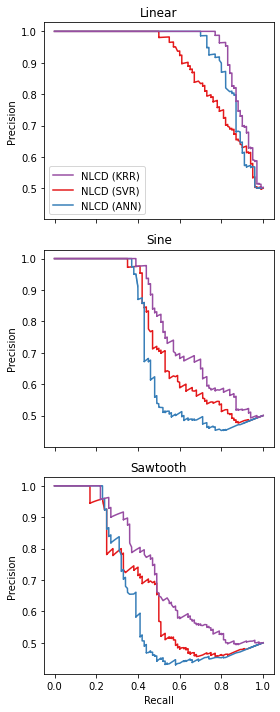

In [19]:
fig2_b_mod_main_nlcd()

In [8]:
def fig_findr():
    ### Figure 2 ################
    #this is for sample 500
    findr_dir="./results/journal/simulation/findr/"
    norows=3
    nocols=3
    fig, ax = plt.subplots(nrows=norows, ncols=nocols, sharex=True, sharey=True, figsize=(10,10))
    #fig.suptitle("Precision-Recall Curve plots for 500 permutations ")
    plot_index = 0

    for i in [ '1000','500','300'] :
        for j in ['Linear', 'Sine', 'Saw']:
            precision_findr, recall_findr = calculate_precision_recall_findr(findr_dir + j + i  +"findr"+ ".csv", findr_dir + "Indp" + i +"findr"  + ".csv")
            print(precision_findr,recall_findr)
            curr_ax = ax[plot_index // nocols, plot_index % nocols]
    
            disp = PrecisionRecallDisplay(precision=precision_findr, recall=recall_findr)
            disp.plot(ax=curr_ax, color=color_algo['SVR'])#,marker='.') #https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.plot.html
            curr_ax.set_ylabel('')
            curr_ax.set_xlabel('')
            # set datatype as titles 
            if(plot_index  == 0 ):        
                curr_ax.set_title('Linear')
            elif(plot_index == 1 ):
                curr_ax.set_title('Sine')
            elif(plot_index  == 2 ):
                curr_ax.set_title('Sawtooth')   
            if(plot_index ==0 or plot_index==3 or plot_index==6):
                #curr_ax.set_ylabel('Sample size =500 \n Precision') 
                curr_ax.set_xlabel('Recall')
            curr_ax.set_ylabel('Precision') 
                

                
            plot_index += 1

    #plt.tight_layout()
    # Create a common legend
    #handles = [ax[0, 0].lines[0], ax[0, 0].lines[1], ax[0, 0].lines[2], ax[0, 0].lines[3]]
    #labels = ['SVR', 'ANN', 'CIT', 'KRR']
    #fig.legend(handles, labels, loc='lower left')

    fig.tight_layout()
    #plt.savefig("./results/journal/plots/fig2_mod_main.png",bbox_inches='tight',dpi=1200)
    #plt.savefig('./results/journal/plots/fig2_mod_main.svg', bbox_inches='tight',format='svg', dpi=1200)


[0.50505051 0.50253807 0.5        0.5025641  0.50515464 0.50777202
 0.51041667 0.51308901 0.51052632 0.51322751 0.51595745 0.51336898
 0.51075269 0.50810811 0.50543478 0.50273224 0.50549451 0.50828729
 0.50555556 0.50837989 0.51123596 0.51412429 0.51704545 0.52
 0.52298851 0.52601156 0.52906977 0.53216374 0.53529412 0.53846154
 0.54166667 0.54491018 0.54819277 0.55151515 0.55487805 0.55828221
 0.5617284  0.56521739 0.56875    0.57232704 0.57594937 0.57961783
 0.58333333 0.58709677 0.59090909 0.59868421 0.60264901 0.60666667
 0.61073826 0.61486486 0.61904762 0.62328767 0.62758621 0.63194444
 0.63636364 0.64084507 0.64539007 0.65       0.65467626 0.65942029
 0.66423358 0.66176471 0.66666667 0.67164179 0.67669173 0.68181818
 0.6870229  0.69230769 0.69767442 0.703125   0.70866142 0.71428571
 0.72       0.72580645 0.72357724 0.7295082  0.74166667 0.74789916
 0.75423729 0.75       0.75652174 0.76315789 0.7699115  0.76785714
 0.77477477 0.78181818 0.78899083 0.78703704 0.79439252 0.80188679
 

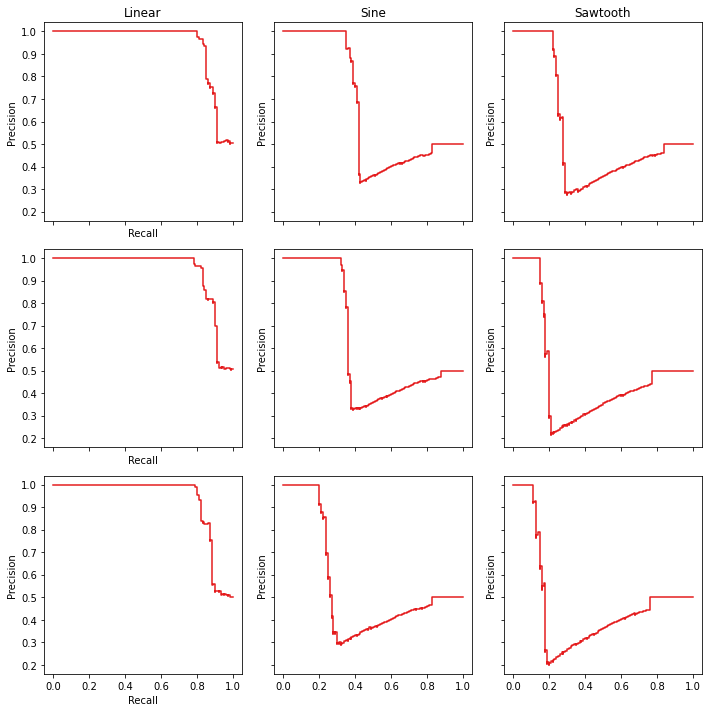

In [9]:
fig_findr()

In [5]:
def fig_mrpc(path):
    ### Figure 2 ################
    #this is for sample 500
    mrpc_dir=path
    norows=3
    nocols=3
    fig, ax = plt.subplots(nrows=norows, ncols=nocols, sharex=True, sharey=True, figsize=(10,10))
    #fig.suptitle("Precision-Recall Curve plots for 500 permutations ")
    plot_index = 0

    for i in [ '1000','500','300'] :
        for j in ['Linear', 'Sine', 'Saw']:
            precision_mrpc, recall_mrpc = calculate_precision_recall_MRPC(mrpc_dir + j + i  +"mrpc"+ ".csv", mrpc_dir + "Indp" + i +"mrpc"  + ".csv")
            
            print(precision_mrpc,recall_mrpc)
            curr_ax = ax[plot_index // nocols, plot_index % nocols]
    
            disp = PrecisionRecallDisplay(precision=precision_mrpc, recall=recall_mrpc)
            disp.plot(ax=curr_ax, color=color_algo['SVR'])#,marker='.') #https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.plot.html
            curr_ax.set_ylabel('')
            curr_ax.set_xlabel('')
            # set datatype as titles 
            if(plot_index  == 0 ):        
                curr_ax.set_title('Linear')
            elif(plot_index == 1 ):
                curr_ax.set_title('Sine')
            elif(plot_index  == 2 ):
                curr_ax.set_title('Sawtooth')   
            if(plot_index ==0 or plot_index==3 or plot_index==6):
                #curr_ax.set_ylabel('Sample size =500 \n Precision') 
                curr_ax.set_xlabel('Recall')
            curr_ax.set_ylabel('Precision') 
                

                
            plot_index += 1

    #plt.tight_layout()
    # Create a common legend
    #handles = [ax[0, 0].lines[0], ax[0, 0].lines[1], ax[0, 0].lines[2], ax[0, 0].lines[3]]
    #labels = ['SVR', 'ANN', 'CIT', 'KRR']
    #fig.legend(handles, labels, loc='lower left')

    fig.tight_layout()
    #plt.savefig("./results/journal/plots/fig2_mod_main.png",bbox_inches='tight',dpi=1200)
    #plt.savefig('./results/journal/plots/fig2_mod_main.svg', bbox_inches='tight',format='svg', dpi=1200)


(1.0, 1.0, 1.0, 0.9895833333333334, 0.979381443298969, 0.9795918367346939, 0.9797979797979798, 0.9797979797979798, 0.98, 0.98, 0.98, 0.98, 0.98, 0.9702970297029703, 0.9702970297029703, 0.9514563106796117, 0.9514563106796117, 0.9519230769230769, 0.9519230769230769, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523) (0, 0.95, 0.95, 0.95, 0.95, 0.96, 0.97, 0.97, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.99, 0.99, 1.0, 1.0, 1)
(1.0, 1.0, 1.0, 0.9795918367346939, 0.9607843137254902, 0.9607843137254902, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9433962264150944, 0.9433962264150944, 0.9090909090909091, 0.9107142857142857, 0.9107142857142857, 0.9107142857142857, 0.9137931034482759, 0.9137931034482759, 0.9137931034482759) (0, 0.44, 0.46, 0.48, 0.49, 0.49, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.51, 0.51, 0.51, 0.53, 0.53, 1)
(1.0, 1.0, 0.9743589743589743, 1.0, 0

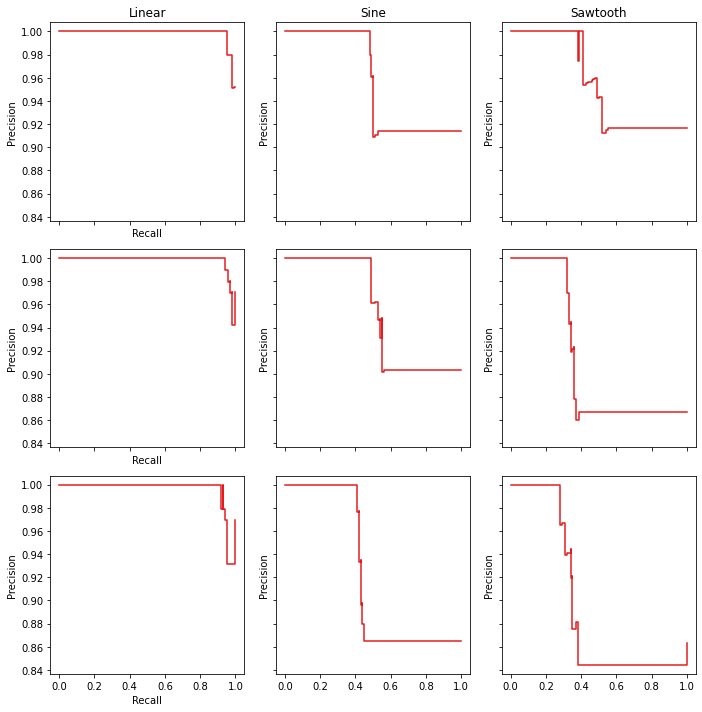

In [7]:
fig_mrpc("./results/journal/simulation/MRPC/sim_results/edges_robust/")
#fig_mrpc("./results/journal/simulation/MRPC/sim_results/edges/")

[1.0, 1.0, 0.9895833333333334, 0.979381443298969, 0.9795918367346939, 0.9797979797979798, 0.9797979797979798, 0.9797979797979798, 0.98, 0.98, 0.98, 0.98, 0.9702970297029703, 0.9607843137254902, 0.9514563106796117, 0.9514563106796117, 0.9519230769230769, 0.9519230769230769, 0.9523809523809523, 0.9523809523809523] [0.95, 0.95, 0.95, 0.95, 0.96, 0.97, 0.97, 0.97, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.99, 0.99, 1.0, 1.0]
[1.0, 1.0, 0.9795918367346939, 0.9607843137254902, 0.9607843137254902, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9433962264150944, 0.9259259259259259, 0.9090909090909091, 0.9107142857142857, 0.9107142857142857, 0.9107142857142857, 0.9107142857142857, 0.9137931034482759] [0.44, 0.46, 0.48, 0.49, 0.49, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.51, 0.51, 0.51, 0.51, 0.53]
[1.0, 1.0, 0.9743589743589743, 0.9534883720930233, 0.9555555555555556, 0.956521739130

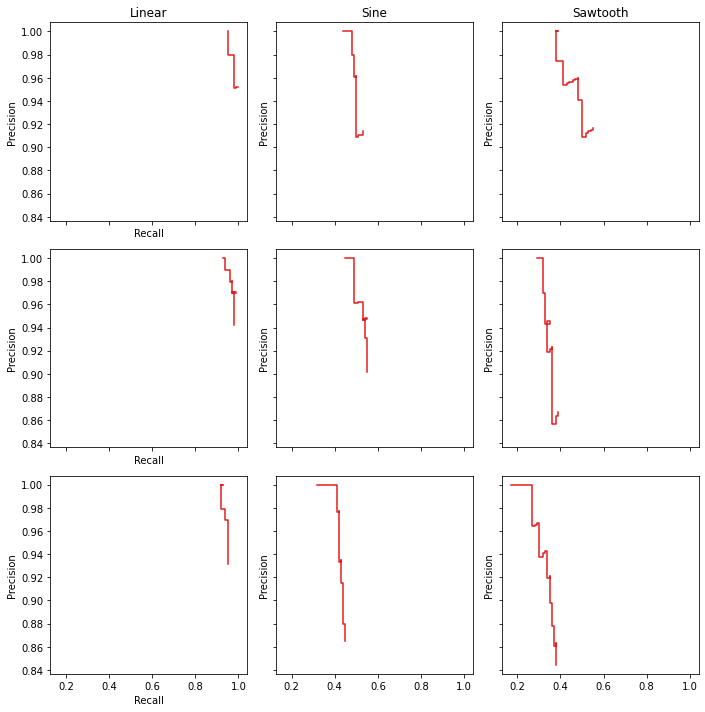

In [6]:
fig_mrpc("./results/journal/simulation/MRPC/sim_results/edges/")

In [ ]:
def fig_polymr():
    ### Figure 2 ################
    #this is for sample 500
    findr_dir="./results/journal/simulation/polymr/"
    norows=3
    nocols=3
    fig, ax = plt.subplots(nrows=norows, ncols=nocols, sharex=True, sharey=True, figsize=(10,10))
    #fig.suptitle("Precision-Recall Curve plots for 500 permutations ")
    plot_index = 0

    for i in [ '1000','500','300'] :
        for j in ['Linear', 'Sine', 'Saw']:
            precision_findr, recall_findr = calculate_precision_recall_polymr(findr_dir + j + i  +"polymr"+ ".csv", findr_dir + "Indp" + i +"polymr"  + ".csv")
            #print(precision_findr,recall_findr)
            curr_ax = ax[plot_index // nocols, plot_index % nocols]
    
            disp = PrecisionRecallDisplay(precision=precision_findr, recall=recall_findr)
            disp.plot(ax=curr_ax, color=color_algo['SVR'])#,marker='.') #https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.plot.html
            curr_ax.set_ylabel('')
            curr_ax.set_xlabel('')
            # set datatype as titles 
            if(plot_index  == 0 ):        
                curr_ax.set_title('Linear')
            elif(plot_index == 1 ):
                curr_ax.set_title('Sine')
            elif(plot_index  == 2 ):
                curr_ax.set_title('Sawtooth')   
            if(plot_index ==0 or plot_index==3 or plot_index==6):
                #curr_ax.set_ylabel('Sample size =500 \n Precision') 
                curr_ax.set_xlabel('Recall')
            curr_ax.set_ylabel('Precision') 
                

                
            plot_index += 1

    #plt.tight_layout()
    # Create a common legend
    #handles = [ax[0, 0].lines[0], ax[0, 0].lines[1], ax[0, 0].lines[2], ax[0, 0].lines[3]]
    #labels = ['SVR', 'ANN', 'CIT', 'KRR']
    #fig.legend(handles, labels, loc='lower left')

    fig.tight_layout()
    #plt.savefig("./results/journal/plots/fig2_mod_main.png",bbox_inches='tight',dpi=1200)
    #plt.savefig('./results/journal/plots/fig2_mod_main.svg', bbox_inches='tight',format='svg', dpi=1200)


In [ ]:
fig_polymr()

In [ ]:
def fig2_b_mod_supp():
    ### Figure 2 ################
    nlcd_dir="./results/journal/simulation/nlcd/"
    cit_dir="./results/journal/simulation/cit/"
    norows=2
    nocols=3
    fig, ax = plt.subplots(nrows=norows, ncols=nocols, sharex=True, sharey=True, figsize=(7,6.6))
    fig.suptitle("Precision-Recall Curve plots for 500 permutations ")
    plot_index = 0

    for i in ['300', '1000'] :
        for j in ['Linear', 'Sine', 'Saw']:
            for k in [ '500']: # put 100 permutations in supplementary 
                precision_nlmr_SVR, recall_nlmr_SVR = calculate_precision_recall(nlcd_dir + j + "SVR" + i + "s" + k + "perm.csv", nlcd_dir+"IndpSVR" + i + "s" + k + "perm.csv")
                precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall(nlcd_dir + j + "KRR" + i + "s" + k + "perm.csv", nlcd_dir+"IndpKRR" + i + "s" + k + "perm.csv")
                precision_nlmr_ANN, recall_nlmr_ANN = calculate_precision_recall(nlcd_dir + j + "ANN" + i + "s" + k + "perm.csv", nlcd_dir+"IndpANN" + i + "s" + k + "perm.csv")
                precision_CIT, recall_CIT = calculate_precision_recall(cit_dir + j + i + "cit" + k + "perm.csv", cit_dir+"Indp" + i + "cit" + k + "perm.csv")

                curr_ax = ax[plot_index // nocols, plot_index % nocols]
        
                disp = PrecisionRecallDisplay(precision=precision_nlmr_SVR, recall=recall_nlmr_SVR)
                disp.plot(ax=curr_ax, color=color_algo['SVR'])#,marker='.') #https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.plot.html
                disp = PrecisionRecallDisplay(precision=precision_nlmr_ANN, recall=recall_nlmr_ANN)
                disp.plot(ax=curr_ax, color=color_algo['ANN'])
               
                disp = PrecisionRecallDisplay(precision=precision_nlmr_KRR, recall=recall_nlmr_KRR)
                disp.plot(ax=curr_ax, color=color_algo['KRR'])
                disp = PrecisionRecallDisplay(precision=precision_CIT, recall=recall_CIT)
                disp.plot(ax=curr_ax, color=color_algo['CIT'])
                curr_ax.set_ylabel('')
                curr_ax.set_xlabel('')
                # set datatype as titles 
                if(plot_index // nocols == 0 and plot_index % nocols == 0):        
                    curr_ax.set_title('Linear')
                elif(plot_index // nocols == 0 and plot_index % nocols == 1):
                    curr_ax.set_title('Sine')
                elif(plot_index // nocols == 0 and plot_index % nocols == 2):
                    curr_ax.set_title('Sawtooth')   
                if(plot_index % nocols == 0 and plot_index//norows==0):
                    curr_ax.set_ylabel('Sample size =300 \n Precision')
                if(plot_index % nocols == 0 and plot_index//norows==1):
                    curr_ax.set_ylabel('Sample size =1000 \n Precision')
                if(plot_index //nocols == (norows-1)): # if its the last row then add x labels 
                    curr_ax.set_xlabel('Recall')
                if(plot_index // nocols == norows-1 and plot_index % nocols == 0) :# if the plot is lower left, then add the legend in that plot
                    xindex=norows-1
                    yindex=0
                    handles = [ax[xindex, yindex].lines[2],ax[xindex,yindex].lines[0], ax[xindex, yindex].lines[1],ax[xindex, yindex].lines[3]]
                    labels = ['NLCD (KRR)','NLCD (SVR)', 'NLCD (ANN)',  'CIT (baseline)']
                    curr_ax.legend(handles,labels,loc="lower left")

                
                plot_index += 1

    #plt.tight_layout()
    # Create a common legend
    #handles = [ax[0, 0].lines[0], ax[0, 0].lines[1], ax[0, 0].lines[2], ax[0, 0].lines[3]]
    #labels = ['SVR', 'ANN', 'CIT', 'KRR']
    #fig.legend(handles, labels, loc='lower left')

    fig.tight_layout()
    plt.savefig("./results/journal/plots/fig2_b_mod_supp.png",bbox_inches='tight',dpi=1200)
    plt.savefig('./results/journal/plots/fig2_b_mod_supp.svg', bbox_inches='tight',format='svg', dpi=1200)


In [ ]:
fig2_b_mod_supp()

In [ ]:
def fig2_suppl_c():
    ### Figure 2 supplementary c c################
    nlcd_dir="./results/journal/10run/runvariation/nlcd/"
    cit_dir="./results/journal/10run/runvariation/cit/"
    norows=2
    nocols=3
    fig, ax = plt.subplots(nrows=norows, ncols=nocols, sharex=True, sharey=True, figsize=(8,5))
    fig.suptitle("PR curves for 10 runs ")

    plot_index = 0

    for k in [ '100','500']: 
        for j in ['Linear','Sine','Saw']:
            for i in ['1','2','3','4','5','6','7','8','9','10']:
                precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall(nlcd_dir+j+"KRR500s" + k +"perm"+i+"run"+".csv", nlcd_dir+"IndpKRR500s" + k + "perm"+i+"run"+".csv")
                precision_CIT, recall_CIT = calculate_precision_recall(cit_dir+j+"500cit" + k + "perm"+"run"+i+".csv", cit_dir+"Indp500cit" + k + "perm"+"run"+i+".csv")

                curr_ax = ax[ plot_index//nocols,plot_index % nocols]

                disp = PrecisionRecallDisplay(precision=precision_nlmr_KRR, recall=recall_nlmr_KRR)
                disp.plot(ax=curr_ax, color=color_algo['KRR'])#,marker='.') #https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.plot.html
                disp = PrecisionRecallDisplay(precision=precision_CIT, recall=recall_CIT)
                disp.plot(ax=curr_ax, color=color_algo['CIT'])  
                curr_ax.set_ylabel('')
                curr_ax.set_xlabel('')
            if(plot_index // nocols == 0 and plot_index % nocols == 0):
                curr_ax.set_title("Linear")
                curr_ax.set_ylabel("Permutations=100 \n Precision ")
            if(plot_index // nocols == 0 and plot_index % nocols == 1):
                curr_ax.set_title("Sine")
            if(plot_index // nocols == 0 and plot_index % nocols == 2):
                curr_ax.set_title("Sawtooth")
            if(plot_index // nocols == 1 ):
                if(plot_index % nocols == 0):
                    curr_ax.set_ylabel("Permutations=500 \n Precision")
                curr_ax.set_xlabel("Recall")
                
            if(plot_index // nocols == 1 and plot_index % nocols == 0) :
                xindex=norows-1
                yindex=0
                handles = [curr_ax.lines[0],curr_ax.lines[1]]
                labels = ['NLCD (KRR)','CIT (baseline)']
                curr_ax.legend(handles,labels,loc="lower left")
            
            plot_index += 1
        


    fig.tight_layout()
    #plt.savefig("./results/journal/plots/fig_2_suppl_c.png",bbox_inches='tight',dpi=1200)
    #plt.savefig('./results/journal/plots/fig_2_suppl_c.svg', bbox_inches='tight',format='svg', dpi=1200)


In [ ]:
fig2_suppl_c()

In [ ]:
def fig2_suppl_d():
    ### Figure 2 supplementary d ################
    nlcd_dir="./results/journal/10run/datavariation/nlcd/"
    cit_dir="./results/journal/10run/datavariation/cit/"
    norows=2
    nocols=3
    fig, ax = plt.subplots(nrows=norows, ncols=nocols, sharex=True, sharey=True, figsize=(8,5))
    fig.suptitle("PR curves for 10 different datasets ")

    plot_index = 0

    for k in [ '100','500']: 
        for j in ['Linear','Sine','Saw']:
            for i in ['1','2','3','4','5','6','7','8','9','10']:
                precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall(nlcd_dir+j+"KRR500s" + k +"perm"+i+"run"+".csv", nlcd_dir+"IndpKRR500s" + k + "perm"+i+"run"+".csv")
                precision_CIT, recall_CIT = calculate_precision_recall(cit_dir+j+"500cit" + k + "perm"+"run"+i+".csv", cit_dir+"Indp500cit" + k + "perm"+"run"+i+".csv")

                curr_ax = ax[ plot_index//nocols,plot_index % nocols]

                disp = PrecisionRecallDisplay(precision=precision_nlmr_KRR, recall=recall_nlmr_KRR)
                disp.plot(ax=curr_ax, color=color_algo['KRR'])#,marker='.') #https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.plot.html
                disp = PrecisionRecallDisplay(precision=precision_CIT, recall=recall_CIT)
                disp.plot(ax=curr_ax, color=color_algo['CIT'])
                #curr_ax.plot(recall_nlmr_KRR,precision_nlmr_KRR,color=color_algo['KRR'])
                #curr_ax.plot(recall_CIT,precision_CIT,color=color_algo['CIT'])    
                curr_ax.set_ylabel('')
                curr_ax.set_xlabel('')
            if(plot_index // nocols == 0 and plot_index % nocols == 0):
                curr_ax.set_title("Linear")
                curr_ax.set_ylabel("Permutations=100 \n Precision")
            if(plot_index // nocols == 0 and plot_index % nocols == 1):
                curr_ax.set_title("Sine")
            if(plot_index // nocols == 0 and plot_index % nocols == 2):
                curr_ax.set_title("Sawtooth")
            if(plot_index // nocols == 1 ):
                if(plot_index % nocols == 0):
                    curr_ax.set_ylabel("Permutations=500 \n Precision")
                curr_ax.set_xlabel("Recall")
                
            if(plot_index // nocols == 1 and plot_index % nocols == 0) :
                xindex=norows-1
                yindex=0
                handles = [curr_ax.lines[0],curr_ax.lines[1]]
                labels = ['NLCD (KRR)','CIT (baseline)']
                curr_ax.legend(handles,labels,loc="lower left")
            
            plot_index += 1
        


    fig.tight_layout()
    #plt.savefig("./results/journal/plots/fig_2_suppl_d.png",bbox_inches='tight',dpi=1200)
    #plt.savefig('./results/journal/plots/fig_2_suppl_d.svg', bbox_inches='tight',format='svg', dpi=1200)


In [ ]:
fig2_suppl_d()

In [14]:
def fig4_a():
    ### Figure 3 variance plot #################### 
    #sample size of 500 and 100 permutations
    nlcd_dir="./results/journal/simulation/nlcd/"
    cit_dir="./results/journal/simulation/cit/"
    norows=1
    nocols=4
    fig, ax = plt.subplots(nrows=norows, ncols=nocols, sharex=True, sharey=True, figsize=(9,3))
    #fig.suptitle("Performance when the variance changes for sample size of 500 ")
    #fig.text(0.5, 1, 'Precision-Recall Curve plots', ha='center')
    #fig.text(0.22, 1, 'Linear', ha='center')
    #fig.text(0.52, 1, 'Sine', ha='center')
    #fig.text(0.85, 1, 'Saw', ha='center')
    #fig.text(0,0.20, 'Sample size 1000', va='center', rotation='vertical')
    color_purple  = sns.color_palette("Purples", 3)
    color_green = sns.color_palette("Greens", 3)

    fig.text(0.21,0.99, 'Unenqual variance', va='center', rotation='horizontal',fontsize=13)
    fig.text(0.71,0.99, 'Equal variance', va='center', rotation='horizontal',fontsize=13)
    plot_index = 0

    for j in ['Linearvar', 'Paravar','Linear','Para']:
        col_indx=0
        #curr_ax = ax[plot_index // nocols, plot_index % nocols]
        curr_ax=ax[plot_index]
        #for i in ['300', '500', '1000'] :
        for i in ['500']:
            for k in [ '100']: 
                precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall(nlcd_dir + j + "KRR" + i + "s" + k + "perm.csv", nlcd_dir+"IndpKRR" + i + "s" + k + "perm.csv")
                precision_CIT, recall_CIT = calculate_precision_recall(cit_dir + j + i + "cit" + k + "perm.csv", cit_dir+"Indp" + i + "cit" + k + "perm.csv")
                print("Datatype",j,"Sample",i,"Permutations",k)
                print("AUC CIT",auc(recall_CIT, precision_CIT))
                print("AUC NLMR",auc(recall_nlmr_KRR, precision_nlmr_KRR))
                #curr_ax.plot(recall_CIT,precision_CIT,color=color_algo['CIT'])
                #curr_ax.plot(recall_nlmr_KRR,precision_nlmr_KRR,color=color_algo['KRR'])
                disp = PrecisionRecallDisplay(precision=precision_CIT, recall=recall_CIT)
                disp.plot(ax=curr_ax, color=color_algo['CIT'])
                disp = PrecisionRecallDisplay(precision=precision_nlmr_KRR, recall=recall_nlmr_KRR)
                disp.plot(ax=curr_ax, color=color_algo['KRR'])
                curr_ax.set_ylabel('')
                curr_ax.set_xlabel('')
                # set datatype as titles 
                if(plot_index ==0 or plot_index==2):        
                    curr_ax.set_title('Linear')
                elif(plot_index==1 or plot_index==3):
                    curr_ax.set_title('Parabola')
                if(plot_index == 0):   # if its the second row then add the y labels 
                    curr_ax.set_ylabel('Precision')
                if(plot_index == 2):
                    curr_ax.set_ylabel("Precision")
                #if(plot_index //nocols == (norows-1)): # if its the last row then add x labels 
                curr_ax.set_xlabel('Recall')
                #col_indx += 1
        #if(plot_index // nocols == norows-1 and plot_index % nocols == 0) :# if the plot is lower left, then add the legend in that plot
        if(plot_index==0) :
            xindex=norows-1
            yindex=0
            handles = [ax[ yindex].lines[0], ax[yindex].lines[1]]
            labels = ['CIT','NLCD (KRR)']
            curr_ax.legend(handles,labels,loc="lower left")
            
                
        
        plot_index+=1

    fig.tight_layout()
    plt.savefig("./results/journal/plots/fig4_var.png",bbox_inches='tight',dpi=1200)
    plt.savefig('./results/journal/plots/fig4_var.svg', bbox_inches='tight',format='svg', dpi=1200)
    plt.savefig('./results/journal/plots/fig4_var.pdf', bbox_inches='tight',format='pdf', dpi=1200)


Datatype Linearvar Sample 500 Permutations 100
AUC CIT 0.9286210921343341
AUC NLMR 0.9876557017074585
Datatype Paravar Sample 500 Permutations 100
AUC CIT 0.8050386721635641
AUC NLMR 0.9771324719067886
Datatype Linear Sample 500 Permutations 100
AUC CIT 0.9475736626473172
AUC NLMR 0.9430287238370443
Datatype Para Sample 500 Permutations 100
AUC CIT 0.9629754325876296
AUC NLMR 0.9584140502594791


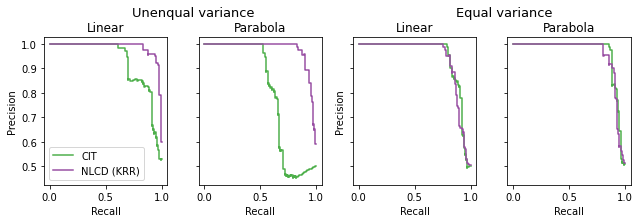

In [15]:
fig4_a()

In [22]:
def fig4_suppl():
    #### Figure 3 supplementary ######
    nlcd_dir="./results/journal/simulation/nlcd/"
    cit_dir="./results/journal/simulation/cit/"
    norows=2
    nocols=2
    fig, ax = plt.subplots(nrows=norows, ncols=nocols, sharex=True, sharey=True, figsize=(10,10))
    #fig.suptitle("Performance when the variance changes for sample sizes of 300 and 1000 ")
    color_purple  = sns.color_palette("Purples", 2)
    color_green = sns.color_palette("Greens", 2)
    plot_index = 0

    for j in ['Linearvar', 'Paravar','Linear','Para']:
        col_indx=0
        curr_ax = ax[plot_index // nocols, plot_index % nocols]
        for i in ['300', '1000'] :
        #for i in ['500']:
            for k in [ '100']: 
                precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall(nlcd_dir + j + "KRR" + i + "s" + k + "perm.csv", nlcd_dir+"IndpKRR" + i + "s" + k + "perm.csv")
                precision_CIT, recall_CIT = calculate_precision_recall(cit_dir + j + i + "cit" + k + "perm.csv", cit_dir+"Indp" + i + "cit" + k + "perm.csv")
                #curr_ax.plot(recall_CIT,precision_CIT,color=color_green[col_indx])

                disp = PrecisionRecallDisplay(precision=precision_CIT, recall=recall_CIT)
                disp.plot(ax=curr_ax, color=color_green[col_indx])
                disp = PrecisionRecallDisplay(precision=precision_nlmr_KRR, recall=recall_nlmr_KRR)
                disp.plot(ax=curr_ax, color=color_purple[col_indx])
                #curr_ax.plot(recall_nlmr_KRR,precision_nlmr_KRR,color=color_purple[col_indx])
                curr_ax.set_ylabel('')
                curr_ax.set_xlabel('')
                # set datatype as titles 
                if(plot_index // nocols == 0 and plot_index % nocols == 0):        
                    curr_ax.set_title('Linear')
                elif(plot_index // nocols == 0 and plot_index % nocols == 1):
                    curr_ax.set_title('Parabola')
                if(plot_index % nocols == 0):   # if its the second row then add the y labels 
                    curr_ax.set_ylabel('Precision')
                if(plot_index % nocols == 0 and plot_index // norows  == 0):  
                    curr_ax.set_ylabel('Unequal Variance \n Precision')
                if(plot_index % nocols == 0 and plot_index // norows  == 1):  
                    curr_ax.set_ylabel('Equal Variance \n Precision')
                if(plot_index //nocols == (norows-1)): # if its the last row then add x labels 
                    curr_ax.set_xlabel('Recall')
                col_indx += 1
        if(plot_index // nocols == norows-1 and plot_index % nocols == 0) :# if the plot is lower left, then add the legend in that plot
            xindex=norows-1
            yindex=0
            handles = [ax[xindex, yindex].lines[1], ax[xindex, yindex].lines[3],ax[xindex, yindex].lines[0], ax[xindex, yindex].lines[2]]
            labels = ['NLCD (300)','NLCD (1000)','CIT (300)','CIT (1000)']
            curr_ax.legend(handles,labels,loc="lower left")
            
                
        
        plot_index+=1

    fig.tight_layout()
    #plt.savefig("./results/journal/plots/fig4_var_suppl.png",bbox_inches='tight',dpi=1200)
    #plt.savefig('./results/journal/plots/fig4_var_suppl.svg', bbox_inches='tight',format='svg', dpi=1200)
    plt.savefig('./results/journal/plots/fig4_var_suppl.pdf', bbox_inches='tight',format='pdf', dpi=1200)


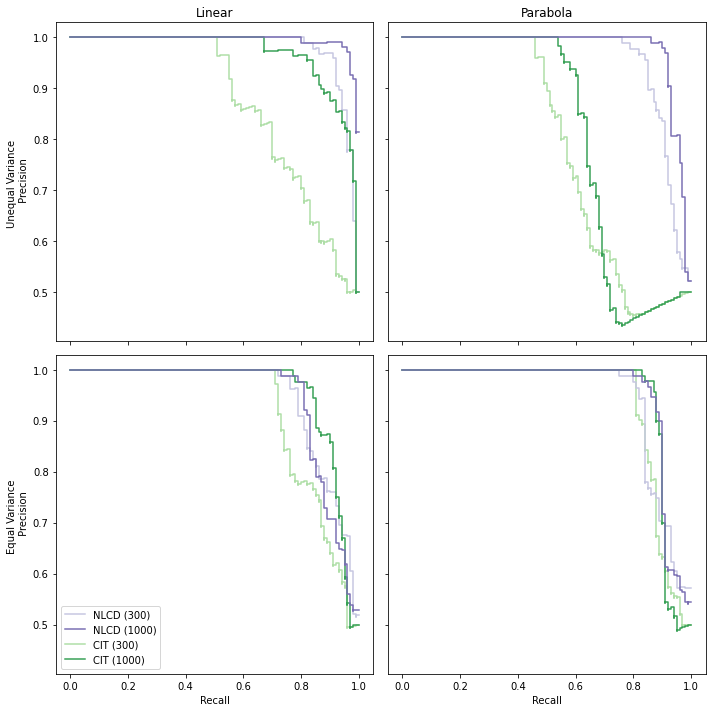

In [23]:
fig4_suppl()

In [ ]:
def fig4_a_norm():
    ### Figure 3 variance plot #################### 
    nlcd_dir="./results/journal/simulation/nlcd/"
    cit_dir="./results/journal/simulation/cit/"
    norows=2
    nocols=2
    fig, ax = plt.subplots(nrows=norows, ncols=nocols, sharex=True, sharey=True, figsize=(10,10))
    fig.suptitle("Performance when the variance changes for sample size of 300 after normalizing only A")
    #fig.text(0.5, 1, 'Precision-Recall Curve plots', ha='center')
    #fig.text(0.22, 1, 'Linear', ha='center')
    #fig.text(0.52, 1, 'Sine', ha='center')
    #fig.text(0.85, 1, 'Saw', ha='center')
    #fig.text(0,0.20, 'Sample size 1000', va='center', rotation='vertical')
    color_purple  = sns.color_palette("Purples", 3)
    color_green = sns.color_palette("Greens", 3)

    #fig.text(0,0.27, 'Same variance', va='center', rotation='vertical')
    #fig.text(0,0.71, 'Different variance', va='center', rotation='vertical')
    plot_index = 0

    for j in ['Linearvar', 'Paravar','Linear','Para']:
        col_indx=0
        curr_ax = ax[plot_index // nocols, plot_index % nocols]
        #for i in ['300', '500', '1000'] :
        for i in ['300']:
            for k in [ '100']: 
                if j=="Linearvar" or j=="Paravar":
                    precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall(nlcd_dir + j + "KRR" + i + "NORMs" + k + "perm.csv", nlcd_dir+"IndpKRR" + i + "s" + k + "perm.csv")
                    precision_CIT, recall_CIT = calculate_precision_recall(cit_dir + j +"norm"+ i + "cit" + k + "perm.csv", cit_dir+"Indp" + i + "cit" + k + "perm.csv")
                else:
                    precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall(nlcd_dir + j + "KRR" + i + "s" + k + "perm.csv", nlcd_dir+"IndpKRR" + i + "s" + k + "perm.csv")
                    precision_CIT, recall_CIT = calculate_precision_recall(cit_dir + j + i + "cit" + k + "perm.csv", cit_dir+"Indp" + i + "cit" + k + "perm.csv")
             
                #curr_ax.plot(recall_CIT,precision_CIT,color=color_algo['CIT'])
                #curr_ax.plot(recall_nlmr_KRR,precision_nlmr_KRR,color=color_algo['KRR'])
                disp = PrecisionRecallDisplay(precision=precision_CIT, recall=recall_CIT)
                disp.plot(ax=curr_ax, color=color_algo['CIT'])
                disp = PrecisionRecallDisplay(precision=precision_nlmr_KRR, recall=recall_nlmr_KRR)
                disp.plot(ax=curr_ax, color=color_algo['KRR'])
                curr_ax.set_ylabel('')
                curr_ax.set_xlabel('')
                # set datatype as titles 
                if(plot_index // nocols == 0 and plot_index % nocols == 0):        
                    curr_ax.set_title('Linear')
                elif(plot_index // nocols == 0 and plot_index % nocols == 1):
                    curr_ax.set_title('Parabola')
                if(plot_index == 0):   # if its the second row then add the y labels 
                    curr_ax.set_ylabel('Different variance \n Precision')
                if(plot_index == 2):
                    curr_ax.set_ylabel("Same variance \n Precision")
                if(plot_index //nocols == (norows-1)): # if its the last row then add x labels 
                    curr_ax.set_xlabel('Recall')
                col_indx += 1
        if(plot_index // nocols == norows-1 and plot_index % nocols == 0) :# if the plot is lower left, then add the legend in that plot
            xindex=norows-1
            yindex=0
            handles = [ax[xindex, yindex].lines[0], ax[xindex, yindex].lines[1]]
            labels = ['CIT','NLCD (KRR)']
            curr_ax.legend(handles,labels,loc="lower left")
            
                
        
        plot_index+=1

    fig.tight_layout()
    #plt.savefig("./results/journal/plots/fig4_var.png",bbox_inches='tight',dpi=1200)
    #plt.savefig('./results/journal/plots/fig4_var.svg', bbox_inches='tight',format='svg', dpi=1200)


In [ ]:
fig4_a_norm()

In [ ]:
def fig4_a_normboth():
    ### Figure 3 variance plot #################### 
    nlcd_dir="./results/journal/simulation/nlcd/"
    cit_dir="./results/journal/simulation/cit/"
    norows=2
    nocols=2
    fig, ax = plt.subplots(nrows=norows, ncols=nocols, sharex=True, sharey=True, figsize=(10,10))
    fig.suptitle("Performance comparison between normalized vs unnormalized variance for sample size of 500")
    #fig.text(0.5, 1, 'Precision-Recall Curve plots', ha='center')
    #fig.text(0.22, 1, 'Linear', ha='center')
    #fig.text(0.52, 1, 'Sine', ha='center')
    #fig.text(0.85, 1, 'Saw', ha='center')
    #fig.text(0,0.20, 'Sample size 1000', va='center', rotation='vertical')
    color_purple  = sns.color_palette("Purples", 3)
    color_green = sns.color_palette("Greens", 3)

    #fig.text(0,0.27, 'Same variance', va='center', rotation='vertical')
    #fig.text(0,0.71, 'Different variance', va='center', rotation='vertical')
    plot_index = 0

    for j in ['Linearvar', 'Paravar','Linear','Para']:
        col_indx=0
        curr_ax = ax[plot_index // nocols, plot_index % nocols]
        #for i in ['300', '500', '1000'] :
        for i in ['500']:
            for k in [ '100']: 
                if j=="Linearvar" or j=="Paravar":
                    precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall(nlcd_dir + j + "KRR" + i + "NORMBOTHs" + k + "perm.csv", nlcd_dir+"IndpKRR" + i + "s" + k + "perm.csv")
                    precision_CIT, recall_CIT = calculate_precision_recall(cit_dir + j +"normboth"+ i + "cit" + k + "perm.csv", cit_dir+"Indp" + i + "cit" + k + "perm.csv")
                else:
                    j=j+'var'
                    precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall(nlcd_dir + j + "KRR" + i + "s" + k + "perm.csv", nlcd_dir+"IndpKRR" + i + "s" + k + "perm.csv")
                    precision_CIT, recall_CIT = calculate_precision_recall(cit_dir + j + i + "cit" + k + "perm.csv", cit_dir+"Indp" + i + "cit" + k + "perm.csv")
             
                #curr_ax.plot(recall_CIT,precision_CIT,color=color_algo['CIT'])
                #curr_ax.plot(recall_nlmr_KRR,precision_nlmr_KRR,color=color_algo['KRR'])
                disp = PrecisionRecallDisplay(precision=precision_CIT, recall=recall_CIT)
                disp.plot(ax=curr_ax, color=color_algo['CIT'])
                disp = PrecisionRecallDisplay(precision=precision_nlmr_KRR, recall=recall_nlmr_KRR)
                disp.plot(ax=curr_ax, color=color_algo['KRR'])
                curr_ax.set_ylabel('')
                curr_ax.set_xlabel('')
                # set datatype as titles 
                if(plot_index // nocols == 0 and plot_index % nocols == 0):        
                    curr_ax.set_title('Linear')
                elif(plot_index // nocols == 0 and plot_index % nocols == 1):
                    curr_ax.set_title('Parabola')
                if(plot_index == 0):   # if its the second row then add the y labels 
                    curr_ax.set_ylabel('With variance normalization \n Precision')
                if(plot_index == 2):
                    curr_ax.set_ylabel("Without variance normalization \n Precision")
                if(plot_index //nocols == (norows-1)): # if its the last row then add x labels 
                    curr_ax.set_xlabel('Recall')
                col_indx += 1
        if(plot_index // nocols == norows-1 and plot_index % nocols == 0) :# if the plot is lower left, then add the legend in that plot
            xindex=norows-1
            yindex=0
            handles = [ax[xindex, yindex].lines[0], ax[xindex, yindex].lines[1]]
            labels = ['CIT','NLCD (KRR)']
            curr_ax.legend(handles,labels,loc="lower left")
            
                
        
        plot_index+=1

    fig.tight_layout()
    #plt.savefig("./results/journal/plots/supp_var_norm.png",bbox_inches='tight',dpi=1200)
    #plt.savefig('./results/journal/plots/supp_var_norm.svg', bbox_inches='tight',format='svg', dpi=1200)


In [ ]:
fig4_a_normboth()

In [ ]:
def fig3():

    norows=4
    nocols=3
    nlcd_dir='./results/journal/simulation/nlcd/'
    cit_dir='./results/journal/simulation/cit/'
    fig, ax = plt.subplots(nrows=norows, ncols=nocols, sharex=True, sharey=True, figsize=(10,10))
    fig.suptitle("Tests comparison of NLCD vs CIT p-values : 500 sample size , 500 permutations ")
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    for plot_index in [0,3,6,9]:
        if plot_index==0:
            x = 'p_LassocB'
            y = 'p_TL'
        elif plot_index==3:
            x='p_LassocA|B'
            y='p_GL'
        elif plot_index==6:
            x='p_AassocB|L'
            y='p_TG'
        elif plot_index==9:
            x='p_LindB|A'
            y='p_Lind'
        for j in ['Linear', 'Sine', 'Saw']: 
                    
            
            curr_ax = ax[plot_index // nocols, plot_index % nocols]
            curr_ax.set_ylabel('')
            curr_ax.set_xlabel('')
            dfnlcd=pd.read_csv(nlcd_dir+j+'KRR500s500perm.csv')
            dfcit=pd.read_csv(cit_dir+j+'500cit500perm.csv') 

            #return dfnlcd[x],dfcit[y]
            hb=curr_ax.hexbin(dfnlcd[x], dfcit[y], gridsize=5,mincnt=1, cmap='Blues',vmin=0,vmax=100)
            #if(j=='Sine' and x=='p_AassocB|L'):
            #    cbar = fig.colorbar(hb, cax=cbar_ax)
            if(plot_index//nocols == 0 and plot_index % nocols ==1 ):
                curr_ax.set_xlabel('<----------NLCD L ~ B---------->')
            if(plot_index//nocols == 1 and plot_index % nocols ==1 ):
                curr_ax.set_xlabel('<----------NLCD L ~ A|B-------->')
            if(plot_index//nocols == 2 and plot_index % nocols ==1 ):
                curr_ax.set_xlabel('<----------NLCD A ~ B|L-------->')
            if(plot_index//nocols == 3 and plot_index % nocols ==1 ):
                curr_ax.set_xlabel(r'<----------NLCD L $\bot$ B|A-------->')

            if(plot_index // nocols == 0 and plot_index % nocols == 0):
                curr_ax.set_title('Linear')
            elif(plot_index // nocols == 0 and plot_index % nocols == 1):
                curr_ax.set_title('Sine')
            elif(plot_index // nocols == 0 and plot_index % nocols == 2):
                curr_ax.set_title('Sawtooth')   
            if(plot_index % nocols == 0 and plot_index//nocols == 0):
                curr_ax.set_ylabel(' CIT L ~ B')
            if(plot_index % nocols == 0 and plot_index//nocols == 1 ):
                curr_ax.set_ylabel(' CIT L ~ A|B')
            if(plot_index % nocols == 0 and plot_index // nocols == 2):
                curr_ax.set_ylabel(' CIT A ~ B|L')
            if(plot_index % nocols == 0 and plot_index // nocols == 3):
                curr_ax.set_ylabel(r' CIT L $\bot$ B|A')
            
            

            plot_index += 1

    cbar = fig.colorbar(hb, cax=cbar_ax)
    #cbar = fig.colorbar
    cbar.set_label('Counts')

    #plt.savefig("./results/journal/plots/fig_3.png",bbox_inches='tight',dpi=1200)
    #plt.savefig('./results/journal/plots/fig_3.svg', bbox_inches='tight',format='svg', dpi=1200)

In [ ]:
fig3() #not being used in the current paper

In [ ]:
def fig3_mod_main():

    norows=1
    nocols=3
    nlcd_dir='./results/journal/simulation/nlcd/'
    cit_dir='./results/journal/simulation/cit/'
    fig, ax = plt.subplots(nrows=norows, ncols=nocols, sharex=True, sharey=True, figsize=(5,3))
    #fig.suptitle("Test 3 comparison of NLCD vs CIT p-values :\n 500 sample size , 500 permutations ")
    #cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    cbar_ax = fig.add_axes([0.98, 0.15, 0.02, 0.7])
    x='p_AassocB|L'
    y='p_TG'
    count=0
    for j in ['Linear', 'Sine', 'Saw']: 
                    
        curr_ax = ax[count]
        count+=1
        curr_ax.set_ylabel('')
        curr_ax.set_xlabel('')
        dfnlcd=pd.read_csv(nlcd_dir+j+'KRR500s500perm.csv')
        dfcit=pd.read_csv(cit_dir+j+'500cit500perm.csv') 
        hb=curr_ax.hexbin(dfnlcd[x], dfcit[y], gridsize=5,mincnt=1, cmap='plasma',vmin=0,vmax=100)
        if(count==2 ):
            curr_ax.set_xlabel('NLCD A ~ B|L', labelpad=20)

        if(count==1):
            curr_ax.set_title('Linear')
        if(count==2):
            curr_ax.set_title('Sine')
        if(count==3):
            curr_ax.set_title('Sawtooth')   
        if(count==1):
            curr_ax.set_ylabel(' CIT A ~ B|L')
            
            

    cbar = fig.colorbar(hb, cax=cbar_ax)
    #cbar = fig.colorbar
    cbar.set_label('Counts')
    plt.tight_layout()
    plt.savefig("./results/journal/plots/fig_3_mod_main.png",bbox_inches='tight',dpi=1200)
    plt.savefig('./results/journal/plots/fig_3_mod_main.svg', bbox_inches='tight',format='svg', dpi=1200)

In [ ]:
fig3_mod_main()

In [ ]:
def fig3_mod_supp():
    norows = 3
    nocols = 3
    nlcd_dir = './results/journal/simulation/nlcd/'
    cit_dir = './results/journal/simulation/cit/'
    
    fig, ax = plt.subplots(nrows=norows, ncols=nocols, sharex=True, sharey=True, figsize=(10, 10))
    #fig.suptitle("Tests comparison of NLCD vs CIT p-values: \n 500 sample size, 500 permutations")
    
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])

    for row_index in range(norows):

        for col_index, j in enumerate(['Linear', 'Sine', 'Saw']):
            plot_index = row_index * nocols + col_index
            if plot_index == 0:
                x = 'p_LassocB'
                y = 'p_TL'
            elif plot_index == 3:
                x = 'p_LassocA|B'
                y = 'p_GL'
            elif plot_index == 6:
                x = 'p_LindB|A'
                y = 'p_Lind'

            curr_ax = ax[row_index, col_index]
            curr_ax.set_ylabel('')
            curr_ax.set_xlabel('')
            dfnlcd = pd.read_csv(nlcd_dir + j + 'KRR500s500perm.csv')
            dfcit = pd.read_csv(cit_dir + j + '500cit500perm.csv')

            hb = curr_ax.hexbin(dfnlcd[x], dfcit[y], gridsize=5, mincnt=1, cmap='plasma', vmin=0, vmax=100)

            if col_index == 1:
                if row_index == 0:
                    curr_ax.set_xlabel('NLCD L ~ B',labelpad=15)
                elif row_index == 1:
                    curr_ax.set_xlabel('NLCD L ~ A|B',labelpad=15)
                elif row_index == 2:
                    curr_ax.set_xlabel(r'NLCD L $\bot$ B|A',labelpad=15)
            if row_index == 0:
                if col_index == 0:
                    curr_ax.set_title('Linear')
                elif col_index == 1:
                    curr_ax.set_title('Sine')
                elif col_index == 2:
                    curr_ax.set_title('Sawtooth')
            
            if col_index == 0 and row_index == 0:
                curr_ax.set_ylabel('CIT L ~ B')
            elif col_index == 0 and row_index == 1:
                curr_ax.set_ylabel('CIT L ~ A|B')
            elif col_index == 0 and row_index == 2:
                curr_ax.set_ylabel('CIT A ~ B|L')
            elif col_index == 0 and row_index == 3:
                curr_ax.set_ylabel(r'CIT L $\bot$ B|A')

    cbar = fig.colorbar(hb, cax=cbar_ax)
    cbar.set_label('Counts')

    plt.savefig("./results/journal/plots/fig_3_mod_supp.png", bbox_inches='tight', dpi=1200)
    plt.savefig('./results/journal/plots/fig_3_mod_supp.svg', bbox_inches='tight', format='svg', dpi=1200)


In [ ]:
fig3_mod_supp()

In [ ]:
def fig3_supp():

    norows=4
    nocols=3
    nlcd_dir='./results/journal/simulation/nlcd/'
    cit_dir='./results/journal/simulation/cit/'
    fig, ax = plt.subplots(nrows=norows, ncols=nocols, sharex=True, sharey=True, figsize=(10,10))
    fig.suptitle("Tests comparison of NLCD vs CIT p-values : 500 sample size , 500 permutations ")
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    for plot_index in [0,3,6,9]:
        if plot_index==0:
            x = 'p_LassocB'
            y = 'p_TL'
        elif plot_index==3:
            x='p_LassocA|B'
            y='p_GL'
        elif plot_index==6:
            x='p_AassocB|L'
            y='p_TG'
        elif plot_index==9:
            x='p_LindB|A'
            y='p_Lind'
        for j in ['Linear', 'Sine', 'Saw']: 
                    
            
            curr_ax = ax[plot_index // nocols, plot_index % nocols]
            curr_ax.set_ylabel('')
            curr_ax.set_xlabel('')
            dfnlcd=pd.read_csv(nlcd_dir+j+'KRR500s500perm.csv')
            dfcit=pd.read_csv(cit_dir+j+'500cit500perm.csv') 

            #return dfnlcd[x],dfcit[y]
            hb=curr_ax.hexbin(dfnlcd[x], dfcit[y], gridsize=5,mincnt=1, cmap='Blues',vmin=0,vmax=100)
            #if(j=='Sine' and x=='p_AassocB|L'):
            #    cbar = fig.colorbar(hb, cax=cbar_ax)
            if(plot_index//nocols == 0 and plot_index % nocols ==1 ):
                curr_ax.set_xlabel('<----------NLCD L ~ B---------->')
            if(plot_index//nocols == 1 and plot_index % nocols ==1 ):
                curr_ax.set_xlabel('<----------NLCD L ~ A|B-------->')
            if(plot_index//nocols == 2 and plot_index % nocols ==1 ):
                curr_ax.set_xlabel('<----------NLCD A ~ B|L-------->')
            if(plot_index//nocols == 3 and plot_index % nocols ==1 ):
                curr_ax.set_xlabel(r'<----------NLCD L $\bot$ B|A-------->')

            if(plot_index // nocols == 0 and plot_index % nocols == 0):
                curr_ax.set_title('Linear')
            elif(plot_index // nocols == 0 and plot_index % nocols == 1):
                curr_ax.set_title('Sine')
            elif(plot_index // nocols == 0 and plot_index % nocols == 2):
                curr_ax.set_title('Sawtooth')   
            if(plot_index % nocols == 0 and plot_index//nocols == 0):
                curr_ax.set_ylabel(' CIT L ~ B')
            if(plot_index % nocols == 0 and plot_index//nocols == 1 ):
                curr_ax.set_ylabel(' CIT L ~ A|B')
            if(plot_index % nocols == 0 and plot_index // nocols == 2):
                curr_ax.set_ylabel(' CIT A ~ B|L')
            if(plot_index % nocols == 0 and plot_index // nocols == 3):
                curr_ax.set_ylabel(r' CIT L $\bot$ B|A')
            
            

            plot_index += 1

    cbar = fig.colorbar(hb, cax=cbar_ax)
    #cbar = fig.colorbar
    cbar.set_label('Counts')

    #plt.savefig("./results/journal/plots/fig_3.png",bbox_inches='tight',dpi=1200)
    #plt.savefig('./results/journal/plots/fig_3.svg', bbox_inches='tight',format='svg', dpi=1200)

In [ ]:
df=read_data('./data/Paravar500.txt')
i=4
A=df[i][1]
B=df[i][2]
L=df[i][0]
plt.scatter(A,B,c=L,alpha=0.5)
#plt.title("Parabola with unequal variance ")
plt.xlabel('A')
plt.ylabel('B')
plt.axvspan(xmin=-1, xmax=3, alpha=0.4, color='gray',label='Overlap') 
plt.legend()

plt.savefig("./results/journal/plots/fig4_example.png",bbox_inches='tight',dpi=1200)
plt.savefig('./results/journal/plots/fig4_example.svg', bbox_inches='tight',format='svg', dpi=1200)

In [23]:
df=read_data('./data/Paravar500.txt')
i=4
A=df[i][1]
B=df[i][2]
L=df[i][0]

In [24]:
read_configuration('./data/Paravar500.txt').iloc[4,]
#order: b1,b2,a 

0    1
1    2
2    1
Name: 4, dtype: object

Using the general formula true values
value of r -0.375
x max, x1, x2 3.780703736219665 -1.1140370695529984 3.780703736219665
-1.1140370695529984 3.780703736219665


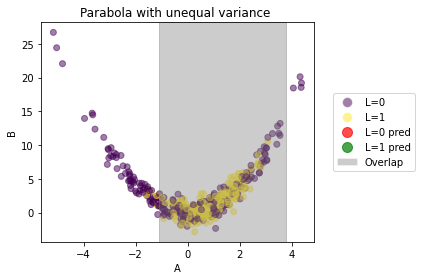

In [29]:
   
# b1=1 b2=2 a=1
mu_0=0
mu_1=1  ## a1*L + b1* epsilon1 + (1-L)*epsilon2 
var_0=4
var_1=1
a=0.5

print("Using the general formula true values")
#x_min,x1,x2=overlap_endpoints_quadratic(0.7026203985498004,mu_0,mu_1,var_0,var_1,a)
#x_min,x1,x2=overlap_endpoints_quadratic(0.8,mu_0,mu_1,var_0,var_1,a)
#print("x min, x1, x2",x_min, x1, x2)
x_max,x1,x2=overlap_endpoints_quadratic(0.2,mu_0,mu_1,var_0,var_1,a)
print("x max, x1, x2",x_max,x1,x2)   
#after observing the values, we will rewrite the x min and x max to get the band, note this is a specific case so change the code accordingly
# in the next two lines 
x_min= -1.1140370695529984
x_max=3.780703736219665
print(x_min,x_max)
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
scatter=plt.scatter(A,B,c=L,alpha=0.5)
plt.title("Parabola with unequal variance ")
plt.xlabel('A')
plt.ylabel('B')
#plt.axvspan(xmin=-1, xmax=3, alpha=0.4, color='gray',label='Overlap') 
plt.axvspan(xmin=x_min, xmax=x_max, alpha=0.4, color='gray',label='Overlap') 
cmap = scatter.cmap  # Get the colormap
norm = scatter.norm  # Get the normalization function
custom_legends = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(norm(0)), markersize=10, alpha=0.5, linestyle='', label='L=0'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(norm(1)), markersize=10, alpha=0.5, linestyle='', label='L=1'),
    Line2D([0], [0], marker='o', color='red', markersize=10, alpha=0.7, linestyle='', label='L=0 pred'),
    Line2D([0], [0], marker='o', color='green', markersize=10, alpha=0.7, linestyle='', label='L=1 pred'),
    Patch(facecolor='gray', edgecolor='w', alpha=0.4, label='Overlap')  
]
plt.legend(handles=custom_legends, loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)
plt.tight_layout()
plt.savefig("./results/journal/plots/fig4_example.png",bbox_inches='tight',dpi=1200)
plt.savefig('./results/journal/plots/fig4_example.svg', bbox_inches='tight',format='svg', dpi=1200)
plt.savefig('./results/journal/plots/fig4_example.pdf', bbox_inches='tight',format='pdf', dpi=1200)

0.7026203985498004
0.2973796014501996


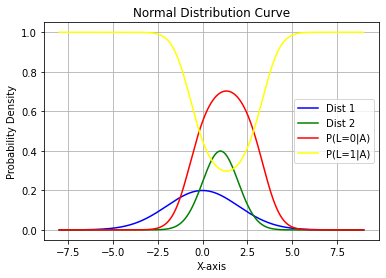

In [38]:
from scipy.stats import norm
mu_1 = 0       # Mean
sigma_1 = 2    # Standard deviation
mu_2 = 1       # Mean
sigma_2 = 1   # Standard deviation

# Generate x values
x = np.linspace(min(mu_1,mu_2) - 4*max(sigma_1,sigma_2), max(mu_1,mu_2) + 4*max(sigma_1,sigma_2), 2000)

# Compute PDF (Probability Density Function)
pdf_1 = norm.pdf(x, mu_1, sigma_1)
pdf_2 = norm.pdf(x,mu_2,sigma_2)
pdf_3=pdf_2/(pdf_1+pdf_2)
print(max(pdf_3))
pdf_4=1-pdf_3
print(min(pdf_4))
# Plot
plt.plot(x, pdf_1, label='Dist 1', color='blue')
plt.plot(x, pdf_2, label='Dist 2', color='green')
plt.plot(x, pdf_3, label='P(L=0|A)', color='red')
plt.plot(x, pdf_4, label='P(L=1|A)', color='yellow')
plt.xlabel('X-axis')
plt.ylabel('Probability Density')
plt.title('Normal Distribution Curve')
plt.legend()
plt.grid()
plt.show()

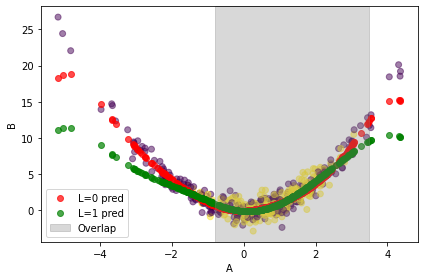

In [50]:
# Parabola 500: i=4 for example 
#plt.title("Plot of L=0 and L=1 predictions of NLCD on the data")
plt.scatter(A,B,c=L,alpha=0.5)
plt.xlabel('A')
plt.ylabel('B')
y_pred_original=compute_Luniqs_predns(L,A,B,'KRR')
plt.scatter(A,y_pred_original[0],label='L=0 pred',alpha=0.7,color='red')
plt.scatter(A,y_pred_original[1],label='L=1 pred',alpha=0.7,color='green')

plt.axvspan(xmin=-0.808081263000131, xmax= 3.4747479296667976, alpha=0.3, color='gray',label='Overlap') 
plt.legend()
plt.tight_layout()
plt.savefig("./results/journal/plots/fig4_example_L.png",bbox_inches='tight',dpi=1200)
plt.savefig('./results/journal/plots/fig4_example_L.svg', bbox_inches='tight',format='svg', dpi=1200)

In [ ]:
plt.title("Plot of L=0 and L=1 predictions of NLCD on the data")
plt.scatter(A,B,c=L,alpha=0.5)
plt.xlabel('A')
plt.ylabel('B')

plt.scatter(A,y_pred_original[0],label='L=0 pred',alpha=0.7,color='red')
plt.scatter(A,y_pred_original[1],label='L=1 pred',alpha=0.7,color='green')
plt.axvspan(xmin=-1, xmax=3, alpha=0.3, color='gray',label='Overlap') 
plt.legend()

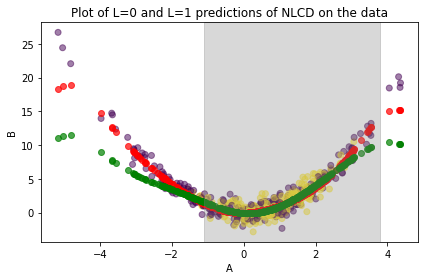

In [31]:
# Parabola 500: i=4 for example 

plt.title("Plot of L=0 and L=1 predictions of NLCD on the data")
scatter=plt.scatter(A,B,c=L,alpha=0.5)
plt.xlabel('A')
plt.ylabel('B')
y_pred_original=compute_Luniqs_predns(L,A,B,'KRR')
plt.scatter(A,y_pred_original[0],label='L=0 pred',alpha=0.7,color='red')
plt.scatter(A,y_pred_original[1],label='L=1 pred',alpha=0.7,color='green')

plt.axvspan(xmin=-1.1140370695529984, xmax=3.780703736219665, alpha=0.3, color='gray',label='Overlap') 
# Custom legend items
cmap = scatter.cmap  # Get the colormap
norm = scatter.norm  # Get the normalization function
#custom_legends = [
#    Line2D([0], [0], marker='o', color='red', markersize=10, alpha=0.7, linestyle='', label='L=0 pred'),
#    Line2D([0], [0], marker='o', color='green', markersize=10, alpha=0.7, linestyle='', label='L=1 pred'),
#    Patch(facecolor='gray', edgecolor='w', alpha=0.3, label='Overlap')  # Rectangle symbol
#]

# Add the legend outside the plot
#plt.legend(handles=custom_legends, loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)

# Show the plot
plt.tight_layout()
plt.savefig("./results/journal/plots/fig4_example_L.png",bbox_inches='tight',dpi=1200)
plt.savefig('./results/journal/plots/fig4_example_L.svg', bbox_inches='tight',format='svg', dpi=1200)
plt.savefig('./results/journal/plots/fig4_example_L.pdf', bbox_inches='tight',format='pdf', dpi=1200)

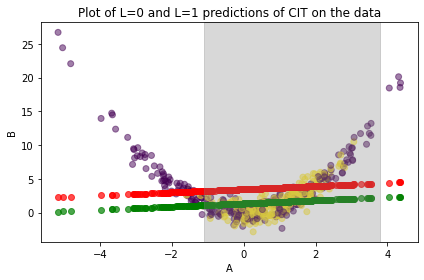

In [33]:
#CIT L example
B_values=pd.read_csv('B_columns_cit_para_example_L.csv')

plt.title("Plot of L=0 and L=1 predictions of CIT on the data")
scatter=plt.scatter(A,B,c=L,alpha=0.5)
plt.xlabel('A')
plt.ylabel('B')
#y_pred_original=compute_Luniqs_predns(L,A,B,'KRR')
plt.scatter(A,B_values.iloc[:,0],label='L=0 pred',alpha=0.7,color='red')
plt.scatter(A,B_values.iloc[:,1],label='L=1 pred',alpha=0.7,color='green')
plt.axvspan(xmin= -1.1140370695529984, xmax= 3.780703736219665, alpha=0.3, color='gray',label='Overlap') 
# Custom legend items
cmap = scatter.cmap  # Get the colormap
norm = scatter.norm  # Get the normalization function
#custom_legends = [

#    Patch(facecolor='gray', edgecolor='w', alpha=0.3, label='Overlap')  # Rectangle symbol
#]

# Add the legend outside the plot
#plt.legend(handles=custom_legends, loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)

# Show the plot
plt.tight_layout()
plt.savefig("./results/journal/plots/fig4_example_L_CIT.png",bbox_inches='tight',dpi=1200)
plt.savefig('./results/journal/plots/fig4_example_L_CIT.svg', bbox_inches='tight',format='svg', dpi=1200)
plt.savefig('./results/journal/plots/fig4_example_L_CIT.pdf', bbox_inches='tight',format='pdf', dpi=1200)


In [17]:
B_values

,B0,B1
0,3.268618,1.157906
1,3.563544,1.452832
2,3.511905,1.401192
3,3.664338,1.553626
4,3.455234,1.344522
...,...,...
495,3.903097,1.792384
496,3.223490,1.112777
497,3.484293,1.373580
498,3.443653,1.332940


In [16]:
B_values.iloc[:,0]

0      3.268618
1      3.563544
2      3.511905
3      3.664338
4      3.455234
         ...   
495    3.903097
496    3.223490
497    3.484293
498    3.443653
499    3.870333
Name: B0, Length: 500, dtype: float64

In [78]:
df=read_data('./gtex/muscle/human_muscle_deseq.txt')
dfconf=read_configuration('./gtex/muscle/human_muscle_deseq.txt')
i=3769
A=df[i][1]
B=df[i][2]
L=df[i][0]

In [79]:
dfconf[dfconf[1].str.contains(f'^.*ENSG00000125347', regex=True)]
#checking if 3769 is the right id 

,0,1,2
3758,chr5_132464413_G_T_b38,ENSG00000125347.13,ENSG00000231925.11
3759,chr5_132464413_G_T_b38,ENSG00000125347.13,ENSG00000123609.10
3760,chr5_132464413_G_T_b38,ENSG00000125347.13,ENSG00000178685.13
3761,chr5_132464413_G_T_b38,ENSG00000125347.13,ENSG00000164136.16
3762,chr5_132464413_G_T_b38,ENSG00000125347.13,ENSG00000133321.10
3763,chr5_132464413_G_T_b38,ENSG00000125347.13,ENSG00000136147.17
3764,chr5_132464413_G_T_b38,ENSG00000125347.13,ENSG00000169871.12
3765,chr5_132464413_G_T_b38,ENSG00000125347.13,ENSG00000123992.18
3766,chr5_132464413_G_T_b38,ENSG00000125347.13,ENSG00000164307.12
3767,chr5_132464413_G_T_b38,ENSG00000125347.13,ENSG00000060491.16


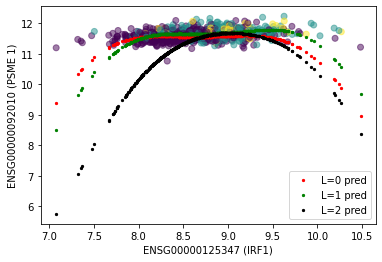

In [94]:
#plt.title("Plot of L=0 and L=1 predictions of NLCD on the data")
plt.scatter(A,B,c=L,alpha=0.5)
plt.xlabel('ENSG00000125347 (IRF1)')
plt.ylabel('ENSG00000092010 (PSME 1)')
y_pred_original=compute_Luniqs_predns(L,A,B,'KRR')
plt.scatter(A,y_pred_original[0],label='L=0 pred',color='red',s=5)
plt.scatter(A,y_pred_original[1],label='L=1 pred',color='green',s=5)
plt.scatter(A,y_pred_original[2],label='L=2 pred',color='black',s=5)
plt.legend()
plt.savefig("./results/journal/plots/human_irf.png",bbox_inches='tight',dpi=1200)
plt.savefig('./results/journal/plots/human_irf.svg', bbox_inches='tight',format='svg', dpi=1200)
plt.savefig('./results/journal/plots/human_irf.pdf', bbox_inches='tight',format='pdf', dpi=1200)

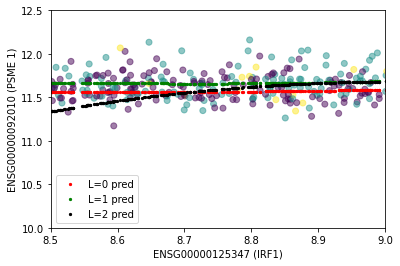

In [97]:
x_min=8.5
x_max=9
y_min=10
y_max=12.5
plt.scatter(A,B,c=L,alpha=0.5)
plt.xlabel('ENSG00000125347 (IRF1)')
plt.ylabel('ENSG00000092010 (PSME 1)')
y_pred_original=compute_Luniqs_predns(L,A,B,'KRR')
plt.scatter(A,y_pred_original[0],label='L=0 pred',color='red',s=5)
plt.scatter(A,y_pred_original[1],label='L=1 pred',color='green',s=5)
plt.scatter(A,y_pred_original[2],label='L=2 pred',color='black',s=5)
plt.legend()
plt.xlim(x_min, x_max)
plt.ylim(y_min,y_max)
plt.savefig("./results/journal/plots/human_irf_zoomed.png",bbox_inches='tight',dpi=1200)
plt.savefig('./results/journal/plots/human_irf_zoomed.svg', bbox_inches='tight',format='svg', dpi=1200)
plt.savefig('./results/journal/plots/human_irf_zoomed.pdf', bbox_inches='tight',format='pdf', dpi=1200)

In [8]:
## negative example, correlated but no causation
## IRF1 and PARP10 test3 value 0.034 but test4 0.2380
df=read_data('./gtex/muscle/human_muscle_deseq.txt')
dfconf=read_configuration('./gtex/muscle/human_muscle_deseq.txt')
i=3760
A=df[i][1]
B=df[i][2]
L=df[i][0]

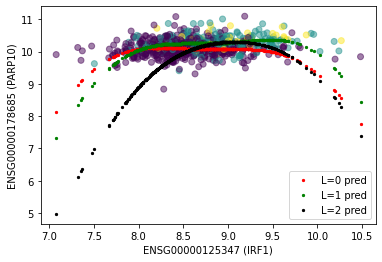

In [9]:

#plt.title("Plot of L=0 and L=1 predictions of NLCD on the data")
plt.scatter(A,B,c=L,alpha=0.5)
plt.xlabel('ENSG00000125347 (IRF1)')
plt.ylabel('ENSG00000178685 (PARP10)')
y_pred_original=compute_Luniqs_predns(L,A,B,'KRR')
plt.scatter(A,y_pred_original[0],label='L=0 pred',color='red',s=5)
plt.scatter(A,y_pred_original[1],label='L=1 pred',color='green',s=5)
plt.scatter(A,y_pred_original[2],label='L=2 pred',color='black',s=5)
plt.legend()
plt.savefig("./results/journal/plots/human_irf_neg.png",bbox_inches='tight',dpi=1200)
plt.savefig('./results/journal/plots/human_irf_neg.svg', bbox_inches='tight',format='svg', dpi=1200)
plt.savefig('./results/journal/plots/human_irf_neg.pdf', bbox_inches='tight',format='pdf', dpi=1200)

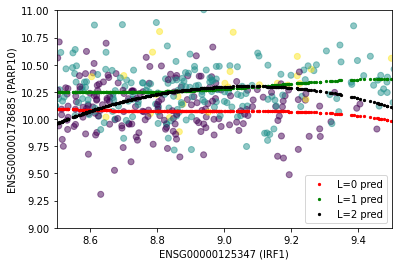

In [10]:
#negative example zoom
x_min=8.5
x_max=9.5
y_min=9
y_max=11
plt.scatter(A,B,c=L,alpha=0.5)
plt.xlabel('ENSG00000125347 (IRF1)')
plt.ylabel('ENSG00000178685 (PARP10)')
y_pred_original=compute_Luniqs_predns(L,A,B,'KRR')
plt.scatter(A,y_pred_original[0],label='L=0 pred',color='red',s=5)
plt.scatter(A,y_pred_original[1],label='L=1 pred',color='green',s=5)
plt.scatter(A,y_pred_original[2],label='L=2 pred',color='black',s=5)
plt.legend()
plt.xlim(x_min, x_max)
plt.ylim(y_min,y_max)
plt.savefig("./results/journal/plots/human_irf_neg_zoomed.png",bbox_inches='tight',dpi=1200)
plt.savefig('./results/journal/plots/human_irf_neg_zoomed.svg', bbox_inches='tight',format='svg', dpi=1200)
plt.savefig('./results/journal/plots/human_irf_neg_zoomed.pdf', bbox_inches='tight',format='pdf', dpi=1200)

In [ ]:
#Muscle AP4B1 and METTL5
df=read_data('./gtex/Whole_Blood/human_Whole_Blood_deseq.txt')
dfconf=read_configuration('./gtex/Whole_Blood/human_Whole_Blood_deseq.txt')
i=18
A=df[i][1]
B=df[i][2]
L=df[i][0]

In [ ]:
dfconf[dfconf[1].str.contains(f'^.*ENSG00000134262', regex=True)]
#checking if 18 is the right id 

In [ ]:
#plt.title("Plot of L=0 and L=1 predictions of NLCD on the data")
plt.scatter(A,B,c=L,alpha=0.5)
plt.xlabel('ENSG00000125347 (IRF1)')
plt.ylabel('ENSG00000092010 (PSME 1)')
y_pred_original=compute_Luniqs_predns(L,A,B,'KRR')
plt.scatter(A,y_pred_original[0],label='L=0 pred',alpha=0.5,color='red')
plt.scatter(A,y_pred_original[1],label='L=1 pred',alpha=0.5,color='green')
plt.scatter(A,y_pred_original[2],label='L=2 pred',alpha=0.5,color='black')
plt.legend()
#plt.savefig("./results/journal/plots/human_irf.png",bbox_inches='tight',dpi=1200)
#plt.savefig('./results/journal/plots/human_irf.svg', bbox_inches='tight',format='svg', dpi=1200)

In [ ]:
x_min=8.5
x_max=9
y_min=10
y_max=12.5
plt.scatter(A,B,c=L,alpha=0.5)
plt.xlabel('ENSG00000125347 (IRF1)')
plt.ylabel('ENSG00000092010 (PSME 1)')
y_pred_original=compute_Luniqs_predns(L,A,B,'KRR')
plt.scatter(A,y_pred_original[0],label='L=0 pred',alpha=0.5,color='red')
plt.scatter(A,y_pred_original[1],label='L=1 pred',alpha=0.5,color='green')
plt.scatter(A,y_pred_original[2],label='L=2 pred',alpha=0.5,color='black')
plt.legend()
plt.xlim(x_min, x_max)
plt.ylim(y_min,y_max)
#plt.savefig("./results/journal/plots/human_irf_zoomed.png",bbox_inches='tight',dpi=1200)
#plt.savefig('./results/journal/plots/human_irf_zoomed.svg', bbox_inches='tight',format='svg', dpi=1200)

In [ ]:
#independent data 
i=24
A=df[i][1]
B=df[i][2]
L=df[i][0]

In [ ]:
L

In [ ]:
#plt.title("Plot of L=0 and L=1 predictions of NLCD on the data")
plt.scatter(A,B,c=L,alpha=0.5)
plt.xlabel('ENSG00000125347 (IRF1)')
plt.ylabel('ENSG00000092010 (PSME 1)')
y_pred_original=compute_Luniqs_predns(L,A,B,'KRR')
plt.scatter(A,y_pred_original[0],label='L=0 pred',alpha=0.5,color='red')
plt.scatter(A,y_pred_original[1],label='L=1 pred',alpha=0.5,color='green')
plt.scatter(A,y_pred_original[2],label='L=2 pred',alpha=0.5,color='black')
plt.legend()
#plt.savefig("./results/journal/plots/human_irf.png",bbox_inches='tight',dpi=1200)
#plt.savefig('./results/journal/plots/human_irf.svg', bbox_inches='tight',format='svg', dpi=1200)

In [ ]:
x_min=8.5
x_max=9
y_min=10
y_max=12.5
plt.scatter(A,B,c=L,alpha=0.5)
plt.xlabel('ENSG00000125347 (IRF1)')
plt.ylabel('ENSG00000092010 (PSME 1)')
y_pred_original=compute_Luniqs_predns(L,A,B,'KRR')
plt.scatter(A,y_pred_original[0],label='L=0 pred',alpha=0.5,color='red')
plt.scatter(A,y_pred_original[1],label='L=1 pred',alpha=0.5,color='green')
plt.scatter(A,y_pred_original[2],label='L=2 pred',alpha=0.5,color='black')
plt.legend()
plt.xlim(x_min, x_max)
plt.ylim(y_min,y_max)
#plt.savefig("./results/journal/plots/human_irf_zoomed.png",bbox_inches='tight',dpi=1200)
#plt.savefig('./results/journal/plots/human_irf_zoomed.svg', bbox_inches='tight',format='svg', dpi=1200)

In [9]:
def yeastpr():
    ### yeast analysis ################
    #df=read_configuration("../../../findr/findrfiles/scripts/yeastgt_1_wilko1257_ready.txt")
    #possiblecausallist=np.where(~(df[1]==df[2]))[0].tolist()
    #df=read_configuration("../../../findr/findrfiles/scripts/yeastgt_0_wilko1257_ready.txt")
    #possibleindplist=np.where(~(df[1]==df[2]))[0].tolist()
    print("Permutations ", 500)
    precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall("./results/journal/yeast/wilko500/nlcd/yeast_causal.csv", "./results/journal/yeast/wilko500/nlcd/yeast_indp.csv")
    auc_score_nlmr_KRR = auc(recall_nlmr_KRR, precision_nlmr_KRR)
    print("NLCD avg precision ", round(calculate_avgprecision("./results/journal/yeast/wilko500/nlcd/yeast_causal.csv", "./results/journal/yeast/wilko500/nlcd/yeast_indp.csv"),3))
    print("NLCD AUPR ", round(auc_score_nlmr_KRR,3))

    precision_CIT, recall_CIT = calculate_precision_recall("./results/journal/yeast/wilko500/cit/yeast_causal_1234.csv", "./results/journal/yeast/wilko500/cit/yeast_indp_1234.csv")
    auc_score_CIT = auc(recall_CIT, precision_CIT)
    print("CIT avg precision", round(calculate_avgprecision("./results/journal/yeast/wilko500/cit/yeast_causal_1234.csv", "./results/journal/yeast/wilko500/cit/yeast_indp_1234.csv" ),3))
    print("CIT AUPR ", round(auc_score_CIT,3))
    fig, ax = plt.subplots()
    # Plot Precision-Recall curves using PrecisionRecallDisplay
    disp_nlmr_KRR = PrecisionRecallDisplay(precision=precision_nlmr_KRR, recall=recall_nlmr_KRR)
    disp_CIT = PrecisionRecallDisplay(precision=precision_CIT, recall=recall_CIT)

    disp_nlmr_KRR.plot(ax=ax,color=color_algo['KRR'], label='NLCD (KRR)')
    disp_CIT.plot(ax=ax,color=color_algo['CIT'], label='CIT (baseline)')

    ax.set_xlabel("Recall")
    ax.set_ylabel('Precision')
    ax.set_title("Yeast Precision-Recall Plot for permutations = 500")
    ax.legend(loc="upper right")
    randomclassifier=1234/(1234+1234)
    ax.axline((0, randomclassifier), (1, randomclassifier), linewidth=1, color='b',linestyle='--')
    plt.tight_layout()

    # Uncomment the lines below if you want to save the plot as an image file
    #plt.savefig("./results/journal/plots/figyeast_pr.png", bbox_inches='tight', dpi=1200)
    #plt.savefig('./results/journal/plots/figyeast_pr.svg', bbox_inches='tight', format='svg', dpi=1200)

    #plt.show()

Permutations  500
NLCD avg precision  0.546
NLCD AUPR  0.546
CIT avg precision 0.563
CIT AUPR  0.564


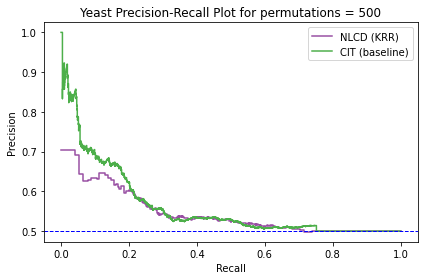

In [10]:
yeastpr()

In [ ]:
def yeastbarplot():
    # yeast calculate the avg precision score for all variance for each subset different varaince 
    ### yeast analysis ################
    cutoffs=[0,0.1,0.125,0.15,0.175,0.2,0.225,0.25]
    #df=read_configuration("../../../findr/findrfiles/scripts/yeastgt_1_wilko1257_ready.txt")
    #possiblecausallist=np.where(~(df[1]==df[2]))[0].tolist()
    #df=read_configuration("../../../findr/findrfiles/scripts/yeastgt_0_wilko1257_ready.txt")
    #possibleindplist=np.where(~(df[1]==df[2]))[0].tolist()
    nlcd_mean=[]
    cit_mean=[]
    nlcd_std=[]
    cit_std=[]
    for j in range(len(cutoffs)):
        nlcd_avgprecision=[]
        cit_avgprecision=[]
        nlcd_auc=[]
        cit_auc=[]
        varcausalyeast=pd.read_csv('../../../findr/findrfiles/scripts/var_indices/yeast_wilko_var_causal_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
        varindepyeast=pd.read_csv('../../../findr/findrfiles/scripts/var_indices/yeast_wilko_var_indep_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
        #varcausalyeast=list(set(varcausalyeast).intersection(set(possiblecausallist)))
        #varindepyeast=list(set(varindepyeast).intersection(set(possibleindplist)))
        for i in range(1,11):
            #print("Run ",i)
            avgprecision=calculate_avgprecision("./results/journal/yeast/wilko10runs/nlcd/yeast_causal"+str(i)+".csv", "./results/journal/yeast/wilko10runs/nlcd/yeast_indp"+str(i)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            nlcd_avgprecision.append(avgprecision)
            #print("NLCD avg precision ", avgprecision)
            avgprecision=calculate_avgprecision("./results/journal/yeast/wilko10runs/cit/yeast_causal_"+str(i)+".csv", "./results/journal/yeast/wilko10runs/cit/yeast_indp_"+str(i)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            #print("CIT avg precision",avgprecision)
            cit_avgprecision.append(avgprecision)
            precision_CIT, recall_CIT = calculate_precision_recall("./results/journal/yeast/wilko10runs/cit/yeast_causal_"+str(i)+".csv", "./results/journal/yeast/wilko10runs/cit/yeast_indp_"+str(i)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall("./results/journal/yeast/wilko10runs/nlcd/yeast_causal"+str(i)+".csv", "./results/journal/yeast/wilko10runs/nlcd/yeast_indp"+str(i)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            auc_score = auc(recall_nlmr_KRR, precision_nlmr_KRR)
            #print("NLCD AUPR ",auc_score)
            nlcd_auc.append(auc_score)
            auc_score = auc(recall_CIT, precision_CIT)
            #print("CIT AUPR ",auc_score)
            cit_auc.append(auc_score)

        nlcd_mean.append(np.mean(nlcd_avgprecision))
        cit_mean.append(np.mean(cit_avgprecision))
        nlcd_std.append(np.std(nlcd_avgprecision))
        cit_std.append(np.std(cit_avgprecision))

    nlcd_mean=np.round(nlcd_mean,3)
    cit_mean=np.round(cit_mean,3)


    species = cutoffs
    algo_means = {
        'CIT': cit_mean,
        'NLCD': nlcd_mean
    }

    x = np.arange(len(species))  # the label locations
    width = 0.4  # the width of the bars, change this if the numbers are overlapping 
    multiplier = 0

    fig, ax = plt.subplots(figsize=(10, 6))

    for attribute, measurement in algo_means.items():
        offset = width * multiplier
        if attribute=='CIT':
            rects = ax.bar(x + offset, measurement, width, yerr=cit_std,label=attribute,color='green',capsize=4)
        else:
            rects = ax.bar(x + offset, measurement, width, yerr=nlcd_std,label=attribute,color='purple',capsize=4)    
        ax.bar_label(rects, padding=5)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Average precision score')
    #ax.set_title(r'Average Precision Score across 10 runs with varying Extent of unequal variance ($\Delta\mathrm{var}$)')
    ax.set_xlabel(r'Extent of unequal variance ($\Delta\mathrm{var}$)')
    ax.set_xticks(x + width/2, [0,0.1,0.125,0.15,0.175,0.2,0.225,0.25])
    ax.legend(loc='upper left', ncol=2)
    ax.set_ylim(0.45, 0.65)
    print(np.round(np.mean(nlcd_std),4))
    print(np.round(np.mean(cit_std),4))
    fig.tight_layout()
    plt.savefig("./results/journal/plots/figyeast_bar_apr.png", bbox_inches='tight', dpi=1200)
    plt.savefig('./results/journal/plots/figyeast_bar_apr.svg', bbox_inches='tight', format='svg', dpi=1200)


In [ ]:
yeastbarplot()

In [7]:
def yeastbarplot_findr():
    # yeast calculate the avg precision score for all variance for each subset different varaince 
    ### yeast analysis ################
    cutoffs=[0,0.1,0.125,0.15,0.175,0.2,0.225,0.25]
    #df=read_configuration("../../../findr/findrfiles/scripts/yeastgt_1_wilko1257_ready.txt")
    #possiblecausallist=np.where(~(df[1]==df[2]))[0].tolist()
    #df=read_configuration("../../../findr/findrfiles/scripts/yeastgt_0_wilko1257_ready.txt")
    #possibleindplist=np.where(~(df[1]==df[2]))[0].tolist()
    nlcd_mean=[]
    cit_mean=[]
    findr_mean=[]
    nlcd_std=[]
    cit_std=[]
    findr_std=[]
    for j in range(len(cutoffs)):
        nlcd_avgprecision=[]
        cit_avgprecision=[]
        findr_avgprecision=[]
        nlcd_auc=[]
        cit_auc=[]
        findr_auc=[]
        varcausalyeast=pd.read_csv('../../../findr/findrfiles/scripts/var_indices/yeast_wilko_var_causal_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
        varindepyeast=pd.read_csv('../../../findr/findrfiles/scripts/var_indices/yeast_wilko_var_indep_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
        #varcausalyeast=list(set(varcausalyeast).intersection(set(possiblecausallist)))
        #varindepyeast=list(set(varindepyeast).intersection(set(possibleindplist)))
        for i in range(1,11):
            #print("Run ",i)
            avgprecision=calculate_avgprecision("./results/journal/yeast/wilko10runs/nlcd/yeast_causal"+str(i)+".csv", "./results/journal/yeast/wilko10runs/nlcd/yeast_indp"+str(i)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            nlcd_avgprecision.append(avgprecision)
            #print("NLCD avg precision ", avgprecision)
            avgprecision=calculate_avgprecision("./results/journal/yeast/wilko10runs/cit/yeast_causal_"+str(i)+".csv", "./results/journal/yeast/wilko10runs/cit/yeast_indp_"+str(i)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            #print("CIT avg precision",avgprecision)
            cit_avgprecision.append(avgprecision)
            avgprecision=calculate_avgprecision_findr("../../../findr/findrfiles/scripts/findr_yeast/yeast_1_1234_findr.csv","../../../findr/findrfiles/scripts/findr_yeast/yeast_0_1234_findr.csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            findr_avgprecision.append(avgprecision)
            precision_CIT, recall_CIT = calculate_precision_recall("./results/journal/yeast/wilko10runs/cit/yeast_causal_"+str(i)+".csv", "./results/journal/yeast/wilko10runs/cit/yeast_indp_"+str(i)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall("./results/journal/yeast/wilko10runs/nlcd/yeast_causal"+str(i)+".csv", "./results/journal/yeast/wilko10runs/nlcd/yeast_indp"+str(i)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            precision_findr,recall_findr=calculate_precision_recall_findr("../../../findr/findrfiles/scripts/findr_yeast/yeast_1_1234_findr.csv","../../../findr/findrfiles/scripts/findr_yeast/yeast_0_1234_findr.csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            auc_score = auc(recall_nlmr_KRR, precision_nlmr_KRR)
            #print("NLCD AUPR ",auc_score)
            nlcd_auc.append(auc_score)
            auc_score = auc(recall_CIT, precision_CIT)
            #print("CIT AUPR ",auc_score)
            cit_auc.append(auc_score)
            auc_score=auc(recall_findr,precision_findr)
            findr_auc.append(auc_score)

        nlcd_mean.append(np.mean(nlcd_avgprecision))
        cit_mean.append(np.mean(cit_avgprecision))
        findr_mean.append(np.mean(findr_avgprecision))
        nlcd_std.append(np.std(nlcd_avgprecision))
        cit_std.append(np.std(cit_avgprecision))
        findr_std.append(np.std(findr_avgprecision))

    nlcd_mean=np.round(nlcd_mean,3)
    cit_mean=np.round(cit_mean,3)
    findr_mean=np.round(findr_mean,3)

    species = cutoffs
    algo_means = {
        'CIT': cit_mean,
        'NLCD': nlcd_mean,
        'Findr':findr_mean
    }

    x = np.arange(len(species))  # the label locations
    width = 0.2  # the width of the bars, change this if the numbers are overlapping 
    multiplier = 0

    fig, ax = plt.subplots(figsize=(10, 6))

    for attribute, measurement in algo_means.items():
        offset = width * multiplier
        if attribute=='CIT':
            rects = ax.bar(x + offset, measurement, width, yerr=cit_std,label=attribute,color='green',capsize=4)
        elif attribute=='NLCD':
            rects = ax.bar(x + offset, measurement, width, yerr=nlcd_std,label=attribute,color='purple',capsize=4)    
        else:
            rects = ax.bar(x + offset, measurement, width, yerr=findr_std,label=attribute,color='orange',capsize=4)    

        ax.bar_label(rects, padding=5)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Average precision score')
    #ax.set_title(r'Average Precision Score across 10 runs with varying Extent of unequal variance ($\Delta\mathrm{var}$)')
    ax.set_xlabel(r'Extent of unequal variance ($\Delta\mathrm{var}$)')
    ax.set_xticks(x + width/2, [0,0.1,0.125,0.15,0.175,0.2,0.225,0.25])
    ax.legend(loc='upper left', ncol=2)
    ax.set_ylim(0.45, 0.65)
    print(np.round(np.mean(nlcd_std),4))
    print(np.round(np.mean(cit_std),4))
    print(np.round(np.mean(findr_std),4))
    fig.tight_layout()
    #plt.savefig("./results/journal/plots/figyeast_bar_apr_findr.png", bbox_inches='tight', dpi=1200)
    #plt.savefig('./results/journal/plots/figyeast_bar_apr_findr.svg', bbox_inches='tight', format='svg', dpi=1200)


0.0022
0.0006
0.0


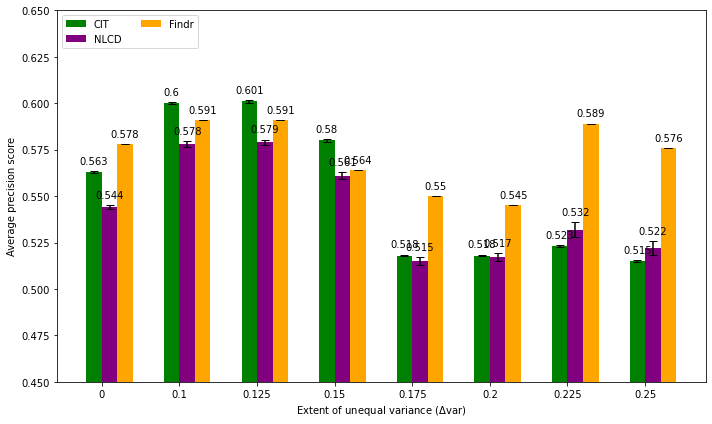

In [8]:
yeastbarplot_findr()

In [19]:
def yeastbarplot_all_methods():
    # yeast calculate the avg precision score for all variance for each subset different varaince 
    ### yeast analysis ################
    cutoffs=[0,0.1,0.125,0.15,0.175,0.2,0.225,0.25]
    #df=read_configuration("../../../findr/findrfiles/scripts/yeastgt_1_wilko1257_ready.txt")
    #possiblecausallist=np.where(~(df[1]==df[2]))[0].tolist()
    #df=read_configuration("../../../findr/findrfiles/scripts/yeastgt_0_wilko1257_ready.txt")
    #possibleindplist=np.where(~(df[1]==df[2]))[0].tolist()
    nlcd_mean=[]
    cit_mean=[]
    findr_mean=[]
    mrpc_mean=[]
    nlcd_std=[]
    cit_std=[]
    findr_std=[]
    mrpc_std=[]
    for j in range(len(cutoffs)):
        nlcd_avgprecision=[]
        cit_avgprecision=[]
        findr_avgprecision=[]
        mrpc_avgprecision=[]
        nlcd_auc=[]
        mrpc_auc=[]
        cit_auc=[]
        findr_auc=[]
        varcausalyeast=pd.read_csv('../../../findr/findrfiles/scripts/var_indices/yeast_wilko_var_causal_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
        varindepyeast=pd.read_csv('../../../findr/findrfiles/scripts/var_indices/yeast_wilko_var_indep_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
        #varcausalyeast=list(set(varcausalyeast).intersection(set(possiblecausallist)))
        #varindepyeast=list(set(varindepyeast).intersection(set(possibleindplist)))
        for i in range(1,11):
            #print("Run ",i)
            avgprecision=calculate_avgprecision("./results/journal/yeast/wilko10runs/nlcd/yeast_causal"+str(i)+".csv", "./results/journal/yeast/wilko10runs/nlcd/yeast_indp"+str(i)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            nlcd_avgprecision.append(avgprecision)
            #print("NLCD avg precision ", avgprecision)
            avgprecision=calculate_avgprecision("./results/journal/yeast/wilko10runs/cit/yeast_causal_"+str(i)+".csv", "./results/journal/yeast/wilko10runs/cit/yeast_indp_"+str(i)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            #print("CIT avg precision",avgprecision)
            cit_avgprecision.append(avgprecision)
            avgprecision=calculate_avgprecision_findr("../../../findr/findrfiles/scripts/findr_yeast/yeast_1_1234_findr.csv","../../../findr/findrfiles/scripts/findr_yeast/yeast_0_1234_findr.csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            findr_avgprecision.append(avgprecision)
            avgprecision=calculate_avgprecision_MRPC("./results/journal/simulation/MRPC/yeast_results/yeast_indv/1_trios_mrpc.csv","./results/journal/simulation/MRPC/yeast_results/yeast_indv/0_trios_mrpc.csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            mrpc_avgprecision.append(avgprecision)

            precision_CIT, recall_CIT = calculate_precision_recall("./results/journal/yeast/wilko10runs/cit/yeast_causal_"+str(i)+".csv", "./results/journal/yeast/wilko10runs/cit/yeast_indp_"+str(i)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall("./results/journal/yeast/wilko10runs/nlcd/yeast_causal"+str(i)+".csv", "./results/journal/yeast/wilko10runs/nlcd/yeast_indp"+str(i)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            precision_findr,recall_findr=calculate_precision_recall_findr("../../../findr/findrfiles/scripts/findr_yeast/yeast_1_1234_findr.csv","../../../findr/findrfiles/scripts/findr_yeast/yeast_0_1234_findr.csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            precision_mrpc,recall_mrpc=calculate_precision_recall_MRPC("./results/journal/simulation/MRPC/yeast_results/yeast_indv/1_trios_mrpc.csv","./results/journal/simulation/MRPC/yeast_results/yeast_indv/0_trios_mrpc.csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            auc_score = auc(recall_nlmr_KRR, precision_nlmr_KRR)
            #print("NLCD AUPR ",auc_score)
            nlcd_auc.append(auc_score)
            auc_score = auc(recall_CIT, precision_CIT)
            #print("CIT AUPR ",auc_score)
            cit_auc.append(auc_score)
            auc_score=auc(recall_findr,precision_findr)
            findr_auc.append(auc_score)
            auc_score=auc(recall_mrpc,precision_mrpc)
            mrpc_auc.append(auc_score)

        nlcd_mean.append(np.mean(nlcd_avgprecision))
        cit_mean.append(np.mean(cit_avgprecision))
        findr_mean.append(np.mean(findr_avgprecision))
        mrpc_mean.append(np.mean(mrpc_avgprecision))
        nlcd_std.append(np.std(nlcd_avgprecision))
        cit_std.append(np.std(cit_avgprecision))
        findr_std.append(np.std(findr_avgprecision))
        mrpc_std.append(np.std(mrpc_avgprecision))


    nlcd_mean=np.round(nlcd_mean,3)
    cit_mean=np.round(cit_mean,3)
    findr_mean=np.round(findr_mean,3)
    mrpc_mean=np.round(mrpc_mean,3)

    species = cutoffs
    algo_means = {
        'CIT': cit_mean,
        'NLCD': nlcd_mean,
        'Findr':findr_mean,
        'MRPC':mrpc_mean
    }

    x = np.arange(len(species))  # the label locations
    width = 0.2  # the width of the bars, change this if the numbers are overlapping 
    multiplier = 0

    fig, ax = plt.subplots(figsize=(10, 6))

    for attribute, measurement in algo_means.items():
        offset = width * multiplier
        if attribute=='CIT':
            rects = ax.bar(x + offset, measurement, width, yerr=cit_std,label=attribute,color='green',capsize=4)
        elif attribute=='NLCD':
            rects = ax.bar(x + offset, measurement, width, yerr=nlcd_std,label=attribute,color='purple',capsize=4)    
        elif attribute=='Findr':
            rects = ax.bar(x + offset, measurement, width, yerr=findr_std,label=attribute,color='orange',capsize=4)    
        else:
            rects = ax.bar(x + offset, measurement, width, yerr=mrpc_std,label=attribute,color='yellow',capsize=4)  

        ax.bar_label(rects, padding=5)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Average precision score')
    #ax.set_title(r'Average Precision Score across 10 runs with varying Extent of unequal variance ($\Delta\mathrm{var}$)')
    ax.set_xlabel(r'Extent of unequal variance ($\Delta\mathrm{var}$)')
    ax.set_xticks(x + width/2, [0,0.1,0.125,0.15,0.175,0.2,0.225,0.25])
    ax.legend(loc='upper left', ncol=2)
    ax.set_ylim(0.45, 0.65)
    print(np.round(np.mean(nlcd_std),4))
    print(np.round(np.mean(cit_std),4))
    print(np.round(np.mean(findr_std),4))
    print(np.round(np.mean(mrpc_std),4))
    fig.tight_layout()
    #plt.savefig("./results/journal/plots/figyeast_bar_apr_findr.png", bbox_inches='tight', dpi=1200)
    #plt.savefig('./results/journal/plots/figyeast_bar_apr_findr.svg', bbox_inches='tight', format='svg', dpi=1200)


0.0022
0.0006
0.0
0.0


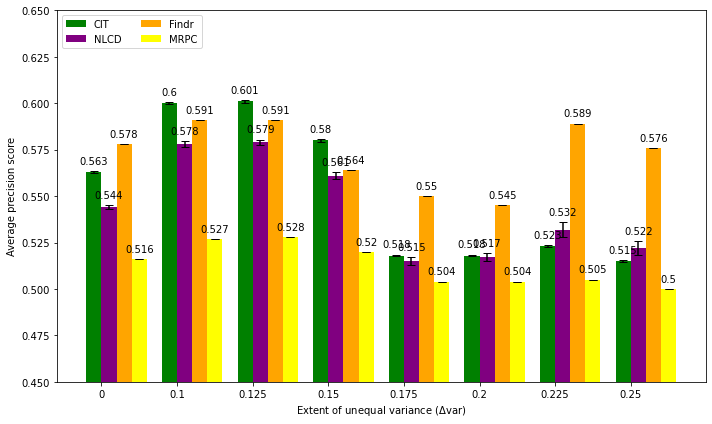

In [20]:
yeastbarplot_all_methods()

In [25]:
def yeastbarplot_all_methods_unequal_nonlinear(bcmi_cutoff,seed=1):
    # yeast calculate the avg precision score for all variance for each subset different varaince 
    ### yeast analysis ################
    #cutoffs=[0,0.1,0.125,0.15,0.175,0.2,0.225,0.25]
    cutoffs=[0,0.1,0.15,0.2,0.25]
    #df=read_configuration("../../../findr/findrfiles/scripts/yeastgt_1_wilko1257_ready.txt")
    #possiblecausallist=np.where(~(df[1]==df[2]))[0].tolist()
    #df=read_configuration("../../../findr/findrfiles/scripts/yeastgt_0_wilko1257_ready.txt")
    #possibleindplist=np.where(~(df[1]==df[2]))[0].tolist()
    nlcd_mean=[]
    cit_mean=[]
    findr_mean=[]
    mrpc_mean=[]
    nlcd_std=[]
    cit_std=[]
    findr_std=[]
    mrpc_std=[]
    random_classifier=[]
    causal_number=[]
    indep_number=[]
    for j in range(len(cutoffs)):
        nlcd_avgprecision=[]
        cit_avgprecision=[]
        findr_avgprecision=[]
        mrpc_avgprecision=[]
        nlcd_auc=[]
        mrpc_auc=[]
        cit_auc=[]
        findr_auc=[]
        varcausalyeast=pd.read_csv("../../../findr/findrfiles/scripts/varandnonlinear_indices/seed"+str(seed) + "/yeast_causal_var" + str(cutoffs[j]) + "both" + str(bcmi_cutoff) + "_0.csv",header=None)[0].to_list()
        varindepyeast=pd.read_csv("../../../findr/findrfiles/scripts/varandnonlinear_indices/seed"+str(seed) + "/yeast_indep_var" + str(cutoffs[j]) + "both" + str(bcmi_cutoff) + "_0.csv",header=None)[0].to_list()
        other_values=pd.read_csv("../../../findr/findrfiles/scripts/varandnonlinear_indices/seed"+str(seed) + "/yeast_other_var" + str(cutoffs[j]) + "both" + str(bcmi_cutoff) + "_0.csv",header=None)[0].to_list()
        #varcausalyeast=pd.read_csv('../../../findr/findrfiles/scripts/var_indices/yeast_wilko_var_causal_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
        #varindepyeast=pd.read_csv('../../../findr/findrfiles/scripts/var_indices/yeast_wilko_var_indep_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
        #varcausalyeast=list(set(varcausalyeast).intersection(set(possiblecausallist)))
        #varindepyeast=list(set(varindepyeast).intersection(set(possibleindplist)))
        for i in range(1,11):
            #print("Run ",i)
            avgprecision=calculate_avgprecision("./results/journal/yeast/wilko10runs/nlcd/yeast_causal"+str(i)+".csv", "./results/journal/yeast/wilko10runs/nlcd/yeast_indp"+str(i)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            nlcd_avgprecision.append(avgprecision)
            #print("NLCD avg precision ", avgprecision)
            avgprecision=calculate_avgprecision("./results/journal/yeast/wilko10runs/cit/yeast_causal_"+str(i)+".csv", "./results/journal/yeast/wilko10runs/cit/yeast_indp_"+str(i)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            #print("CIT avg precision",avgprecision)
            cit_avgprecision.append(avgprecision)
            avgprecision=calculate_avgprecision_findr("../../../findr/findrfiles/scripts/findr_yeast/yeast_1_1234_findr.csv","../../../findr/findrfiles/scripts/findr_yeast/yeast_0_1234_findr.csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            findr_avgprecision.append(avgprecision)
            avgprecision=calculate_avgprecision_MRPC("./results/journal/simulation/MRPC/yeast_results/yeast_indv/1_trios_mrpc.csv","./results/journal/simulation/MRPC/yeast_results/yeast_indv/0_trios_mrpc.csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            mrpc_avgprecision.append(avgprecision)

            precision_CIT, recall_CIT = calculate_precision_recall("./results/journal/yeast/wilko10runs/cit/yeast_causal_"+str(i)+".csv", "./results/journal/yeast/wilko10runs/cit/yeast_indp_"+str(i)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall("./results/journal/yeast/wilko10runs/nlcd/yeast_causal"+str(i)+".csv", "./results/journal/yeast/wilko10runs/nlcd/yeast_indp"+str(i)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            precision_findr,recall_findr=calculate_precision_recall_findr("../../../findr/findrfiles/scripts/findr_yeast/yeast_1_1234_findr.csv","../../../findr/findrfiles/scripts/findr_yeast/yeast_0_1234_findr.csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            precision_mrpc,recall_mrpc=calculate_precision_recall_MRPC("./results/journal/simulation/MRPC/yeast_results/yeast_indv/1_trios_mrpc.csv","./results/journal/simulation/MRPC/yeast_results/yeast_indv/0_trios_mrpc.csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            auc_score = auc(recall_nlmr_KRR, precision_nlmr_KRR)
            #print("NLCD AUPR ",auc_score)
            nlcd_auc.append(auc_score)
            auc_score = auc(recall_CIT, precision_CIT)
            #print("CIT AUPR ",auc_score)
            cit_auc.append(auc_score)
            auc_score=auc(recall_findr,precision_findr)
            findr_auc.append(auc_score)
            #auc_score=auc(recall_mrpc,precision_mrpc)
            #mrpc_auc.append(auc_score)

        nlcd_mean.append(np.mean(nlcd_avgprecision))
        cit_mean.append(np.mean(cit_avgprecision))
        findr_mean.append(np.mean(findr_avgprecision))
        mrpc_mean.append(np.mean(mrpc_avgprecision))
        nlcd_std.append(np.std(nlcd_avgprecision))
        cit_std.append(np.std(cit_avgprecision))
        findr_std.append(np.std(findr_avgprecision))
        mrpc_std.append(np.std(mrpc_avgprecision))
        random_classifier.append(other_values[2])
        causal_number.append(other_values[0])
        indep_number.append(other_values[1])

    nlcd_mean=np.round(nlcd_mean,2)
    cit_mean=np.round(cit_mean,2)
    findr_mean=np.round(findr_mean,2)
    mrpc_mean=np.round(mrpc_mean,2)
    random_classifier=np.round(random_classifier,2)
    print(random_classifier)
    print(causal_number)
    print(indep_number)
    species = cutoffs
    algo_means = {
        'CIT': cit_mean,
        'NLCD': nlcd_mean,
        'Findr':findr_mean,
        'MRPC':mrpc_mean,
        'random':random_classifier
    }

    x = np.arange(len(species))  # the label locations
    width = 0.15  # the width of the bars, change this if the numbers are overlapping 
    multiplier = 0

    fig, ax = plt.subplots(figsize=(10, 6))

    for attribute, measurement in algo_means.items():
        offset = width * multiplier
        if attribute=='CIT':
            rects = ax.bar(x + offset, measurement, width, yerr=cit_std,label=attribute,color='green',capsize=4)
        elif attribute=='NLCD':
            rects = ax.bar(x + offset, measurement, width, yerr=nlcd_std,label=attribute,color='purple',capsize=4)    
        elif attribute=='Findr':
            rects = ax.bar(x + offset, measurement, width, yerr=findr_std,label=attribute,color='orange',capsize=4)    
        elif attribute=='MRPC':
            rects = ax.bar(x + offset, measurement, width, yerr=mrpc_std,label=attribute,color='yellow',capsize=4)  
        else:
            rects = ax.bar(x + offset, measurement, width,label=attribute,color='black',capsize=4)  

        ax.bar_label(rects, padding=5)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('AUPRC')
    #ax.set_title(r'Average Precision Score across 10 runs with varying Extent of unequal variance ($\Delta\mathrm{var}$)')
    ax.set_xlabel(r'Extent of unequal variance ($\Delta\mathrm{var}$)')
    #ax.set_xticks(x + width/2, [0,0.1,0.125,0.15,0.175,0.2,0.225,0.25])
    #ticks=[0,0.1,0.125,0.15,0.175,0.2,0.225,0.25]
    ticks=[0,0.1,0.15,0.2,0.25]
    #xtick_labels = [f"{var1}\nCausal trios {var2}Independent trios\n{var3}" for var1, var2, var3 in zip(ticks, causal_number,indep_number)]
    xtick_labels = [f"Cutoffs: {var1}\nCausal trios: {int(var2)}\nIndependent trios: {int(var3)}" 
                if index == 1 else f"{var1}\n{int(var2)}\n{int(var3)}" 
                for index, (var1, var2, var3) in enumerate(zip(ticks, causal_number, indep_number), 1)]
    ax.set_xticks(x + width/2, labels=xtick_labels)
    ax.legend(loc='upper left', ncol=2)
    ax.set_ylim(0, 1)
    print(np.round(np.mean(nlcd_std),4))
    print(np.round(np.mean(cit_std),4))
    print(np.round(np.mean(findr_std),4))
    print(np.round(np.mean(mrpc_std),4))
    print(random_classifier)
    fig.tight_layout()
    #plt.savefig("./results/journal/plots/figyeast_bar_apr_allmethod_unequalwcutoff_seed" + str(seed)+".png", bbox_inches='tight', dpi=1200)
    #plt.savefig("./results/journal/plots/figyeast_bar_apr_allmethod_unequalwcutoff_seed"+str(seed)+".svg", bbox_inches='tight', format='svg', dpi=1200)
    #plt.savefig("./results/journal/plots/figyeast_bar_apr_allmethod_unequalwcutoff_seed"+str(seed)+".pdf", bbox_inches='tight', format='pdf', dpi=1200)


[0.5  0.38 0.41 0.26 0.29]
[216.0, 63.0, 60.0, 10.0, 10.0]
[216.0, 103.0, 85.0, 28.0, 24.0]
0.0118
0.0017
0.0
0.0
[0.5  0.38 0.41 0.26 0.29]


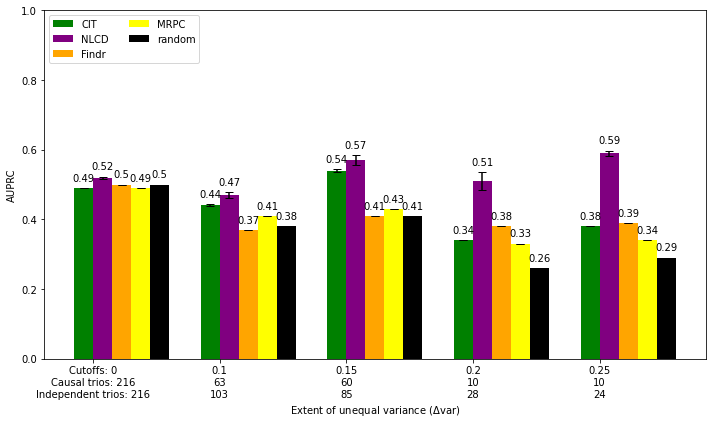

In [26]:
yeastbarplot_all_methods_unequal_nonlinear(bcmi_cutoff=0.1,seed=7)

In [17]:
import random
# Set the seed
random.seed(42)

# Generate a random number between 1 and 10
random_number = random.randint(1, 10)
print(random_number)

2


[0.5  0.4  0.41 0.24 0.3 ]
[216.0, 63.0, 60.0, 10.0, 10.0]
[216.0, 96.0, 87.0, 31.0, 23.0]
0.0107
0.0014
0.0
0.0
[0.5  0.4  0.41 0.24 0.3 ]


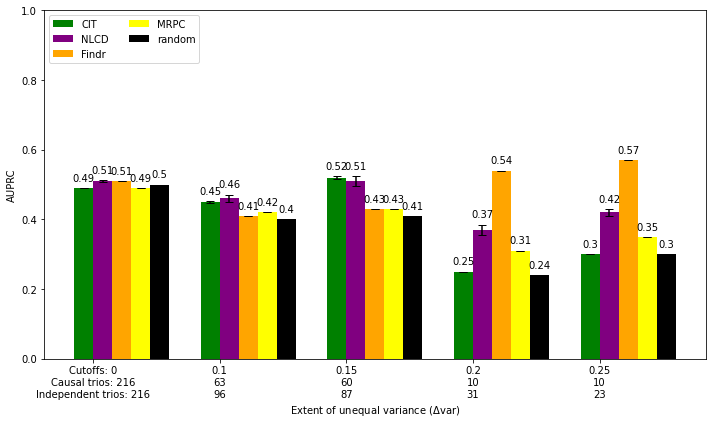

In [13]:
yeastbarplot_all_methods_unequal_nonlinear(bcmi_cutoff=0.1,seed=2)

0.0114
0.0013
0.0
0.0


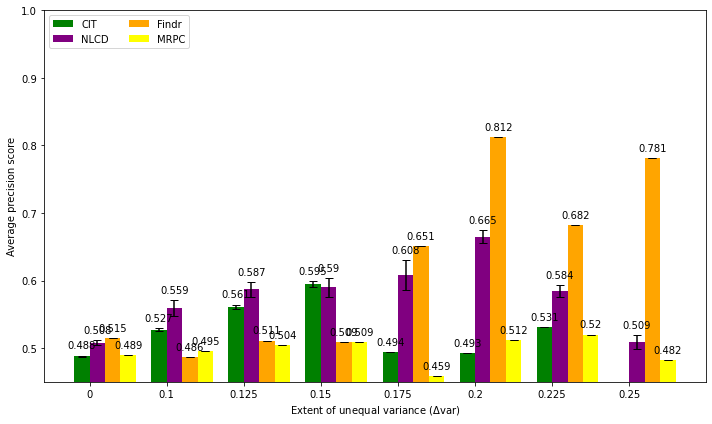

In [20]:
yeastbarplot_all_methods_unequal_nonlinear(bcmi_cutoff=0.1,seed=2)

0.011
0.0011
0.0
0.0


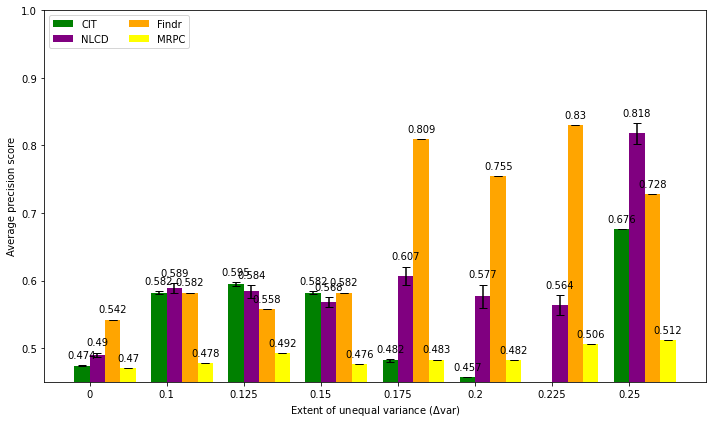

In [21]:
yeastbarplot_all_methods_unequal_nonlinear(bcmi_cutoff=0.1,seed=3)

0.0097
0.0005
0.0
0.0


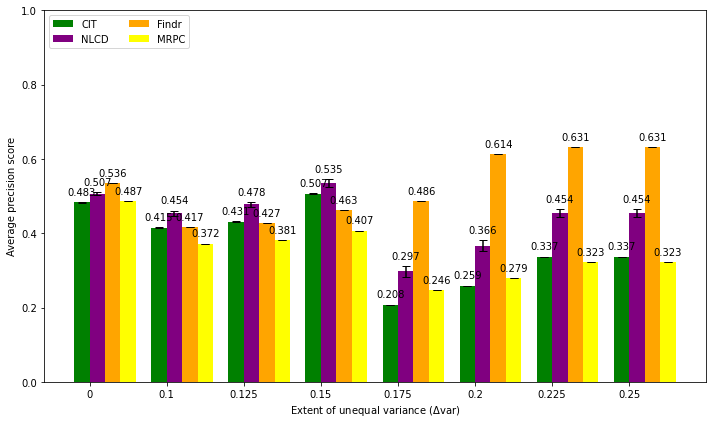

In [24]:
yeastbarplot_all_methods_unequal_nonlinear(bcmi_cutoff=0.1,seed=4)

0.0082
0.0015
0.0
0.0


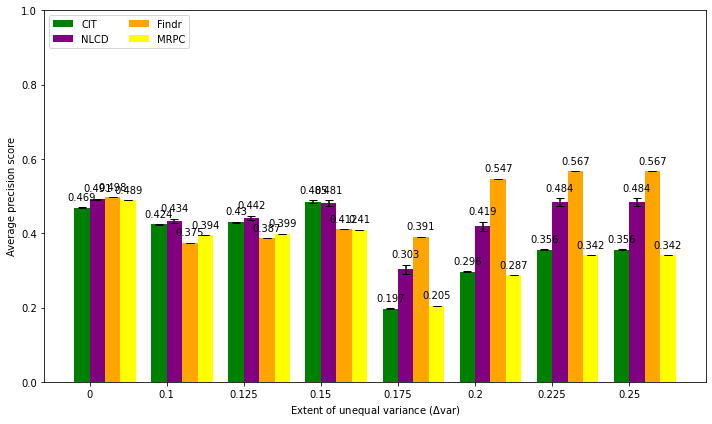

In [25]:
yeastbarplot_all_methods_unequal_nonlinear(bcmi_cutoff=0.1,seed=5)

In [13]:
def yeastpr_findr_unequal(cutoff):
    # yeast calculate the avg precision score for all variance for each subset different varaince 
    ### yeast analysis ################
    cutoffs=[cutoff]
    #df=read_configuration("../../../findr/findrfiles/scripts/yeastgt_1_wilko1257_ready.txt")
    #possiblecausallist=np.where(~(df[1]==df[2]))[0].tolist()
    #df=read_configuration("../../../findr/findrfiles/scripts/yeastgt_0_wilko1257_ready.txt")
    #possibleindplist=np.where(~(df[1]==df[2]))[0].tolist()
    nlcd_mean=[]
    cit_mean=[]
    findr_mean=[]
    nlcd_std=[]
    cit_std=[]
    findr_std=[]
    for j in range(len(cutoffs)):
        nlcd_avgprecision=[]
        cit_avgprecision=[]
        findr_avgprecision=[]
        nlcd_auc=[]
        cit_auc=[]
        findr_auc=[]
        varcausalyeast=pd.read_csv('../../../findr/findrfiles/scripts/var_indices/yeast_wilko_var_causal_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
        print(len(varcausalyeast))
        varindepyeast=pd.read_csv('../../../findr/findrfiles/scripts/var_indices/yeast_wilko_var_indep_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
        #varcausalyeast=list(set(varcausalyeast).intersection(set(possiblecausallist)))
        #varindepyeast=list(set(varindepyeast).intersection(set(possibleindplist)))
        for i in range(1,2):
            #print("Run ",i)
            avgprecision=calculate_avgprecision("./results/journal/yeast/wilko10runs/nlcd/yeast_causal"+str(i)+".csv", "./results/journal/yeast/wilko10runs/nlcd/yeast_indp"+str(i)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            nlcd_avgprecision.append(avgprecision)
            #print("NLCD avg precision ", avgprecision)
            avgprecision=calculate_avgprecision("./results/journal/yeast/wilko10runs/cit/yeast_causal_"+str(i)+".csv", "./results/journal/yeast/wilko10runs/cit/yeast_indp_"+str(i)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            #print("CIT avg precision",avgprecision)
            cit_avgprecision.append(avgprecision)
            avgprecision=calculate_avgprecision_findr("../../../findr/findrfiles/scripts/findr_yeast/yeast_1_1234_findr.csv","../../../findr/findrfiles/scripts/findr_yeast/yeast_0_1234_findr.csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            findr_avgprecision.append(avgprecision)
            precision_CIT, recall_CIT = calculate_precision_recall("./results/journal/yeast/wilko10runs/cit/yeast_causal_"+str(i)+".csv", "./results/journal/yeast/wilko10runs/cit/yeast_indp_"+str(i)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall("./results/journal/yeast/wilko10runs/nlcd/yeast_causal"+str(i)+".csv", "./results/journal/yeast/wilko10runs/nlcd/yeast_indp"+str(i)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            precision_findr,recall_findr=calculate_precision_recall_findr("../../../findr/findrfiles/scripts/findr_yeast/yeast_1_1234_findr.csv","../../../findr/findrfiles/scripts/findr_yeast/yeast_0_1234_findr.csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            auc_score = auc(recall_nlmr_KRR, precision_nlmr_KRR)
            #print("NLCD AUPR ",auc_score)
            nlcd_auc.append(auc_score)
            auc_score = auc(recall_CIT, precision_CIT)
            #print("CIT AUPR ",auc_score)
            cit_auc.append(auc_score)
            auc_score=auc(recall_findr,precision_findr)
            findr_auc.append(auc_score)
            print(cit_auc,findr_auc,nlcd_auc)

            fig, ax = plt.subplots()
            # Plot Precision-Recall curves using PrecisionRecallDisplay
            disp_nlmr_KRR = PrecisionRecallDisplay(precision=precision_nlmr_KRR, recall=recall_nlmr_KRR)
            disp_CIT = PrecisionRecallDisplay(precision=precision_CIT, recall=recall_CIT)
            disp_findr = PrecisionRecallDisplay(precision=precision_findr, recall=recall_findr)

            disp_nlmr_KRR.plot(ax=ax,color=color_algo['KRR'], label='NLCD (KRR)')
            disp_CIT.plot(ax=ax,color=color_algo['CIT'], label='CIT (baseline)')
            disp_findr.plot(ax=ax,color=color_algo['findr'], label='findr')

            ax.set_xlabel("Recall")
            ax.set_ylabel('Precision')
            ax.set_title("Yeast Precision-Recall Plot for extend of unequal variance 0.25 for a particular run")
            ax.legend(loc="upper right")
            randomclassifier=1234/(1234+1234)
            ax.axline((0, randomclassifier), (1, randomclassifier), linewidth=1, color='b',linestyle='--')
            plt.tight_layout()

            #plt.savefig("./results/journal/plots/figyeast_pr_findr_allthree.png", bbox_inches='tight', dpi=1200)



  

113
[0.5114996438743722] [0.5686477981273903] [0.5248134148042507]


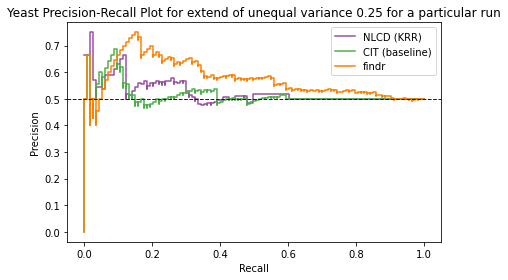

In [14]:
yeastpr_findr_unequal(0.25)

In [8]:
def yeastpr_allmethods_unequal(cutoff):
    # yeast calculate the avg precision score for all variance for each subset different varaince 
    ### yeast analysis ################
    cutoffs=[cutoff]
    #df=read_configuration("../../../findr/findrfiles/scripts/yeastgt_1_wilko1257_ready.txt")
    #possiblecausallist=np.where(~(df[1]==df[2]))[0].tolist()
    #df=read_configuration("../../../findr/findrfiles/scripts/yeastgt_0_wilko1257_ready.txt")
    #possibleindplist=np.where(~(df[1]==df[2]))[0].tolist()
    nlcd_mean=[]
    cit_mean=[]
    findr_mean=[]
    mrpc_mean=[]
    nlcd_std=[]
    cit_std=[]
    findr_std=[]
    mrpc_std=[]

    for j in range(len(cutoffs)):
        nlcd_avgprecision=[]
        cit_avgprecision=[]
        findr_avgprecision=[]
        mrpc_avgprecision=[]
        nlcd_auc=[]
        cit_auc=[]
        findr_auc=[]
        mrpc_auc=[]
        varcausalyeast=pd.read_csv('../../../findr/findrfiles/scripts/var_indices/yeast_wilko_var_causal_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
        print(len(varcausalyeast))
        varindepyeast=pd.read_csv('../../../findr/findrfiles/scripts/var_indices/yeast_wilko_var_indep_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
        #varcausalyeast=list(set(varcausalyeast).intersection(set(possiblecausallist)))
        #varindepyeast=list(set(varindepyeast).intersection(set(possibleindplist)))
        for i in range(1,2):
            #print("Run ",i)
            avgprecision=calculate_avgprecision("./results/journal/yeast/wilko10runs/nlcd/yeast_causal"+str(i)+".csv", "./results/journal/yeast/wilko10runs/nlcd/yeast_indp"+str(i)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            nlcd_avgprecision.append(avgprecision)
            #print("NLCD avg precision ", avgprecision)
            avgprecision=calculate_avgprecision("./results/journal/yeast/wilko10runs/cit/yeast_causal_"+str(i)+".csv", "./results/journal/yeast/wilko10runs/cit/yeast_indp_"+str(i)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            #print("CIT avg precision",avgprecision)
            cit_avgprecision.append(avgprecision)
            avgprecision=calculate_avgprecision_findr("../../../findr/findrfiles/scripts/findr_yeast/yeast_1_1234_findr.csv","../../../findr/findrfiles/scripts/findr_yeast/yeast_0_1234_findr.csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            findr_avgprecision.append(avgprecision)
            avgprecision=calculate_avgprecision_MRPC("./results/journal/simulation/MRPC/yeast_results/yeast_indv/1_trios_mrpc.csv","./results/journal/simulation/MRPC/yeast_results/yeast_indv/0_trios_mrpc.csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            mrpc_avgprecision.append(avgprecision)
            
            precision_CIT, recall_CIT = calculate_precision_recall("./results/journal/yeast/wilko10runs/cit/yeast_causal_"+str(i)+".csv", "./results/journal/yeast/wilko10runs/cit/yeast_indp_"+str(i)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall("./results/journal/yeast/wilko10runs/nlcd/yeast_causal"+str(i)+".csv", "./results/journal/yeast/wilko10runs/nlcd/yeast_indp"+str(i)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            precision_findr,recall_findr=calculate_precision_recall_findr("../../../findr/findrfiles/scripts/findr_yeast/yeast_1_1234_findr.csv","../../../findr/findrfiles/scripts/findr_yeast/yeast_0_1234_findr.csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            precision_mrpc,recall_mrpc=calculate_precision_recall_MRPC("./results/journal/simulation/MRPC/yeast_results/yeast_indv/1_trios_mrpc.csv","./results/journal/simulation/MRPC/yeast_results/yeast_indv/0_trios_mrpc.csv",causal_id=varcausalyeast,indep_id=varindepyeast)

            auc_score = auc(recall_nlmr_KRR, precision_nlmr_KRR)
            #print("NLCD AUPR ",auc_score)
            nlcd_auc.append(auc_score)
            auc_score = auc(recall_CIT, precision_CIT)
            #print("CIT AUPR ",auc_score)
            cit_auc.append(auc_score)
            auc_score=auc(recall_findr,precision_findr)
            findr_auc.append(auc_score)
            auc_score=auc(recall_mrpc,precision_mrpc)
            mrpc_auc.append(auc_score)
            print(cit_auc,findr_auc,nlcd_auc,mrpc_auc)

            fig, ax = plt.subplots()
            # Plot Precision-Recall curves using PrecisionRecallDisplay
            disp_nlmr_KRR = PrecisionRecallDisplay(precision=precision_nlmr_KRR, recall=recall_nlmr_KRR)
            disp_CIT = PrecisionRecallDisplay(precision=precision_CIT, recall=recall_CIT)
            disp_findr = PrecisionRecallDisplay(precision=precision_findr, recall=recall_findr)
            disp_mrpc=PrecisionRecallDisplay(precision=precision_mrpc,recall=recall_mrpc)

            disp_nlmr_KRR.plot(ax=ax,color=color_algo['KRR'], label='NLCD (KRR)')
            disp_CIT.plot(ax=ax,color=color_algo['CIT'], label='CIT (baseline)')
            disp_findr.plot(ax=ax,color=color_algo['findr'], label='findr')
            disp_mrpc.plot(ax=ax,color=color_algo['mrpc'],label='MRPC')

            ax.set_xlabel("Recall")
            ax.set_ylabel('Precision')
            ax.set_title("Yeast Precision-Recall Plot for extend of unequal variance 0.25 for a particular run")
            ax.legend(loc="upper right")
            randomclassifier=1234/(1234+1234)
            ax.axline((0, randomclassifier), (1, randomclassifier), linewidth=1, color='b',linestyle='--')
            plt.tight_layout()

            #plt.savefig("./results/journal/plots/figyeast_pr_findr_allthree.png", bbox_inches='tight', dpi=1200)



  

113
[0.5114996438743722] [0.5686477981273903] [0.5248134148042507] [0.49924332159048157]


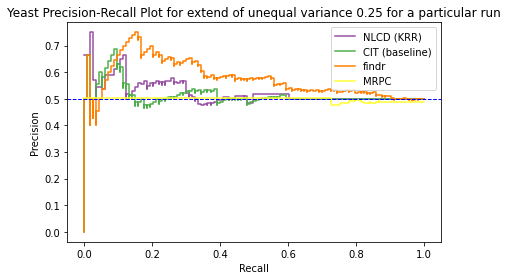

In [9]:
yeastpr_allmethods_unequal(0.25)

In [10]:
def yeastpr_allmethod_nonlinear(cutoff,p,l,seed):
    # yeast calculate the avg precision score for all variance for each subset different varaince 
    ### yeast analysis ################
    cutoffs=[cutoff]
   
    #df=read_configuration("../../../findr/findrfiles/scripts/yeastgt_1_wilko1257_ready.txt")
    #possiblecausallist=np.where(~(df[1]==df[2]))[0].tolist()
    #df=read_configuration("../../../findr/findrfiles/scripts/yeastgt_0_wilko1257_ready.txt")
    #possibleindplist=np.where(~(df[1]==df[2]))[0].tolist()
    #p= ['both','bcmi', 'spear']
    #cutoffs = [0, 0.05, 0.1]

    #l_values = [0.05, 0.1, 0.15]
    nlcd_mean=[]
    cit_mean=[]
    findr_mean=[]
    mrpc_mean=[]
    nlcd_std=[]
    cit_std=[]
    findr_std=[]
    mrpc_std=[]
    for j in range(len(cutoffs)):
        nlcd_avgprecision=[]
        cit_avgprecision=[]
        findr_avgprecision=[]
        mrpc_avgprecision=[]
        nlcd_auc=[]
        cit_auc=[]
        findr_auc=[]
        mrpc_auc=[]
        #varcausalyeast=pd.read_csv('../../../findr/findrfiles/scripts/var_indices/yeast_wilko_var_causal_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
        
        #varindepyeast=pd.read_csv('../../../findr/findrfiles/scripts/var_indices/yeast_wilko_var_indep_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
        varcausalyeast=pd.read_csv('../../../findr/findrfiles/scripts/mpmi_indices/seed'+str(seed)+'/yeast_wilko_mi_causal_'+p+str(l)+'_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
        print(len(varcausalyeast))
        varindepyeast=pd.read_csv('../../../findr/findrfiles/scripts/mpmi_indices/seed'+str(seed)+'/yeast_wilko_mi_indep_'+p+str(l)+'_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
        #varcausalyeast=list(set(varcausalyeast).intersection(set(possiblecausallist)))
        #varindepyeast=list(set(varindepyeast).intersection(set(possibleindplist)))
        for i in range(1,2):
            #print("Run ",i)
            avgprecision=calculate_avgprecision("./results/journal/yeast/wilko10runs/nlcd/yeast_causal"+str(i)+".csv", "./results/journal/yeast/wilko10runs/nlcd/yeast_indp"+str(i)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            nlcd_avgprecision.append(avgprecision)
            #print("NLCD avg precision ", avgprecision)
            avgprecision=calculate_avgprecision("./results/journal/yeast/wilko10runs/cit/yeast_causal_"+str(i)+".csv", "./results/journal/yeast/wilko10runs/cit/yeast_indp_"+str(i)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            #print("CIT avg precision",avgprecision)
            cit_avgprecision.append(avgprecision)
            avgprecision=calculate_avgprecision_findr("../../../findr/findrfiles/scripts/findr_yeast/yeast_1_1234_findr.csv","../../../findr/findrfiles/scripts/findr_yeast/yeast_0_1234_findr.csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            findr_avgprecision.append(avgprecision)
            avgprecision=calculate_avgprecision_MRPC("./results/journal/simulation/MRPC/yeast_results/yeast_indv/1_trios_mrpc.csv","./results/journal/simulation/MRPC/yeast_results/yeast_indv/0_trios_mrpc.csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            mrpc_avgprecision.append(avgprecision)
            
            precision_CIT, recall_CIT = calculate_precision_recall("./results/journal/yeast/wilko10runs/cit/yeast_causal_"+str(i)+".csv", "./results/journal/yeast/wilko10runs/cit/yeast_indp_"+str(i)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall("./results/journal/yeast/wilko10runs/nlcd/yeast_causal"+str(i)+".csv", "./results/journal/yeast/wilko10runs/nlcd/yeast_indp"+str(i)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            precision_findr,recall_findr=calculate_precision_recall_findr("../../../findr/findrfiles/scripts/findr_yeast/yeast_1_1234_findr.csv","../../../findr/findrfiles/scripts/findr_yeast/yeast_0_1234_findr.csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            precision_mrpc,recall_mrpc=calculate_precision_recall_MRPC("./results/journal/simulation/MRPC/yeast_results/yeast_indv/1_trios_mrpc.csv","./results/journal/simulation/MRPC/yeast_results/yeast_indv/0_trios_mrpc.csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            
            auc_score = auc(recall_nlmr_KRR, precision_nlmr_KRR)
            #print("NLCD AUPR ",auc_score)
            nlcd_auc.append(auc_score)
            auc_score = auc(recall_CIT, precision_CIT)
            #print("CIT AUPR ",auc_score)
            cit_auc.append(auc_score)
            auc_score=auc(recall_findr,precision_findr)
            findr_auc.append(auc_score)
            auc_score=auc(recall_mrpc,precision_mrpc)
            mrpc_auc.append(auc_score)
            print(cit_auc,findr_auc,nlcd_auc,mrpc_auc)

            fig, ax = plt.subplots()
            # Plot Precision-Recall curves using PrecisionRecallDisplay
            disp_nlmr_KRR = PrecisionRecallDisplay(precision=precision_nlmr_KRR, recall=recall_nlmr_KRR)
            disp_CIT = PrecisionRecallDisplay(precision=precision_CIT, recall=recall_CIT)
            disp_findr = PrecisionRecallDisplay(precision=precision_findr, recall=recall_findr)
            disp_mrpc=PrecisionRecallDisplay(precision=precision_mrpc,recall=recall_mrpc)

            disp_nlmr_KRR.plot(ax=ax,color=color_algo['KRR'], label='NLCD (KRR)')
            disp_CIT.plot(ax=ax,color=color_algo['CIT'], label='CIT (baseline)')
            disp_findr.plot(ax=ax,color=color_algo['findr'], label='findr')
            disp_mrpc.plot(ax=ax,color=color_algo['mrpc'],label='MRPC')

            ax.set_xlabel("Recall")
            ax.set_ylabel('Precision')
            ax.set_title("Yeast Precision-Recall Plot for extend of nonlinear for a particular run")
            ax.legend(loc="upper right")
            randomclassifier=1234/(1234+1234)
            ax.axline((0, randomclassifier), (1, randomclassifier), linewidth=1, color='b',linestyle='--')
            plt.tight_layout()

            #plt.savefig("./results/journal/plots/figyeast_pr_findr_allthree.png", bbox_inches='tight', dpi=1200)



  

70
[0.43195233087788354] [0.5164284838150783] [0.48695647546544935] [0.446093990496576]


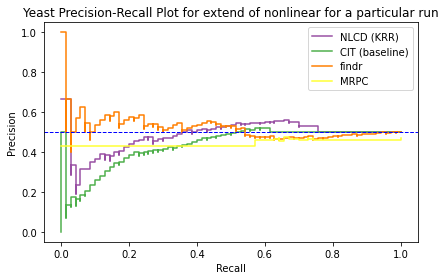

In [26]:
yeastpr_allmethod_nonlinear(0.1,'bcmi',0.05,4)

In [12]:
def yeastpr_all_method():
    # yeast calculate the avg precision score for all variance for each subset different varaince 
    ### yeast analysis ################
    #df=read_configuration("../../../findr/findrfiles/scripts/yeastgt_1_wilko1257_ready.txt")
    #possiblecausallist=np.where(~(df[1]==df[2]))[0].tolist()
    #df=read_configuration("../../../findr/findrfiles/scripts/yeastgt_0_wilko1257_ready.txt")
    #possibleindplist=np.where(~(df[1]==df[2]))[0].tolist()
    nlcd_avgprecision=[]
    cit_avgprecision=[]
    findr_avgprecision=[]
    mrpc_avgprecision=[]
    nlcd_auc=[]
    cit_auc=[]
    findr_auc=[]
    mrpc_auc=[]

    #varcausalyeast=pd.read_csv('../../../findr/findrfiles/scripts/var_indices/yeast_wilko_var_causal_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
    #print(len(varcausalyeast))
    #varindepyeast=pd.read_csv('../../../findr/findrfiles/scripts/var_indices/yeast_wilko_var_indep_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
    #varcausalyeast=list(set(varcausalyeast).intersection(set(possiblecausallist)))
    #varindepyeast=list(set(varindepyeast).intersection(set(possibleindplist)))
        #print("Run ",i)
    avgprecision=calculate_avgprecision("./results/journal/yeast/wilko500/nlcd/yeast_causal.csv","./results/journal/yeast/wilko500/nlcd/yeast_indp.csv")
    nlcd_avgprecision.append(avgprecision)
    #print("NLCD avg precision ", avgprecision)
    avgprecision=calculate_avgprecision("./results/journal/yeast/wilko500/cit/yeast_causal_1234.csv","./results/journal/yeast/wilko500/cit/yeast_indp_1234.csv")
    #print("CIT avg precision",avgprecision)
    cit_avgprecision.append(avgprecision)
    avgprecision=calculate_avgprecision_findr("../../../findr/findrfiles/scripts/findr_yeast/yeast_1_1234_findr.csv","../../../findr/findrfiles/scripts/findr_yeast/yeast_0_1234_findr.csv")
    findr_avgprecision.append(avgprecision)
    ## yet to implement mrpc average precision function 
    #avgprecision=calculate_avgprecision_mrpc()
    #mrpc_avgprecision.append(avgprecision)


    precision_CIT, recall_CIT = calculate_precision_recall("./results/journal/yeast/wilko100/cit/yeast_causal_1234.csv","./results/journal/yeast/wilko100/cit/yeast_indp_1234.csv")
    precision_CIT,recall_CIT=davis_goadrich_interpolation(precision_CIT,recall_CIT,positive=1234)
    precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall("./results/journal/yeast/wilko500/nlcd/yeast_causal.csv","./results/journal/yeast/wilko500/nlcd/yeast_indp.csv")
    precision_nlmr_KRR,recall_nlmr_KRR=davis_goadrich_interpolation(precision_nlmr_KRR,recall_nlmr_KRR,positive=1234)
    precision_findr,recall_findr=calculate_precision_recall_findr("../../../findr/findrfiles/scripts/findr_yeast/yeast_1_1234_findr.csv","../../../findr/findrfiles/scripts/findr_yeast/yeast_0_1234_findr.csv")
    precision_findr,recall_findr=davis_goadrich_interpolation(precision_findr,recall_findr,positive=1234)
    precision_mrpc,recall_mrpc=calculate_precision_recall_MRPC('./results/journal/simulation/MRPC/yeast_results/yeast_indv/1_trios_mrpc.csv','./results/journal/simulation/MRPC/yeast_results/yeast_indv/0_trios_mrpc.csv')
    precision_mrpc,recall_mrpc=davis_goadrich_interpolation(precision_mrpc,recall_mrpc,positive=1234)
    #auc_score = auc(recall_nlmr_KRR, precision_nlmr_KRR)
    #print("NLCD AUPR ",auc_score)
    #nlcd_auc.append(auc_score)
    #auc_score = auc(recall_CIT, precision_CIT)
    #print("CIT AUPR ",auc_score)
    #cit_auc.append(auc_score)
    #auc_score=auc(recall_findr,precision_findr)
    #findr_auc.append(auc_score)
    #auc_score=auc(recall_mrpc,precision_mrpc)
    #mrpc_auc.append(auc_score)
    #print("CIT, findr,nlcd,mrpc ",cit_auc,findr_auc,nlcd_auc,mrpc_auc)

    fig, ax = plt.subplots()
    # Plot Precision-Recall curves using PrecisionRecallDisplay
    disp_nlmr_KRR = PrecisionRecallDisplay(precision=precision_nlmr_KRR, recall=recall_nlmr_KRR)
    disp_CIT = PrecisionRecallDisplay(precision=precision_CIT, recall=recall_CIT)
    disp_findr = PrecisionRecallDisplay(precision=precision_findr, recall=recall_findr)
    disp_mrpc = PrecisionRecallDisplay(precision=precision_mrpc, recall=recall_mrpc)

    disp_nlmr_KRR.plot(ax=ax,color=color_algo['KRR'], label='NLCD (KRR)')
    disp_CIT.plot(ax=ax,color=color_algo['CIT'], label='CIT (baseline)')
    disp_findr.plot(ax=ax,color=color_algo['findr'], label='findr')
    disp_mrpc.plot(ax=ax,color=color_algo['mrpc'], label='mrpc')

    ax.set_xlabel("Recall")
    ax.set_ylabel('Precision')
    #ax.set_title("Yeast Precision-Recall Plot for all the methods")
    ax.legend(loc="upper right")
    ax.set_ylim((0,1))
    randomclassifier=1234/(1234+1234)
    ax.axline((0, randomclassifier), (1, randomclassifier), linewidth=1, color='b',linestyle='--')
    plt.tight_layout()

    plt.savefig("./results/journal/plots/yeast_allmethods.png", bbox_inches='tight', dpi=1200)
    plt.savefig("./results/journal/plots/yeast_allmethods.jpg", bbox_inches='tight', dpi=1200)
    plt.savefig("./results/journal/plots/yeast_allmethods.svg", bbox_inches='tight', dpi=1200)



  

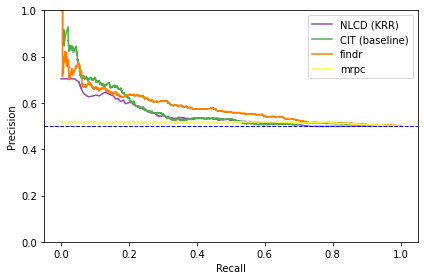

In [13]:
yeastpr_all_method()

In [12]:
def yeastpr_findr_nonlinear(cutoff,p,l,seed):
    # yeast calculate the avg precision score for all variance for each subset different varaince 
    ### yeast analysis ################
    cutoffs=[cutoff]
   
    #df=read_configuration("../../../findr/findrfiles/scripts/yeastgt_1_wilko1257_ready.txt")
    #possiblecausallist=np.where(~(df[1]==df[2]))[0].tolist()
    #df=read_configuration("../../../findr/findrfiles/scripts/yeastgt_0_wilko1257_ready.txt")
    #possibleindplist=np.where(~(df[1]==df[2]))[0].tolist()
    #p= ['both','bcmi', 'spear']
    #cutoffs = [0, 0.05, 0.1]

    #l_values = [0.05, 0.1, 0.15]
    nlcd_mean=[]
    cit_mean=[]
    findr_mean=[]
    nlcd_std=[]
    cit_std=[]
    findr_std=[]
    for j in range(len(cutoffs)):
        nlcd_avgprecision=[]
        cit_avgprecision=[]
        findr_avgprecision=[]
        nlcd_auc=[]
        cit_auc=[]
        findr_auc=[]
        #varcausalyeast=pd.read_csv('../../../findr/findrfiles/scripts/var_indices/yeast_wilko_var_causal_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
        
        #varindepyeast=pd.read_csv('../../../findr/findrfiles/scripts/var_indices/yeast_wilko_var_indep_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
        varcausalyeast=pd.read_csv('../../../findr/findrfiles/scripts/mpmi_indices/seed'+str(seed)+'/yeast_wilko_mi_causal_'+p+str(l)+'_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
        print(len(varcausalyeast))
        varindepyeast=pd.read_csv('../../../findr/findrfiles/scripts/mpmi_indices/seed'+str(seed)+'/yeast_wilko_mi_indep_'+p+str(l)+'_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
        #varcausalyeast=list(set(varcausalyeast).intersection(set(possiblecausallist)))
        #varindepyeast=list(set(varindepyeast).intersection(set(possibleindplist)))
        for i in range(1,2):
            #print("Run ",i)
            avgprecision=calculate_avgprecision("./results/journal/yeast/wilko10runs/nlcd/yeast_causal"+str(i)+".csv", "./results/journal/yeast/wilko10runs/nlcd/yeast_indp"+str(i)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            nlcd_avgprecision.append(avgprecision)
            #print("NLCD avg precision ", avgprecision)
            avgprecision=calculate_avgprecision("./results/journal/yeast/wilko10runs/cit/yeast_causal_"+str(i)+".csv", "./results/journal/yeast/wilko10runs/cit/yeast_indp_"+str(i)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            #print("CIT avg precision",avgprecision)
            cit_avgprecision.append(avgprecision)
            avgprecision=calculate_avgprecision_findr("../../../findr/findrfiles/scripts/findr_yeast/yeast_1_1234_findr.csv","../../../findr/findrfiles/scripts/findr_yeast/yeast_0_1234_findr.csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            findr_avgprecision.append(avgprecision)
            precision_CIT, recall_CIT = calculate_precision_recall("./results/journal/yeast/wilko10runs/cit/yeast_causal_"+str(i)+".csv", "./results/journal/yeast/wilko10runs/cit/yeast_indp_"+str(i)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall("./results/journal/yeast/wilko10runs/nlcd/yeast_causal"+str(i)+".csv", "./results/journal/yeast/wilko10runs/nlcd/yeast_indp"+str(i)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            precision_findr,recall_findr=calculate_precision_recall_findr("../../../findr/findrfiles/scripts/findr_yeast/yeast_1_1234_findr.csv","../../../findr/findrfiles/scripts/findr_yeast/yeast_0_1234_findr.csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            auc_score = auc(recall_nlmr_KRR, precision_nlmr_KRR)
            #print("NLCD AUPR ",auc_score)
            nlcd_auc.append(auc_score)
            auc_score = auc(recall_CIT, precision_CIT)
            #print("CIT AUPR ",auc_score)
            cit_auc.append(auc_score)
            auc_score=auc(recall_findr,precision_findr)
            findr_auc.append(auc_score)
            print(cit_auc,findr_auc,nlcd_auc)

            fig, ax = plt.subplots()
            # Plot Precision-Recall curves using PrecisionRecallDisplay
            disp_nlmr_KRR = PrecisionRecallDisplay(precision=precision_nlmr_KRR, recall=recall_nlmr_KRR)
            disp_CIT = PrecisionRecallDisplay(precision=precision_CIT, recall=recall_CIT)
            disp_findr = PrecisionRecallDisplay(precision=precision_findr, recall=recall_findr)

            disp_nlmr_KRR.plot(ax=ax,color=color_algo['KRR'], label='NLCD (KRR)')
            disp_CIT.plot(ax=ax,color=color_algo['CIT'], label='CIT (baseline)')
            disp_findr.plot(ax=ax,color=color_algo['findr'], label='findr')

            ax.set_xlabel("Recall")
            ax.set_ylabel('Precision')
            ax.set_title("Yeast Precision-Recall Plot for extend of nonlinear for a particular run")
            ax.legend(loc="upper right")
            randomclassifier=1234/(1234+1234)
            ax.axline((0, randomclassifier), (1, randomclassifier), linewidth=1, color='b',linestyle='--')
            plt.tight_layout()

            #plt.savefig("./results/journal/plots/figyeast_pr_findr_allthree.png", bbox_inches='tight', dpi=1200)



  

119
[0.421023362748421] [0.49856277425085044] [0.4500779625724722]


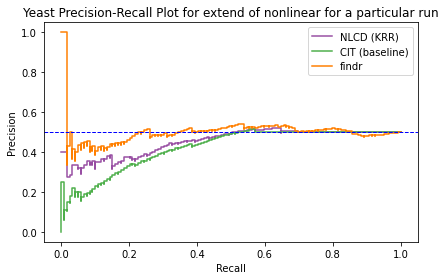

In [24]:
yeastpr_findr_nonlinear(0.05,'both',0.1,1)

35
[0.4094272879926888] [0.44706038116703517] [0.4336085733113094]


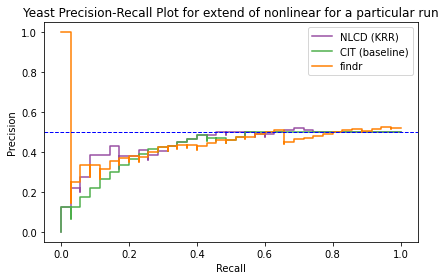

In [26]:
yeastpr_findr_nonlinear(0.05,'spear',0.1,1)

553
[0.5807874717117083] [0.5623650577866767] [0.5589145664455721]


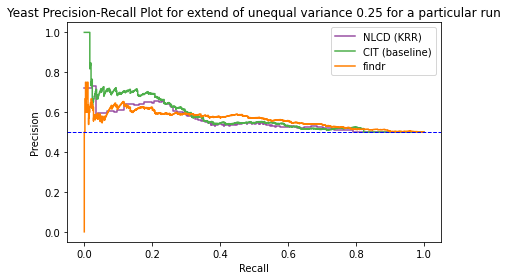

In [13]:
yeastpr_findr_unequal(0.15)
                 

113
[0.5114996438743722] [0.5686477981273903] [0.5248134148042507]


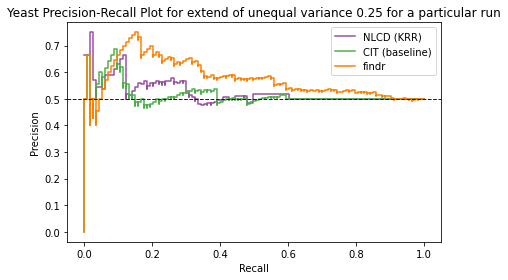

In [14]:
yeastpr_findr_unequal(0.25)

1234
[0.5644117442537311] [0.5779813062225021] [0.5439791331629493]


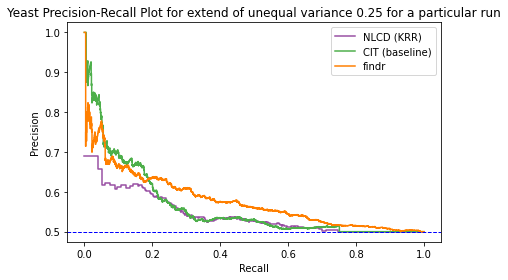

In [15]:
yeastpr_findr_unequal(0)

673
[0.6018523382735157] [0.5899758620339223] [0.5796529220800481]


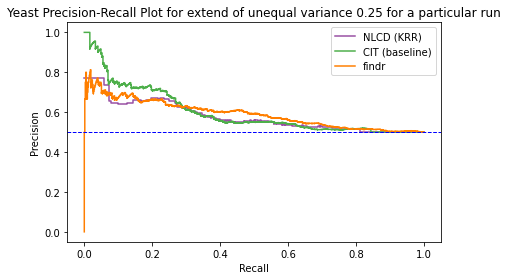

In [17]:
yeastpr_findr_unequal(0.125)

In [ ]:
def yeastbarplotauc():
    # yeast calculate the avg precision score for all variance for each subset different varaince 
    ### yeast analysis ################
    cutoffs=[0,0.1,0.125,0.15,0.175,0.2,0.225,0.25]
    #df=read_configuration("../../../findr/findrfiles/scripts/yeastgt_1_wilko1257_ready.txt")
    #possiblecausallist=np.where(~(df[1]==df[2]))[0].tolist()
    #df=read_configuration("../../../findr/findrfiles/scripts/yeastgt_0_wilko1257_ready.txt")
    #possibleindplist=np.where(~(df[1]==df[2]))[0].tolist()
    nlcd_mean=[]
    cit_mean=[]
    nlcd_std=[]
    cit_std=[]
    for j in range(len(cutoffs)):
        nlcd_avgprecision=[]
        cit_avgprecision=[]
        nlcd_auc=[]
        cit_auc=[]
        varcausalyeast=pd.read_csv('../../../findr/findrfiles/scripts/var_indices/yeast_wilko_var_causal_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
        varindepyeast=pd.read_csv('../../../findr/findrfiles/scripts/var_indices/yeast_wilko_var_indep_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
        #varcausalyeast=list(set(varcausalyeast).intersection(set(possiblecausallist)))
        #varindepyeast=list(set(varindepyeast).intersection(set(possibleindplist)))
        for i in range(1,11):
            #print("Run ",i)
            avgprecision=calculate_avgprecision("./results/journal/yeast/wilko10runs/nlcd/yeast_causal"+str(i)+".csv", "./results/journal/yeast/wilko10runs/nlcd/yeast_indp"+str(i)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            nlcd_avgprecision.append(avgprecision)
            #print("NLCD avg precision ", avgprecision)
            avgprecision=calculate_avgprecision("./results/journal/yeast/wilko10runs/cit/yeast_causal_"+str(i)+".csv", "./results/journal/yeast/wilko10runs/cit/yeast_indp_"+str(i)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            #print("CIT avg precision",avgprecision)
            cit_avgprecision.append(avgprecision)
            precision_CIT, recall_CIT = calculate_precision_recall("./results/journal/yeast/wilko10runs/cit/yeast_causal_"+str(i)+".csv", "./results/journal/yeast/wilko10runs/cit/yeast_indp_"+str(i)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall("./results/journal/yeast/wilko10runs/nlcd/yeast_causal"+str(i)+".csv", "./results/journal/yeast/wilko10runs/nlcd/yeast_indp"+str(i)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
            auc_score = auc(recall_nlmr_KRR, precision_nlmr_KRR)
            #print("NLCD AUPR ",auc_score)
            nlcd_auc.append(auc_score)
            auc_score = auc(recall_CIT, precision_CIT)
            #print("CIT AUPR ",auc_score)
            cit_auc.append(auc_score)


        nlcd_mean.append(np.mean(nlcd_auc))
        cit_mean.append(np.mean(cit_auc))
        nlcd_std.append(np.std(nlcd_auc))
        cit_std.append(np.std(cit_auc))

    nlcd_mean=np.round(nlcd_mean,3)
    cit_mean=np.round(cit_mean,3)


    species = cutoffs
    algo_means = {
        'CIT': cit_mean,
        'NLCD': nlcd_mean
    }

    x = np.arange(len(species))  # the label locations
    width = 0.4  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(figsize=(10, 6),layout='constrained')

    for attribute, measurement in algo_means.items():
        offset = width * multiplier
        if attribute=='CIT':
            rects = ax.bar(x + offset, measurement, width, yerr=cit_std,label=attribute,color='green')
        else:
            rects = ax.bar(x + offset, measurement, width, yerr=nlcd_std,label=attribute,color='purple')    
        ax.bar_label(rects, padding=5)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('AUPR score')
    ax.set_xlabel("Extent of unequal variance")
    ax.set_title(r'AUPR across 10 runs with varying Extent of unequal variance ($\Delta\mathrm{var}$)')
    ax.set_xticks(x + width/2, [0,0.1,0.125,0.15,0.175,0.2,0.225,0.25])
    ax.legend(loc='upper left', ncol=2)
    ax.set_ylim(0.45, 0.65)
    print(np.round(np.mean(nlcd_std),4))
    print(np.round(np.mean(cit_std),4))
    #plt.savefig("./results/journal/plots/figyeast_bar_auc.png", bbox_inches='tight', dpi=1200)
    #plt.savefig('./results/journal/plots/figyeast_bar_auc.svg', bbox_inches='tight', format='svg', dpi=1200)

In [ ]:
yeastbarplotauc()

In [ ]:
'''

def yeastbarplotnlrsubplots():
    # yeast calculate the avg precision score for all variance for each subset different varaince 
    ### yeast analysis ################
    cutoffs = [0, 0.05, 0.1]
    p_values = ['bcmi', 'spear', 'both']
    l_values = [0.05, 0.1, 0.15]

    fig, axs = plt.subplots(len(p_values), len(l_values), figsize=(10, 10),sharex=True,sharey=True)
    fig.suptitle(r'Average Precision Score across 10 runs with varying Extent of nonlinearity ($\Delta\mathrm{var}$) and measures')
    for p_index, p in enumerate(p_values):
        for l_index, l in enumerate(l_values):
            nlcd_mean=[]
            cit_mean=[]
            nlcd_std=[]
            cit_std=[]
            for j in range(len(cutoffs)):
                nlcd_avgprecision=[]
                cit_avgprecision=[]
                nlcd_auc=[]
                cit_auc=[]
                # backup2 has the older files which was a bug 
                #varcausalyeast=pd.read_csv('../../../findr/findrfiles/scripts/backup2/yeast_wilko_mi_causal_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
                #varindepyeast=pd.read_csv('../../../findr/findrfiles/scripts/backup2/yeast_wilko_mi_indep_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
                varcausalyeast=pd.read_csv('../../../findr/findrfiles/scripts/mpmi_indices/yeast_wilko_mi_causal_'+p+str(l)+'_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
                varindepyeast=pd.read_csv('../../../findr/findrfiles/scripts/mpmi_indices/yeast_wilko_mi_indep_'+p+str(l)+'_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
                for i in range(1,11):
                    #print("Run ",i)
                    avgprecision=calculate_avgprecision("./results/journal/yeast/wilko10runs/nlcd/yeast_causal"+str(i)+".csv", "./results/journal/yeast/wilko10runs/nlcd/yeast_indp"+str(i)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    nlcd_avgprecision.append(avgprecision)
                    #print("NLCD avg precision ", avgprecision)
                    avgprecision=calculate_avgprecision("./results/journal/yeast/wilko10runs/cit/yeast_causal_"+str(i)+".csv", "./results/journal/yeast/wilko10runs/cit/yeast_indp_"+str(i)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    #print("CIT avg precision",avgprecision)
                    cit_avgprecision.append(avgprecision)
                    precision_CIT, recall_CIT = calculate_precision_recall("./results/journal/yeast/wilko10runs/cit/yeast_causal_"+str(i)+".csv", "./results/journal/yeast/wilko10runs/cit/yeast_indp_"+str(i)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall("./results/journal/yeast/wilko10runs/nlcd/yeast_causal"+str(i)+".csv", "./results/journal/yeast/wilko10runs/nlcd/yeast_indp"+str(i)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    auc_score = auc(recall_nlmr_KRR, precision_nlmr_KRR)
                    #print("NLCD AUPR ",auc_score)
                    nlcd_auc.append(auc_score)
                    auc_score = auc(recall_CIT, precision_CIT)
                    #print("CIT AUPR ",auc_score)
                    cit_auc.append(auc_score)

                nlcd_mean.append(np.mean(nlcd_avgprecision))
                cit_mean.append(np.mean(cit_avgprecision))
                nlcd_std.append(np.std(nlcd_avgprecision))
                cit_std.append(np.std(cit_avgprecision))

            nlcd_mean=np.round(nlcd_mean,3)
            cit_mean=np.round(cit_mean,3)


            species = cutoffs
            algo_means = {
                'CIT': cit_mean,
                'NLCD': nlcd_mean
            }

            x = np.arange(len(species))  # the label locations
            width = 0.4  # the width of the bars , change this if the numbers are overlapping 
            multiplier = 0

            #fig, ax = plt.subplots(figsize=(10, 6),layout='constrained')
            ax=axs[p_index,l_index]

            for attribute, measurement in algo_means.items():
                offset = width * multiplier
                if attribute=='CIT':
                    rects = ax.bar(x + offset, measurement, width, yerr=cit_std,label=attribute,color='green',capsize=4)
                else:
                    rects = ax.bar(x + offset, measurement, width, yerr=nlcd_std,label=attribute,color='purple',capsize=4)    
                ax.bar_label(rects, padding=5)
                multiplier += 1

            # Add some text for labels, title and custom x-axis tick labels, etc.
            #ax.set_ylabel('Average precision score')
            #ax.set_title(r'Average Precision Score across 10 runs with varying Extent of nonlinearity ($\Delta\mathrm{var}$)')
            #ax.set_xlabel("Extent of nonlinearity")
            ax.set_title(f' > {l}')
            #ax.set_ylim(0.3, 0.9)
            ax.set_xticks(x + width/2, [0,0.05,0.1])
            if(p=='bcmi' and l==0.05):
                ax.legend(loc='upper left', ncol=2)
                ax.set_ylabel('Bcmi')
            if(p=='both' and l==0.05):
                ax.set_ylabel('Bcmi and Spearman')
            if(p=='spear' and l==0.05):
                ax.set_ylabel('Average precision score \n spearman')
            if(p=='both' and l==0.1):
                ax.set_xlabel("Extent of nonlinearity")

            ax.set_ylim(0.3, 0.6)
            #print(np.round(np.mean(nlcd_std),4))
            #print(np.round(np.mean(cit_std),4))


            #ax = axs[p_index, l_index]
            #ax.set_title(f'p: {p}, l: {l}')
            #ax.set_ylim(0.3, 0.9)
            #ax.legend(loc='upper left', ncol=2)
    fig.tight_layout()
    #fig.text(0.5, 0.08, "Extent of nonlinearity ODC cutoff", ha='center')
    #fig.text(0.08, 0.5, 'Average Precision Score', va='center', rotation='vertical')
    #plt.savefig("./results/journal/plots/figyeast_bar_nlr.png", bbox_inches='tight', dpi=1200)
    #plt.savefig('./results/journal/plots/figyeast_bar_nlr.svg', bbox_inches='tight', format='svg', dpi=1200)
'''

In [ ]:
#yeastbarplotnlrsubplots()

In [ ]:
def yeastbarplotnlrsubplots_seedrange(y):
    # yeast calculate the avg precision score for all variance for each subset different varaince 
    ### yeast analysis ################
    cutoffs = [0, 0.05, 0.1]
    p_values = ['bcmi', 'spear', 'both']
    #p_values = [ 'both']
    l_values = [0.05, 0.1, 0.15]
    spearman_causal=pd.read_csv("../../../findr/findrfiles/scripts/mpmi_indices/spearman_cutoff_causal.txt",header=None)[0].to_list()
    #spearman_indep=pd.read_csv("../../../findr/findrfiles/scripts/mpmi_indices/spearman_cutoff_indep.txt",header=None)[0].to_list()
    fig, axs = plt.subplots(len(p_values), len(l_values), figsize=(10, 10),sharex=True,sharey=True)
    fig.suptitle(r'Average Precision Score across 10 seeds for a given run varying ($\Delta\mathrm{var}$)')
    for p_index, p in enumerate(p_values):
        for l_index, l in enumerate(l_values):
            nlcd_mean=[]
            cit_mean=[]
            nlcd_std=[]
            cit_std=[]
            for j in range(len(cutoffs)):
                nlcd_avgprecision=[]
                cit_avgprecision=[]
                nlcd_auc=[]
                cit_auc=[]
                # backup2 has the older files which was a bug 
                #varcausalyeast=pd.read_csv('../../../findr/findrfiles/scripts/backup2/yeast_wilko_mi_causal_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
                #varindepyeast=pd.read_csv('../../../findr/findrfiles/scripts/backup2/yeast_wilko_mi_indep_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
                for i in range(1,11):
                    varcausalyeast=pd.read_csv('../../../findr/findrfiles/scripts/mpmi_indices/seed'+str(i)+'/yeast_wilko_mi_causal_'+p+str(l)+'_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
                    varindepyeast=pd.read_csv('../../../findr/findrfiles/scripts/mpmi_indices/seed'+str(i)+'/yeast_wilko_mi_indep_'+p+str(l)+'_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
                
                    #print("Run ",i)
                    avgprecision=calculate_avgprecision("./results/journal/yeast/wilko10runs/nlcd/yeast_causal"+str(y)+".csv", "./results/journal/yeast/wilko10runs/nlcd/yeast_indp"+str(y)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    nlcd_avgprecision.append(avgprecision)
                    #print("NLCD avg precision ", avgprecision)
                    avgprecision=calculate_avgprecision("./results/journal/yeast/wilko10runs/cit/yeast_causal_"+str(y)+".csv", "./results/journal/yeast/wilko10runs/cit/yeast_indp_"+str(y)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    #print("CIT avg precision",avgprecision)
                    cit_avgprecision.append(avgprecision)
                    precision_CIT, recall_CIT = calculate_precision_recall("./results/journal/yeast/wilko10runs/cit/yeast_causal_"+str(y)+".csv", "./results/journal/yeast/wilko10runs/cit/yeast_indp_"+str(y)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall("./results/journal/yeast/wilko10runs/nlcd/yeast_causal"+str(y)+".csv", "./results/journal/yeast/wilko10runs/nlcd/yeast_indp"+str(y)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    auc_score = auc(recall_nlmr_KRR, precision_nlmr_KRR)
                    #print("NLCD AUPR ",auc_score)
                    nlcd_auc.append(auc_score)
                    auc_score = auc(recall_CIT, precision_CIT)
                    #print("CIT AUPR ",auc_score)
                    cit_auc.append(auc_score)

                nlcd_mean.append(np.mean(nlcd_avgprecision))
                cit_mean.append(np.mean(cit_avgprecision))
                nlcd_std.append(np.std(nlcd_avgprecision))
                cit_std.append(np.std(cit_avgprecision))

            nlcd_mean=np.round(nlcd_mean,3)
            cit_mean=np.round(cit_mean,3)


            species = cutoffs
            algo_means = {
                'CIT': cit_mean,
                'NLCD': nlcd_mean
            }

            x = np.arange(len(species))  # the label locations
            width = 0.4  # the width of the bars , change this if the numbers are overlapping 
            multiplier = 0

            #fig, ax = plt.subplots(figsize=(10, 6),layout='constrained')
            ax=axs[p_index,l_index]
            #ax=axs[l_index]
            for attribute, measurement in algo_means.items():
                offset = width * multiplier
                if attribute=='CIT':
                    rects = ax.bar(x + offset, measurement, width, yerr=cit_std,label=attribute,color='green',capsize=4)
                else:
                    rects = ax.bar(x + offset, measurement, width, yerr=nlcd_std,label=attribute,color='purple',capsize=4)    
                ax.bar_label(rects, padding=5)
                multiplier += 1

            # Add some text for labels, title and custom x-axis tick labels, etc.
            #ax.set_ylabel('Average precision score')
            #ax.set_title(r'Average Precision Score across 10 runs with varying Extent of nonlinearity ($\Delta\mathrm{var}$)')
            #ax.set_xlabel("Extent of nonlinearity")
            if(p=='both'):
                ax.set_title(fr' bcmi > {l} or $\rho$_causal > {np.round(spearman_causal[l_index],3)} ')
            elif(p=='bcmi'):
                ax.set_title(f' bcmi > {l} ')
            elif(p=='spear'):
                ax.set_title(fr' $\rho$_causal > {np.round(spearman_causal[l_index],3)} ')
            #ax.set_ylim(0.3, 0.9)
            ax.set_xticks(x + width/2, [0,0.05,0.1])
            #if(p=='bcmi' and l==0.05):
            #    ax.legend(loc='upper left', ncol=2)
            #    ax.set_ylabel('Bcmi')
            if( l==0.05):
                ax.set_ylabel('AUPR')
            ax.set_ylabel
            #if(p=='spear' and l==0.05):
            #    ax.set_ylabel('Average precision score \n spearman')
            if( l==0.1):
                ax.set_xlabel("Extent of nonlinearity")

            ax.set_ylim(0.3, 1)
            print(np.round(np.mean(nlcd_std),4))
            print(np.round(np.mean(cit_std),4))


            #ax = axs[p_index, l_index]
            #ax.set_title(f'p: {p}, l: {l}')
            #ax.set_ylim(0.3, 0.9)
            #ax.legend(loc='upper left', ncol=2)
    fig.tight_layout()
    #fig.text(0.5, 0.08, "Extent of nonlinearity ODC cutoff", ha='center')
    #fig.text(0.08, 0.5, 'Average Precision Score', va='center', rotation='vertical')
    #plt.savefig("./results/journal/plots/figyeast_bar_nlr_seedyeast_both"+str(y)+".png", bbox_inches='tight', dpi=1200)
    #plt.savefig('./results/journal/plots/figyeast_bar_nlr_seedyeast_both'+str(y)+'.svg', bbox_inches='tight', format='svg', dpi=1200)


In [ ]:

#pan.read_csv('list_genes_in_order_01.csv',header=None)[0].to_list()

In [ ]:
yeastbarplotnlrsubplots_seedrange(1)
 #yeastbarplotnlrsubplots_seedrange(2)
 #yeastbarplotnlrsubplots_seedrange(3)
 #yeastbarplotnlrsubplots_seedrange(4)
 #yeastbarplotnlrsubplots_seedrange(5)
 #yeastbarplotnlrsubplots_seedrange(6)
 #yeastbarplotnlrsubplots_seedrange(7)
 #yeastbarplotnlrsubplots_seedrange(8)
 #yeastbarplotnlrsubplots_seedrange(9)
 #yeastbarplotnlrsubplots_seedrange(10)

In [ ]:
def yeastbarplotnlrsubplots_seedrange_firstrow(y):
    # yeast calculate the avg precision score for all variance for each subset different varaince 
    ### yeast analysis ################
    cutoffs = [0, 0.05, 0.1]
    p_values = ['both']
    #p_values = [ 'both']
    l_values = [0.05, 0.1, 0.15]
    spearman_causal=pd.read_csv("../../../findr/findrfiles/scripts/mpmi_indices/spearman_cutoff_causal.txt",header=None)[0].to_list()
    #spearman_indep=pd.read_csv("../../../findr/findrfiles/scripts/mpmi_indices/spearman_cutoff_indep.txt",header=None)[0].to_list()
    fig, axs = plt.subplots(len(p_values), len(l_values), figsize=(10, 5),sharex=True,sharey=True)
    #fig.suptitle(r'Average Precision Score across 10 seeds for a given run varying ($\Delta\mathrm{var}$)')
    for p_index, p in enumerate(p_values):
        for l_index, l in enumerate(l_values):
            nlcd_mean=[]
            cit_mean=[]
            findr_mean=[]
            nlcd_std=[]
            cit_std=[]
            findr_std=[]
            for j in range(len(cutoffs)):
                nlcd_avgprecision=[]
                cit_avgprecision=[]
                findr_avgprecision=[]
                nlcd_auc=[]
                cit_auc=[]
                findr_auc=[]
                # backup2 has the older files which was a bug 
                #varcausalyeast=pd.read_csv('../../../findr/findrfiles/scripts/backup2/yeast_wilko_mi_causal_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
                #varindepyeast=pd.read_csv('../../../findr/findrfiles/scripts/backup2/yeast_wilko_mi_indep_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
                for i in range(1,11):
                    varcausalyeast=pd.read_csv('../../../findr/findrfiles/scripts/mpmi_indices/seed'+str(i)+'/yeast_wilko_mi_causal_'+p+str(l)+'_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
                    varindepyeast=pd.read_csv('../../../findr/findrfiles/scripts/mpmi_indices/seed'+str(i)+'/yeast_wilko_mi_indep_'+p+str(l)+'_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
                
                    #print("Run ",i)
                    avgprecision=calculate_avgprecision("./results/journal/yeast/wilko10runs/nlcd/yeast_causal"+str(y)+".csv", "./results/journal/yeast/wilko10runs/nlcd/yeast_indp"+str(y)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    nlcd_avgprecision.append(avgprecision)
                    #print("NLCD avg precision ", avgprecision)
                    avgprecision=calculate_avgprecision("./results/journal/yeast/wilko10runs/cit/yeast_causal_"+str(y)+".csv", "./results/journal/yeast/wilko10runs/cit/yeast_indp_"+str(y)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    #print("CIT avg precision",avgprecision)
                    cit_avgprecision.append(avgprecision)
                    
                    precision_CIT, recall_CIT = calculate_precision_recall("./results/journal/yeast/wilko10runs/cit/yeast_causal_"+str(y)+".csv", "./results/journal/yeast/wilko10runs/cit/yeast_indp_"+str(y)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall("./results/journal/yeast/wilko10runs/nlcd/yeast_causal"+str(y)+".csv", "./results/journal/yeast/wilko10runs/nlcd/yeast_indp"+str(y)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    auc_score = auc(recall_nlmr_KRR, precision_nlmr_KRR)
                    #print("NLCD AUPR ",auc_score)
                    nlcd_auc.append(auc_score)
                    auc_score = auc(recall_CIT, precision_CIT)
                    #print("CIT AUPR ",auc_score)
                    cit_auc.append(auc_score)

                nlcd_mean.append(np.mean(nlcd_avgprecision))
                cit_mean.append(np.mean(cit_avgprecision))
                nlcd_std.append(np.std(nlcd_avgprecision))
                cit_std.append(np.std(cit_avgprecision))

            nlcd_mean=np.round(nlcd_mean,3)
            cit_mean=np.round(cit_mean,3)


            species = cutoffs
            algo_means = {
                'CIT': cit_mean,
                'NLCD': nlcd_mean
            }

            x = np.arange(len(species))  # the label locations
            width = 0.4  # the width of the bars , change this if the numbers are overlapping 
            multiplier = 0

            #fig, ax = plt.subplots(figsize=(10, 6),layout='constrained')
            ax=axs[l_index]
            #ax=axs[l_index]
            for attribute, measurement in algo_means.items():
                offset = width * multiplier
                if attribute=='CIT':
                    rects = ax.bar(x + offset, measurement, width, yerr=cit_std,label=attribute,color='green',capsize=4)
                else:
                    rects = ax.bar(x + offset, measurement, width, yerr=nlcd_std,label=attribute,color='purple',capsize=4)    
                ax.bar_label(rects, padding=5)
                multiplier += 1

            # Add some text for labels, title and custom x-axis tick labels, etc.
            #ax.set_ylabel('Average precision score')
            #ax.set_title(r'Average Precision Score across 10 runs with varying Extent of nonlinearity ($\Delta\mathrm{var}$)')
            #ax.set_xlabel("Extent of nonlinearity")
            if(p=='both'):
                ax.set_title(fr' BCMI > {l} or $|\rho|$ > {np.round(spearman_causal[l_index],3)} ')
            elif(p=='bcmi'):
                ax.set_title(f' bcmi > {l} ')
            elif(p=='spear'):
                ax.set_title(fr' $\rho$_causal > {np.round(spearman_causal[l_index],3)} ')
            #ax.set_ylim(0.3, 0.9)
            ax.set_xticks(x + width/2, [0,0.05,0.1])
            #if(p=='bcmi' and l==0.05):
            #    ax.legend(loc='upper left', ncol=2)
            #    ax.set_ylabel('Bcmi')
            if( l==0.05):
                ax.set_ylabel('Average Precision Score')
            ax.set_ylabel
            #if(p=='spear' and l==0.05):
            #    ax.set_ylabel('Average precision score \n spearman')
            if( l==0.1):
                ax.set_xlabel("Extent of nonlinearity")

            ax.set_ylim(0.3, 1)
            print(np.round(np.mean(nlcd_std),4))
            print(np.round(np.mean(cit_std),4))


            #ax = axs[p_index, l_index]
            #ax.set_title(f'p: {p}, l: {l}')
            #ax.set_ylim(0.3, 0.9)
            #ax.legend(loc='upper left', ncol=2)
    fig.tight_layout()
    #fig.text(0.5, 0.08, "Extent of nonlinearity ODC cutoff", ha='center')
    #fig.text(0.08, 0.5, 'Average Precision Score', va='center', rotation='vertical')
    plt.savefig("./results/journal/plots/figyeast_bar_nlr_seedyeast_both"+str(y)+"or.png", bbox_inches='tight', dpi=1200)
    plt.savefig('./results/journal/plots/figyeast_bar_nlr_seedyeast_both'+str(y)+'or.svg', bbox_inches='tight', format='svg', dpi=1200)


In [ ]:
yeastbarplotnlrsubplots_seedrange_firstrow(1)

In [18]:
def yeastbarplotnlrsubplots_seedrange_firstrow_findr(y):
    # yeast calculate the avg precision score for all variance for each subset different varaince 
    ### yeast analysis ################
    cutoffs = [0, 0.05, 0.1]
    p_values = ['both']
    #p_values = [ 'both']
    l_values = [0.05, 0.1, 0.15]
    spearman_causal=pd.read_csv("../../../findr/findrfiles/scripts/mpmi_indices/spearman_cutoff_causal.txt",header=None)[0].to_list()
    #spearman_indep=pd.read_csv("../../../findr/findrfiles/scripts/mpmi_indices/spearman_cutoff_indep.txt",header=None)[0].to_list()
    fig, axs = plt.subplots(len(p_values), len(l_values), figsize=(10, 5),sharex=True,sharey=True)
    #fig.suptitle(r'Average Precision Score across 10 seeds for a given run varying ($\Delta\mathrm{var}$)')
    for p_index, p in enumerate(p_values):
        for l_index, l in enumerate(l_values):
            nlcd_mean=[]
            cit_mean=[]
            findr_mean=[]
            nlcd_std=[]
            cit_std=[]
            findr_std=[]
            for j in range(len(cutoffs)):
                nlcd_avgprecision=[]
                cit_avgprecision=[]
                findr_avgprecision=[]
                nlcd_auc=[]
                cit_auc=[]
                findr_auc=[]
                # backup2 has the older files which was a bug 
                #varcausalyeast=pd.read_csv('../../../findr/findrfiles/scripts/backup2/yeast_wilko_mi_causal_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
                #varindepyeast=pd.read_csv('../../../findr/findrfiles/scripts/backup2/yeast_wilko_mi_indep_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
                for i in range(1,11):
                    varcausalyeast=pd.read_csv('../../../findr/findrfiles/scripts/mpmi_indices/seed'+str(i)+'/yeast_wilko_mi_causal_'+p+str(l)+'_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
                    varindepyeast=pd.read_csv('../../../findr/findrfiles/scripts/mpmi_indices/seed'+str(i)+'/yeast_wilko_mi_indep_'+p+str(l)+'_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
                
                    #print("Run ",i)
                    avgprecision=calculate_avgprecision("./results/journal/yeast/wilko10runs/nlcd/yeast_causal"+str(y)+".csv", "./results/journal/yeast/wilko10runs/nlcd/yeast_indp"+str(y)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    nlcd_avgprecision.append(avgprecision)
                    #print("NLCD avg precision ", avgprecision)
                    avgprecision=calculate_avgprecision("./results/journal/yeast/wilko10runs/cit/yeast_causal_"+str(y)+".csv", "./results/journal/yeast/wilko10runs/cit/yeast_indp_"+str(y)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    #print("CIT avg precision",avgprecision)
                    cit_avgprecision.append(avgprecision)
                    avgprecision=calculate_avgprecision_findr("../../../findr/findrfiles/scripts/findr_yeast/yeast_1_1234_findr.csv","../../../findr/findrfiles/scripts/findr_yeast/yeast_0_1234_findr.csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    findr_avgprecision.append(avgprecision)

                    
                    precision_CIT, recall_CIT = calculate_precision_recall("./results/journal/yeast/wilko10runs/cit/yeast_causal_"+str(y)+".csv", "./results/journal/yeast/wilko10runs/cit/yeast_indp_"+str(y)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall("./results/journal/yeast/wilko10runs/nlcd/yeast_causal"+str(y)+".csv", "./results/journal/yeast/wilko10runs/nlcd/yeast_indp"+str(y)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    precision_findr,recall_findr=calculate_precision_recall_findr("../../../findr/findrfiles/scripts/findr_yeast/yeast_1_1234_findr.csv","../../../findr/findrfiles/scripts/findr_yeast/yeast_0_1234_findr.csv",causal_id=varcausalyeast,indep_id=varindepyeast)

                    auc_score = auc(recall_nlmr_KRR, precision_nlmr_KRR)
                    #print("NLCD AUPR ",auc_score)
                    nlcd_auc.append(auc_score)
                    auc_score = auc(recall_CIT, precision_CIT)
                    #print("CIT AUPR ",auc_score)
                    cit_auc.append(auc_score)
                    auc_score=auc(recall_findr,precision_findr)
                    findr_auc.append(auc_score)

                nlcd_mean.append(np.mean(nlcd_avgprecision))
                cit_mean.append(np.mean(cit_avgprecision))
                findr_mean.append(np.mean(findr_avgprecision))
                nlcd_std.append(np.std(nlcd_avgprecision))
                cit_std.append(np.std(cit_avgprecision))
                findr_std.append(np.std(findr_avgprecision))

            nlcd_mean=np.round(nlcd_mean,3)
            cit_mean=np.round(cit_mean,3)
            findr_mean=np.round(findr_mean,3)


            species = cutoffs
            algo_means = {
                'CIT': cit_mean,
                'NLCD': nlcd_mean,
                 'Findr':findr_mean
            }

            x = np.arange(len(species))  # the label locations
            width = 0.2  # the width of the bars , change this if the numbers are overlapping 
            multiplier = 0

            #fig, ax = plt.subplots(figsize=(10, 6),layout='constrained')
            ax=axs[l_index]
            #ax=axs[l_index]
            for attribute, measurement in algo_means.items():
                offset = width * multiplier
                if attribute=='CIT':
                    rects = ax.bar(x + offset, measurement, width, yerr=cit_std,label=attribute,color='green',capsize=4)
                elif attribute=='NLCD':
                    rects = ax.bar(x + offset, measurement, width, yerr=nlcd_std,label=attribute,color='purple',capsize=4)    
                else:
                    rects = ax.bar(x + offset, measurement, width, yerr=findr_std,label=attribute,color='orange',capsize=4)    
                ax.bar_label(rects, padding=5)
                multiplier += 1

            # Add some text for labels, title and custom x-axis tick labels, etc.
            #ax.set_ylabel('Average precision score')
            #ax.set_title(r'Average Precision Score across 10 runs with varying Extent of nonlinearity ($\Delta\mathrm{var}$)')
            #ax.set_xlabel("Extent of nonlinearity")
            if(p=='both'):
                ax.set_title(fr' BCMI > {l} or $|\rho|$ > {np.round(spearman_causal[l_index],3)} ')
            elif(p=='bcmi'):
                ax.set_title(f' bcmi > {l} ')
            elif(p=='spear'):
                ax.set_title(fr' $\rho$_causal > {np.round(spearman_causal[l_index],3)} ')
            #ax.set_ylim(0.3, 0.9)
            ax.set_xticks(x + width/2, [0,0.05,0.1])
            #if(p=='bcmi' and l==0.05):
            #    ax.legend(loc='upper left', ncol=2)
            #    ax.set_ylabel('Bcmi')
            if( l==0.05):
                ax.set_ylabel('Average Precision Score')
            ax.set_ylabel
            #if(p=='spear' and l==0.05):
            #    ax.set_ylabel('Average precision score \n spearman')
            if( l==0.1):
                ax.set_xlabel("Extent of nonlinearity")

            ax.set_ylim(0.3, 1)
            print(np.round(np.mean(nlcd_std),4))
            print(np.round(np.mean(cit_std),4))
            print(np.round(np.mean(findr_std),4))

            #ax = axs[p_index, l_index]
            #ax.set_title(f'p: {p}, l: {l}')
            #ax.set_ylim(0.3, 0.9)
            #ax.legend(loc='upper left', ncol=2)
    fig.tight_layout()
    #fig.text(0.5, 0.08, "Extent of nonlinearity ODC cutoff", ha='center')
    #fig.text(0.08, 0.5, 'Average Precision Score', va='center', rotation='vertical')
    #plt.savefig("./results/journal/plots/figyeast_bar_nlr_seedyeast_both"+str(y)+"or_findr.png", bbox_inches='tight', dpi=1200)
    #plt.savefig('./results/journal/plots/figyeast_bar_nlr_seedyeast_both'+str(y)+'or_findr.svg', bbox_inches='tight', format='svg', dpi=1200)


0.0194
0.0125
0.0143
0.0152
0.01
0.0209
0.0233
0.0119
0.0323


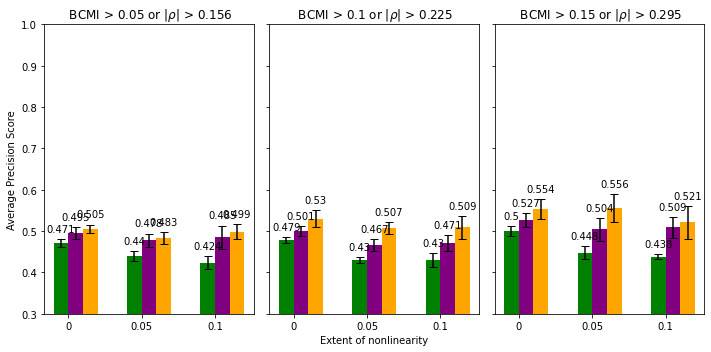

In [21]:
yeastbarplotnlrsubplots_seedrange_firstrow_findr(1)

In [26]:
def yeastbarplotnlrsubplots_seedrange_firstrow_allmethods(y):
    # yeast calculate the avg precision score for all variance for each subset different varaince 
    ### yeast analysis ################
    cutoffs = [0, 0.05, 0.1]
    p_values = ['both']
    #p_values = [ 'both']
    l_values = [0.05, 0.1, 0.15]
    spearman_causal=pd.read_csv("../../../findr/findrfiles/scripts/mpmi_indices/spearman_cutoff_causal.txt",header=None)[0].to_list()
    #spearman_indep=pd.read_csv("../../../findr/findrfiles/scripts/mpmi_indices/spearman_cutoff_indep.txt",header=None)[0].to_list()
    fig, axs = plt.subplots(len(p_values), len(l_values), figsize=(10, 5),sharex=True,sharey=True)
    #fig.suptitle(r'Average Precision Score across 10 seeds for a given run varying ($\Delta\mathrm{var}$)')
    for p_index, p in enumerate(p_values):
        for l_index, l in enumerate(l_values):
            nlcd_mean=[]
            cit_mean=[]
            findr_mean=[]
            mrpc_mean=[]
            nlcd_std=[]
            cit_std=[]
            findr_std=[]
            mrpc_std=[]
            for j in range(len(cutoffs)):
                nlcd_avgprecision=[]
                cit_avgprecision=[]
                findr_avgprecision=[]
                mrpc_avgprecision=[]
                nlcd_auc=[]
                cit_auc=[]
                findr_auc=[]
                mrpc_auc=[]
                # backup2 has the older files which was a bug 
                #varcausalyeast=pd.read_csv('../../../findr/findrfiles/scripts/backup2/yeast_wilko_mi_causal_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
                #varindepyeast=pd.read_csv('../../../findr/findrfiles/scripts/backup2/yeast_wilko_mi_indep_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
                for i in range(1,11):
                    varcausalyeast=pd.read_csv('../../../findr/findrfiles/scripts/mpmi_indices/seed'+str(i)+'/yeast_wilko_mi_causal_'+p+str(l)+'_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
                    varindepyeast=pd.read_csv('../../../findr/findrfiles/scripts/mpmi_indices/seed'+str(i)+'/yeast_wilko_mi_indep_'+p+str(l)+'_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
                
                    #print("Run ",i)
                    avgprecision=calculate_avgprecision("./results/journal/yeast/wilko10runs/nlcd/yeast_causal"+str(y)+".csv", "./results/journal/yeast/wilko10runs/nlcd/yeast_indp"+str(y)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    nlcd_avgprecision.append(avgprecision)
                    #print("NLCD avg precision ", avgprecision)
                    avgprecision=calculate_avgprecision("./results/journal/yeast/wilko10runs/cit/yeast_causal_"+str(y)+".csv", "./results/journal/yeast/wilko10runs/cit/yeast_indp_"+str(y)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    #print("CIT avg precision",avgprecision)
                    cit_avgprecision.append(avgprecision)
                    avgprecision=calculate_avgprecision_findr("../../../findr/findrfiles/scripts/findr_yeast/yeast_1_1234_findr.csv","../../../findr/findrfiles/scripts/findr_yeast/yeast_0_1234_findr.csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    findr_avgprecision.append(avgprecision)
                    avgprecision=calculate_avgprecision_MRPC("./results/journal/simulation/MRPC/yeast_results/yeast_indv/1_trios_mrpc.csv","./results/journal/simulation/MRPC/yeast_results/yeast_indv/0_trios_mrpc.csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    mrpc_avgprecision.append(avgprecision)

                    
                    precision_CIT, recall_CIT = calculate_precision_recall("./results/journal/yeast/wilko10runs/cit/yeast_causal_"+str(y)+".csv", "./results/journal/yeast/wilko10runs/cit/yeast_indp_"+str(y)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall("./results/journal/yeast/wilko10runs/nlcd/yeast_causal"+str(y)+".csv", "./results/journal/yeast/wilko10runs/nlcd/yeast_indp"+str(y)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    precision_findr,recall_findr=calculate_precision_recall_findr("../../../findr/findrfiles/scripts/findr_yeast/yeast_1_1234_findr.csv","../../../findr/findrfiles/scripts/findr_yeast/yeast_0_1234_findr.csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    precision_mrpc,recall_mrpc=calculate_precision_recall_MRPC("./results/journal/simulation/MRPC/yeast_results/yeast_indv/1_trios_mrpc.csv","./results/journal/simulation/MRPC/yeast_results/yeast_indv/0_trios_mrpc.csv",causal_id=varcausalyeast,indep_id=varindepyeast)

                    auc_score = auc(recall_nlmr_KRR, precision_nlmr_KRR)
                    #print("NLCD AUPR ",auc_score)
                    nlcd_auc.append(auc_score)
                    auc_score = auc(recall_CIT, precision_CIT)
                    #print("CIT AUPR ",auc_score)
                    cit_auc.append(auc_score)
                    auc_score=auc(recall_findr,precision_findr)
                    findr_auc.append(auc_score)
                    auc_score=auc(recall_mrpc,precision_mrpc)
                    mrpc_auc.append(auc_score)

                nlcd_mean.append(np.mean(nlcd_avgprecision))
                cit_mean.append(np.mean(cit_avgprecision))
                findr_mean.append(np.mean(findr_avgprecision))
                mrpc_mean.append(np.mean(mrpc_avgprecision))
                nlcd_std.append(np.std(nlcd_avgprecision))
                cit_std.append(np.std(cit_avgprecision))
                findr_std.append(np.std(findr_avgprecision))
                mrpc_std.append(np.std(mrpc_avgprecision))

            nlcd_mean=np.round(nlcd_mean,3)
            cit_mean=np.round(cit_mean,3)
            findr_mean=np.round(findr_mean,3)
            mrpc_mean=np.round(mrpc_mean,3)

            species = cutoffs
            algo_means = {
                'CIT': cit_mean,
                'NLCD': nlcd_mean,
                 'Findr':findr_mean,
                 'mrpc':mrpc_mean
            }

            x = np.arange(len(species))  # the label locations
            width = 0.2  # the width of the bars , change this if the numbers are overlapping 
            multiplier = 0

            #fig, ax = plt.subplots(figsize=(10, 6),layout='constrained')
            ax=axs[l_index]
            #ax=axs[l_index]
            for attribute, measurement in algo_means.items():
                offset = width * multiplier
                if attribute=='CIT':
                    rects = ax.bar(x + offset, measurement, width, yerr=cit_std,label=attribute,color='green',capsize=4)
                elif attribute=='NLCD':
                    rects = ax.bar(x + offset, measurement, width, yerr=nlcd_std,label=attribute,color='purple',capsize=4)    
                elif attribute=='Findr':
                    rects = ax.bar(x + offset, measurement, width, yerr=findr_std,label=attribute,color='orange',capsize=4)   
                else:
                    rects = ax.bar(x + offset, measurement, width, yerr=mrpc_std,label=attribute,color='yellow',capsize=4)  
                ax.bar_label(rects, padding=5)
                multiplier += 1

            # Add some text for labels, title and custom x-axis tick labels, etc.
            #ax.set_ylabel('Average precision score')
            #ax.set_title(r'Average Precision Score across 10 runs with varying Extent of nonlinearity ($\Delta\mathrm{var}$)')
            #ax.set_xlabel("Extent of nonlinearity")
            if(p=='both'):
                ax.set_title(fr' BCMI > {l} or $|\rho|$ > {np.round(spearman_causal[l_index],3)} ')
            elif(p=='bcmi'):
                ax.set_title(f' bcmi > {l} ')
            elif(p=='spear'):
                ax.set_title(fr' $\rho$_causal > {np.round(spearman_causal[l_index],3)} ')
            #ax.set_ylim(0.3, 0.9)
            ax.set_xticks(x + width/2, [0,0.05,0.1])
            #if(p=='bcmi' and l==0.05):
            #    ax.legend(loc='upper left', ncol=2)
            #    ax.set_ylabel('Bcmi')
            if( l==0.05):
                ax.set_ylabel('Average Precision Score')
            ax.set_ylabel
            #if(p=='spear' and l==0.05):
            #    ax.set_ylabel('Average precision score \n spearman')
            if( l==0.1):
                ax.set_xlabel("Extent of nonlinearity")

            ax.set_ylim(0.3, 1)
            print(np.round(np.mean(nlcd_std),4))
            print(np.round(np.mean(cit_std),4))
            print(np.round(np.mean(findr_std),4))
            print(np.round(np.mean(mrpc_std),4))

            #ax = axs[p_index, l_index]
            #ax.set_title(f'p: {p}, l: {l}')
            #ax.set_ylim(0.3, 0.9)
            #ax.legend(loc='upper left', ncol=2)
    fig.tight_layout()
    #fig.text(0.5, 0.08, "Extent of nonlinearity ODC cutoff", ha='center')
    #fig.text(0.08, 0.5, 'Average Precision Score', va='center', rotation='vertical')
    #plt.savefig("./results/journal/plots/figyeast_bar_nlr_seedyeast_both"+str(y)+"or_findr.png", bbox_inches='tight', dpi=1200)
    #plt.savefig('./results/journal/plots/figyeast_bar_nlr_seedyeast_both'+str(y)+'or_findr.svg', bbox_inches='tight', format='svg', dpi=1200)


0.0194
0.0125
0.0143
0.0069
0.0152
0.01
0.0209
0.0102
0.0233
0.0119
0.0323
0.0129


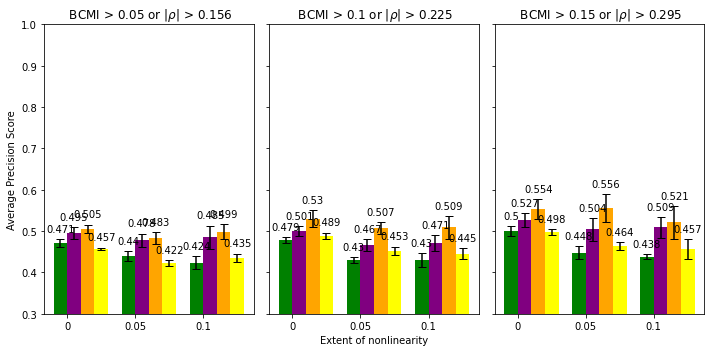

In [27]:
yeastbarplotnlrsubplots_seedrange_firstrow_allmethods(1)

In [ ]:
def yeastbarplotnlrsubplots_seedrange_remainingrows(y):
    # yeast calculate the avg precision score for all variance for each subset different varaince 
    ### yeast analysis ################
    cutoffs = [0, 0.05, 0.1]
    #p_values = ['both']
    p_values = ['bcmi', 'spear']

    #p_values = [ 'both']
    l_values = [0.05, 0.1, 0.15]
    spearman_causal=pd.read_csv("../../../findr/findrfiles/scripts/mpmi_indices/spearman_cutoff_causal.txt",header=None)[0].to_list()
    #spearman_indep=pd.read_csv("../../../findr/findrfiles/scripts/mpmi_indices/spearman_cutoff_indep.txt",header=None)[0].to_list()
    fig, axs = plt.subplots(len(p_values), len(l_values), figsize=(10, 6),sharex=True,sharey=True)
    #fig.suptitle(r'Average Precision Score across 10 seeds for a given run varying ($\Delta\mathrm{var}$)')
    for p_index, p in enumerate(p_values):
        for l_index, l in enumerate(l_values):
            nlcd_mean=[]
            cit_mean=[]
            nlcd_std=[]
            cit_std=[]
            for j in range(len(cutoffs)):
                nlcd_avgprecision=[]
                cit_avgprecision=[]
                nlcd_auc=[]
                cit_auc=[]
                findr_auc=[]
                # backup2 has the older files which was a bug 
                #varcausalyeast=pd.read_csv('../../../findr/findrfiles/scripts/backup2/yeast_wilko_mi_causal_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
                #varindepyeast=pd.read_csv('../../../findr/findrfiles/scripts/backup2/yeast_wilko_mi_indep_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
                for i in range(1,11):
                    varcausalyeast=pd.read_csv('../../../findr/findrfiles/scripts/mpmi_indices/seed'+str(i)+'/yeast_wilko_mi_causal_'+p+str(l)+'_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
                    varindepyeast=pd.read_csv('../../../findr/findrfiles/scripts/mpmi_indices/seed'+str(i)+'/yeast_wilko_mi_indep_'+p+str(l)+'_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
                
                    #print("Run ",i)
                    avgprecision=calculate_avgprecision("./results/journal/yeast/wilko10runs/nlcd/yeast_causal"+str(y)+".csv", "./results/journal/yeast/wilko10runs/nlcd/yeast_indp"+str(y)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    nlcd_avgprecision.append(avgprecision)
                    #print("NLCD avg precision ", avgprecision)
                    avgprecision=calculate_avgprecision("./results/journal/yeast/wilko10runs/cit/yeast_causal_"+str(y)+".csv", "./results/journal/yeast/wilko10runs/cit/yeast_indp_"+str(y)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    #print("CIT avg precision",avgprecision)
                    cit_avgprecision.append(avgprecision)
                    precision_CIT, recall_CIT = calculate_precision_recall("./results/journal/yeast/wilko10runs/cit/yeast_causal_"+str(y)+".csv", "./results/journal/yeast/wilko10runs/cit/yeast_indp_"+str(y)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall("./results/journal/yeast/wilko10runs/nlcd/yeast_causal"+str(y)+".csv", "./results/journal/yeast/wilko10runs/nlcd/yeast_indp"+str(y)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    auc_score = auc(recall_nlmr_KRR, precision_nlmr_KRR)
                    #print("NLCD AUPR ",auc_score)
                    nlcd_auc.append(auc_score)
                    auc_score = auc(recall_CIT, precision_CIT)
                    #print("CIT AUPR ",auc_score)
                    cit_auc.append(auc_score)

                nlcd_mean.append(np.mean(nlcd_avgprecision))
                cit_mean.append(np.mean(cit_avgprecision))
                nlcd_std.append(np.std(nlcd_avgprecision))
                cit_std.append(np.std(cit_avgprecision))

            nlcd_mean=np.round(nlcd_mean,3)
            cit_mean=np.round(cit_mean,3)


            species = cutoffs
            algo_means = {
                'CIT': cit_mean,
                'NLCD': nlcd_mean
            }

            x = np.arange(len(species))  # the label locations
            width = 0.4  # the width of the bars , change this if the numbers are overlapping 
            multiplier = 0

            #fig, ax = plt.subplots(figsize=(10, 6),layout='constrained')
            #ax=axs[l_index]
            ax=axs[p_index,l_index]
            #ax=axs[l_index]
            for attribute, measurement in algo_means.items():
                offset = width * multiplier
                if attribute=='CIT':
                    rects = ax.bar(x + offset, measurement, width, yerr=cit_std,label=attribute,color='green',capsize=4)
                else:
                    rects = ax.bar(x + offset, measurement, width, yerr=nlcd_std,label=attribute,color='purple',capsize=4)    
                ax.bar_label(rects, padding=5)
                multiplier += 1

            # Add some text for labels, title and custom x-axis tick labels, etc.
            #ax.set_ylabel('Average precision score')
            #ax.set_title(r'Average Precision Score across 10 runs with varying Extent of nonlinearity ($\Delta\mathrm{var}$)')
            #ax.set_xlabel("Extent of nonlinearity")
            if(p=='both'):
                ax.set_title(fr' BCMI > {l} or $|\rho|$ > {np.round(spearman_causal[l_index],3)} ')
            elif(p=='bcmi'):
                ax.set_title(f' BCMI > {l} ')
            elif(p=='spear'):
                ax.set_title(fr' $|\rho|$ > {np.round(spearman_causal[l_index],3)} ')
            #ax.set_ylim(0.3, 0.9)
            ax.set_xticks(x + width/2, [0,0.05,0.1])
            #if(p=='bcmi' and l==0.05):
            #    ax.legend(loc='upper left', ncol=2)
            #    ax.set_ylabel('Bcmi')
            if( l==0.05):
                ax.set_ylabel('Average Precision Score')
            ax.set_ylabel
            #if(p=='spear' and l==0.05):
            #    ax.set_ylabel('Average precision score \n spearman')
            if( l==0.1):
                ax.set_xlabel("Extent of nonlinearity")

            ax.set_ylim(0.3, 1)
            print(np.round(np.mean(nlcd_std),4))
            print(np.round(np.mean(cit_std),4))


            #ax = axs[p_index, l_index]
            #ax.set_title(f'p: {p}, l: {l}')
            #ax.set_ylim(0.3, 0.9)
            #ax.legend(loc='upper left', ncol=2)
    fig.tight_layout()
    #fig.text(0.5, 0.08, "Extent of nonlinearity ODC cutoff", ha='center')
    #fig.text(0.08, 0.5, 'Average Precision Score', va='center', rotation='vertical')
    plt.savefig("./results/journal/plots/figyeast_bar_nlr_seedyeast_both"+str(y)+"rem.png", bbox_inches='tight', dpi=1200)
    plt.savefig('./results/journal/plots/figyeast_bar_nlr_seedyeast_both'+str(y)+'rem.svg', bbox_inches='tight', format='svg', dpi=1200)


In [ ]:
yeastbarplotnlrsubplots_seedrange_remainingrows(1)

In [13]:
def yeastbarplotnlrsubplots_seedrange_remainingrows_findr(y):
    # yeast calculate the avg precision score for all variance for each subset different varaince 
    ### yeast analysis ################
    cutoffs = [0, 0.05, 0.1]
    #p_values = ['both']
    p_values = ['bcmi', 'spear']

    #p_values = [ 'both']
    l_values = [0.05, 0.1, 0.15]
    spearman_causal=pd.read_csv("../../../findr/findrfiles/scripts/mpmi_indices/spearman_cutoff_causal.txt",header=None)[0].to_list()
    #spearman_indep=pd.read_csv("../../../findr/findrfiles/scripts/mpmi_indices/spearman_cutoff_indep.txt",header=None)[0].to_list()
    fig, axs = plt.subplots(len(p_values), len(l_values), figsize=(10, 6),sharex=True,sharey=True)
    #fig.suptitle(r'Average Precision Score across 10 seeds for a given run varying ($\Delta\mathrm{var}$)')
    for p_index, p in enumerate(p_values):
        for l_index, l in enumerate(l_values):
            nlcd_mean=[]
            cit_mean=[]
            findr_mean=[]
            nlcd_std=[]
            cit_std=[]
            findr_std=[]
            for j in range(len(cutoffs)):
                nlcd_avgprecision=[]
                cit_avgprecision=[]
                findr_avgprecision=[]
                nlcd_auc=[]
                cit_auc=[]
                findr_auc=[]
                # backup2 has the older files which was a bug 
                #varcausalyeast=pd.read_csv('../../../findr/findrfiles/scripts/backup2/yeast_wilko_mi_causal_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
                #varindepyeast=pd.read_csv('../../../findr/findrfiles/scripts/backup2/yeast_wilko_mi_indep_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
                for i in range(1,11):
                    varcausalyeast=pd.read_csv('../../../findr/findrfiles/scripts/mpmi_indices/seed'+str(i)+'/yeast_wilko_mi_causal_'+p+str(l)+'_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
                    varindepyeast=pd.read_csv('../../../findr/findrfiles/scripts/mpmi_indices/seed'+str(i)+'/yeast_wilko_mi_indep_'+p+str(l)+'_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
                
                    #print("Run ",i)
                    avgprecision=calculate_avgprecision("./results/journal/yeast/wilko10runs/nlcd/yeast_causal"+str(y)+".csv", "./results/journal/yeast/wilko10runs/nlcd/yeast_indp"+str(y)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    nlcd_avgprecision.append(avgprecision)
                    #print("NLCD avg precision ", avgprecision)
                    avgprecision=calculate_avgprecision("./results/journal/yeast/wilko10runs/cit/yeast_causal_"+str(y)+".csv", "./results/journal/yeast/wilko10runs/cit/yeast_indp_"+str(y)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    #print("CIT avg precision",avgprecision)
                    cit_avgprecision.append(avgprecision)
                    avgprecision=calculate_avgprecision_findr("../../../findr/findrfiles/scripts/findr_yeast/yeast_1_1234_findr.csv","../../../findr/findrfiles/scripts/findr_yeast/yeast_0_1234_findr.csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    findr_avgprecision.append(avgprecision)

                    precision_CIT, recall_CIT = calculate_precision_recall("./results/journal/yeast/wilko10runs/cit/yeast_causal_"+str(y)+".csv", "./results/journal/yeast/wilko10runs/cit/yeast_indp_"+str(y)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall("./results/journal/yeast/wilko10runs/nlcd/yeast_causal"+str(y)+".csv", "./results/journal/yeast/wilko10runs/nlcd/yeast_indp"+str(y)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    precision_findr,recall_findr=calculate_precision_recall_findr("../../../findr/findrfiles/scripts/findr_yeast/yeast_1_1234_findr.csv","../../../findr/findrfiles/scripts/findr_yeast/yeast_0_1234_findr.csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    auc_score = auc(recall_nlmr_KRR, precision_nlmr_KRR)
                    #print("NLCD AUPR ",auc_score)
                    nlcd_auc.append(auc_score)
                    auc_score = auc(recall_CIT, precision_CIT)
                    #print("CIT AUPR ",auc_score)
                    cit_auc.append(auc_score)
                    auc_score=auc(recall_findr,precision_findr)
                    findr_auc.append(auc_score)

                nlcd_mean.append(np.mean(nlcd_avgprecision))
                cit_mean.append(np.mean(cit_avgprecision))
                findr_mean.append(np.mean(findr_avgprecision))
                nlcd_std.append(np.std(nlcd_avgprecision))
                cit_std.append(np.std(cit_avgprecision))
                findr_std.append(np.std(findr_avgprecision))

            nlcd_mean=np.round(nlcd_mean,3)
            cit_mean=np.round(cit_mean,3)
            findr_mean=np.round(findr_mean,3)

            species = cutoffs
            algo_means = {
                'CIT': cit_mean,
                'NLCD': nlcd_mean,
                'Findr':findr_mean
            }

            x = np.arange(len(species))  # the label locations
            width = 0.2  # the width of the bars , change this if the numbers are overlapping 
            multiplier = 0

            #fig, ax = plt.subplots(figsize=(10, 6),layout='constrained')
            #ax=axs[l_index]
            ax=axs[p_index,l_index]
            #ax=axs[l_index]
            for attribute, measurement in algo_means.items():
                offset = width * multiplier
                if attribute=='CIT':
                    rects = ax.bar(x + offset, measurement, width, yerr=cit_std,label=attribute,color='green',capsize=4)
                elif attribute=='NLCD':
                    rects = ax.bar(x + offset, measurement, width, yerr=nlcd_std,label=attribute,color='purple',capsize=4)    
                else:
                    rects = ax.bar(x + offset, measurement, width, yerr=findr_std,label=attribute,color='orange',capsize=4)     
                ax.bar_label(rects, padding=5)
                multiplier += 1

            # Add some text for labels, title and custom x-axis tick labels, etc.
            #ax.set_ylabel('Average precision score')
            #ax.set_title(r'Average Precision Score across 10 runs with varying Extent of nonlinearity ($\Delta\mathrm{var}$)')
            #ax.set_xlabel("Extent of nonlinearity")
            if(p=='both'):
                ax.set_title(fr' BCMI > {l} or $|\rho|$ > {np.round(spearman_causal[l_index],3)} ')
            elif(p=='bcmi'):
                ax.set_title(f' BCMI > {l} ')
            elif(p=='spear'):
                ax.set_title(fr' $|\rho|$ > {np.round(spearman_causal[l_index],3)} ')
            #ax.set_ylim(0.3, 0.9)
            ax.set_xticks(x + width/2, [0,0.05,0.1])
            #if(p=='bcmi' and l==0.05):
            #    ax.legend(loc='upper left', ncol=2)
            #    ax.set_ylabel('Bcmi')
            if( l==0.05):
                ax.set_ylabel('Average Precision Score')
            ax.set_ylabel
            #if(p=='spear' and l==0.05):
            #    ax.set_ylabel('Average precision score \n spearman')
            if( l==0.1):
                ax.set_xlabel("Extent of nonlinearity")

            ax.set_ylim(0.3, 1)
            print(np.round(np.mean(nlcd_std),4))
            print(np.round(np.mean(cit_std),4))
            print(np.round(np.mean(findr_std),4))

            #ax = axs[p_index, l_index]
            #ax.set_title(f'p: {p}, l: {l}')
            #ax.set_ylim(0.3, 0.9)
            #ax.legend(loc='upper left', ncol=2)
    fig.tight_layout()
    #fig.text(0.5, 0.08, "Extent of nonlinearity ODC cutoff", ha='center')
    #fig.text(0.08, 0.5, 'Average Precision Score', va='center', rotation='vertical')
    plt.savefig("./results/journal/plots/figyeast_bar_nlr_seedyeast_both"+str(y)+"rem_findr.png", bbox_inches='tight', dpi=1200)
    plt.savefig('./results/journal/plots/figyeast_bar_nlr_seedyeast_both'+str(y)+'rem_findr.svg', bbox_inches='tight', format='svg', dpi=1200)


0.0193
0.0149
0.0156
0.0166
0.0147
0.0182
0.0302
0.018
0.0258
0.0337
0.0176
0.0395
0.0362
0.0261
0.0403
0.099
0.0631
0.0505


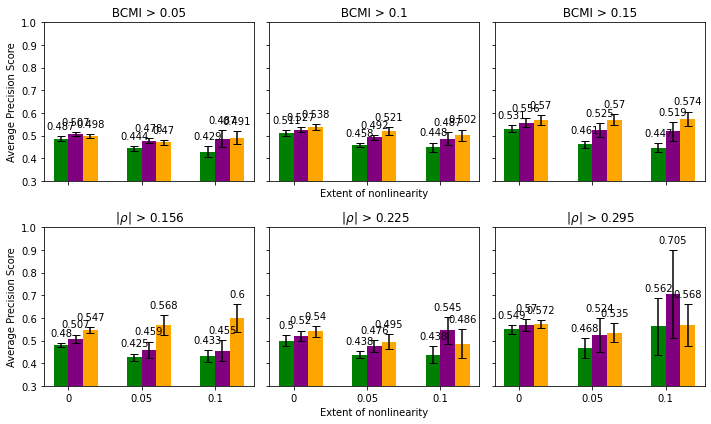

In [14]:
yeastbarplotnlrsubplots_seedrange_remainingrows_findr(1)

In [30]:
def yeastbarplotnlrsubplots_seedrange_remainingrows_allmethods(y):
    # yeast calculate the avg precision score for all variance for each subset different varaince 
    ### yeast analysis ################
    cutoffs = [0, 0.05, 0.1]
    #p_values = ['both']
    p_values = ['bcmi', 'spear']

    #p_values = [ 'both']
    l_values = [0.05, 0.1, 0.15]
    spearman_causal=pd.read_csv("../../../findr/findrfiles/scripts/mpmi_indices/spearman_cutoff_causal.txt",header=None)[0].to_list()
    #spearman_indep=pd.read_csv("../../../findr/findrfiles/scripts/mpmi_indices/spearman_cutoff_indep.txt",header=None)[0].to_list()
    fig, axs = plt.subplots(len(p_values), len(l_values), figsize=(10, 6),sharex=True,sharey=True)
    #fig.suptitle(r'Average Precision Score across 10 seeds for a given run varying ($\Delta\mathrm{var}$)')
    for p_index, p in enumerate(p_values):
        for l_index, l in enumerate(l_values):
            nlcd_mean=[]
            cit_mean=[]
            findr_mean=[]
            mrpc_mean=[]
            nlcd_std=[]
            cit_std=[]
            findr_std=[]
            mrpc_std=[]
            for j in range(len(cutoffs)):
                nlcd_avgprecision=[]
                cit_avgprecision=[]
                findr_avgprecision=[]
                mrpc_avgprecision=[]
                nlcd_auc=[]
                cit_auc=[]
                findr_auc=[]
                mrpc_auc=[]
                # backup2 has the older files which was a bug 
                #varcausalyeast=pd.read_csv('../../../findr/findrfiles/scripts/backup2/yeast_wilko_mi_causal_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
                #varindepyeast=pd.read_csv('../../../findr/findrfiles/scripts/backup2/yeast_wilko_mi_indep_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
                for i in range(1,11):
                    varcausalyeast=pd.read_csv('../../../findr/findrfiles/scripts/mpmi_indices/seed'+str(i)+'/yeast_wilko_mi_causal_'+p+str(l)+'_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
                    varindepyeast=pd.read_csv('../../../findr/findrfiles/scripts/mpmi_indices/seed'+str(i)+'/yeast_wilko_mi_indep_'+p+str(l)+'_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
                
                    #print("Run ",i)
                    avgprecision=calculate_avgprecision("./results/journal/yeast/wilko10runs/nlcd/yeast_causal"+str(y)+".csv", "./results/journal/yeast/wilko10runs/nlcd/yeast_indp"+str(y)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    nlcd_avgprecision.append(avgprecision)
                    #print("NLCD avg precision ", avgprecision)
                    avgprecision=calculate_avgprecision("./results/journal/yeast/wilko10runs/cit/yeast_causal_"+str(y)+".csv", "./results/journal/yeast/wilko10runs/cit/yeast_indp_"+str(y)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    #print("CIT avg precision",avgprecision)
                    cit_avgprecision.append(avgprecision)
                    avgprecision=calculate_avgprecision_findr("../../../findr/findrfiles/scripts/findr_yeast/yeast_1_1234_findr.csv","../../../findr/findrfiles/scripts/findr_yeast/yeast_0_1234_findr.csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    findr_avgprecision.append(avgprecision)
                    avgprecision=calculate_avgprecision_MRPC("./results/journal/simulation/MRPC/yeast_results/yeast_indv/1_trios_mrpc.csv","./results/journal/simulation/MRPC/yeast_results/yeast_indv/0_trios_mrpc.csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    mrpc_avgprecision.append(avgprecision)

                    precision_CIT, recall_CIT = calculate_precision_recall("./results/journal/yeast/wilko10runs/cit/yeast_causal_"+str(y)+".csv", "./results/journal/yeast/wilko10runs/cit/yeast_indp_"+str(y)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall("./results/journal/yeast/wilko10runs/nlcd/yeast_causal"+str(y)+".csv", "./results/journal/yeast/wilko10runs/nlcd/yeast_indp"+str(y)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    precision_findr,recall_findr=calculate_precision_recall_findr("../../../findr/findrfiles/scripts/findr_yeast/yeast_1_1234_findr.csv","../../../findr/findrfiles/scripts/findr_yeast/yeast_0_1234_findr.csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    precision_mrpc,recall_mrpc=calculate_precision_recall_MRPC("./results/journal/simulation/MRPC/yeast_results/yeast_indv/1_trios_mrpc.csv","./results/journal/simulation/MRPC/yeast_results/yeast_indv/0_trios_mrpc.csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    auc_score = auc(recall_nlmr_KRR, precision_nlmr_KRR)
                    #print("NLCD AUPR ",auc_score)
                    nlcd_auc.append(auc_score)
                    auc_score = auc(recall_CIT, precision_CIT)
                    #print("CIT AUPR ",auc_score)
                    cit_auc.append(auc_score)
                    auc_score=auc(recall_findr,precision_findr)
                    findr_auc.append(auc_score)
                    auc_score=auc(recall_mrpc,precision_mrpc)
                    mrpc_auc.append(auc_score)

                nlcd_mean.append(np.mean(nlcd_avgprecision))
                cit_mean.append(np.mean(cit_avgprecision))
                findr_mean.append(np.mean(findr_avgprecision))
                mrpc_mean.append(np.mean(mrpc_avgprecision))
                nlcd_std.append(np.std(nlcd_avgprecision))
                cit_std.append(np.std(cit_avgprecision))
                findr_std.append(np.std(findr_avgprecision))
                mrpc_std.append(np.std(mrpc_avgprecision))

            nlcd_mean=np.round(nlcd_mean,3)
            cit_mean=np.round(cit_mean,3)
            findr_mean=np.round(findr_mean,3)
            mrpc_mean=np.round(mrpc_mean,3)

            species = cutoffs
            algo_means = {
                'CIT': cit_mean,
                'NLCD': nlcd_mean,
                'Findr':findr_mean,
                'mrpc':mrpc_mean
            }

            x = np.arange(len(species))  # the label locations
            width = 0.2  # the width of the bars , change this if the numbers are overlapping 
            multiplier = 0

            #fig, ax = plt.subplots(figsize=(10, 6),layout='constrained')
            #ax=axs[l_index]
            ax=axs[p_index,l_index]
            #ax=axs[l_index]
            for attribute, measurement in algo_means.items():
                offset = width * multiplier
                if attribute=='CIT':
                    rects = ax.bar(x + offset, measurement, width, yerr=cit_std,label=attribute,color='green',capsize=4)
                elif attribute=='NLCD':
                    rects = ax.bar(x + offset, measurement, width, yerr=nlcd_std,label=attribute,color='purple',capsize=4)    
                elif attribute=='Findr':
                    rects = ax.bar(x + offset, measurement, width, yerr=findr_std,label=attribute,color='orange',capsize=4)     
                else:
                    rects = ax.bar(x + offset, measurement, width, yerr=mrpc_std,label=attribute,color='yellow',capsize=4)   
                ax.bar_label(rects, padding=5)
                multiplier += 1

            # Add some text for labels, title and custom x-axis tick labels, etc.
            #ax.set_ylabel('Average precision score')
            #ax.set_title(r'Average Precision Score across 10 runs with varying Extent of nonlinearity ($\Delta\mathrm{var}$)')
            #ax.set_xlabel("Extent of nonlinearity")
            if(p=='both'):
                ax.set_title(fr' BCMI > {l} or $|\rho|$ > {np.round(spearman_causal[l_index],3)} ')
            elif(p=='bcmi'):
                ax.set_title(f' BCMI > {l} ')
            elif(p=='spear'):
                ax.set_title(fr' $|\rho|$ > {np.round(spearman_causal[l_index],3)} ')
            #ax.set_ylim(0.3, 0.9)
            ax.set_xticks(x + width/2, [0,0.05,0.1])
            #if(p=='bcmi' and l==0.05):
            #    ax.legend(loc='upper left', ncol=2)
            #    ax.set_ylabel('Bcmi')
            if( l==0.05):
                ax.set_ylabel('Average Precision Score')
            ax.set_ylabel
            #if(p=='spear' and l==0.05):
            #    ax.set_ylabel('Average precision score \n spearman')
            if( l==0.1):
                ax.set_xlabel("Extent of nonlinearity")

            ax.set_ylim(0.3, 1)
            print(np.round(np.mean(nlcd_std),4))
            print(np.round(np.mean(cit_std),4))
            print(np.round(np.mean(findr_std),4))
            print(np.round(np.mean(mrpc_std),4))

            #ax = axs[p_index, l_index]
            #ax.set_title(f'p: {p}, l: {l}')
            #ax.set_ylim(0.3, 0.9)
            #ax.legend(loc='upper left', ncol=2)
    fig.tight_layout()
    #fig.text(0.5, 0.08, "Extent of nonlinearity ODC cutoff", ha='center')
    #fig.text(0.08, 0.5, 'Average Precision Score', va='center', rotation='vertical')
    #plt.savefig("./results/journal/plots/figyeast_bar_nlr_seedyeast_both"+str(y)+"rem_findr.png", bbox_inches='tight', dpi=1200)
    #plt.savefig('./results/journal/plots/figyeast_bar_nlr_seedyeast_both'+str(y)+'rem_findr.svg', bbox_inches='tight', format='svg', dpi=1200)


0.0193
0.0149
0.0156
0.0089
0.0166
0.0147
0.0182
0.0085
0.0302
0.018
0.0258
0.0088
0.0337
0.0176
0.0395
0.0137
0.0362
0.0261
0.0403
0.0145
0.099
0.0631
0.0505
0.0331


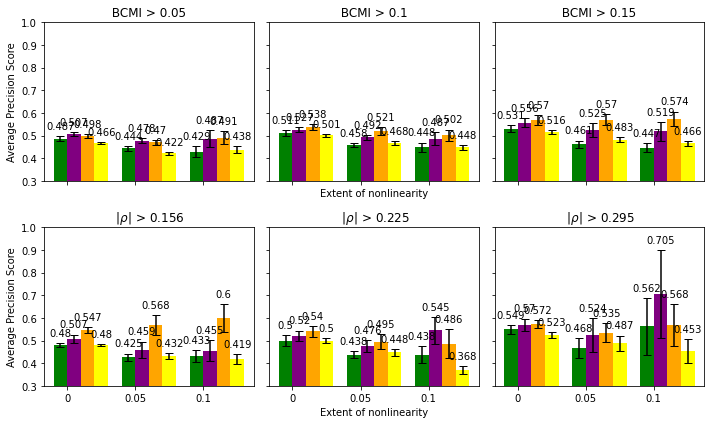

In [31]:
yeastbarplotnlrsubplots_seedrange_remainingrows_allmethods(1)

In [19]:
def yeastbarplotnlrsubplots_seedrange_remainingrows_allmethods_onlypoint1(y):
    # yeast calculate the avg precision score for all variance for each subset different varaince 
    ### yeast analysis ################
    cutoffs = [0.1]
    #p_values = ['both']
    p_values = ['both','bcmi', 'spear']

    #p_values = [ 'both']
    l_values = [0.05, 0.1, 0.15]
    spearman_causal=pd.read_csv("../../../findr/findrfiles/scripts/mpmi_indices/spearman_cutoff_causal.txt",header=None)[0].to_list()
    #spearman_indep=pd.read_csv("../../../findr/findrfiles/scripts/mpmi_indices/spearman_cutoff_indep.txt",header=None)[0].to_list()
    fig, axs = plt.subplots(len(p_values), len(l_values), figsize=(6, 8),sharex=True,sharey=True)
    #fig.suptitle(r'Average Precision Score across 10 seeds for a given run varying ($\Delta\mathrm{var}$)')
    fig.suptitle(r'Extent of nonlinearity of $0.1$')
    for p_index, p in enumerate(p_values):
        for l_index, l in enumerate(l_values):
            nlcd_mean=[]
            cit_mean=[]
            findr_mean=[]
            mrpc_mean=[]
            nlcd_std=[]
            cit_std=[]
            findr_std=[]
            mrpc_std=[]
            for j in range(len(cutoffs)):
                nlcd_avgprecision=[]
                cit_avgprecision=[]
                findr_avgprecision=[]
                mrpc_avgprecision=[]
                nlcd_auc=[]
                cit_auc=[]
                findr_auc=[]
                mrpc_auc=[]
                # backup2 has the older files which was a bug 
                #varcausalyeast=pd.read_csv('../../../findr/findrfiles/scripts/backup2/yeast_wilko_mi_causal_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
                #varindepyeast=pd.read_csv('../../../findr/findrfiles/scripts/backup2/yeast_wilko_mi_indep_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
                for i in range(1,11):
                    varcausalyeast=pd.read_csv('../../../findr/findrfiles/scripts/mpmi_indices/seed'+str(i)+'/yeast_wilko_mi_causal_'+p+str(l)+'_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
                    varindepyeast=pd.read_csv('../../../findr/findrfiles/scripts/mpmi_indices/seed'+str(i)+'/yeast_wilko_mi_indep_'+p+str(l)+'_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
                    
                    random_classifier=len(varcausalyeast)/(len(varindepyeast)+len(varindepyeast))
                    print(random_classifier)
                    #print("Run ",i)
                    avgprecision=calculate_avgprecision("./results/journal/yeast/wilko10runs/nlcd/yeast_causal"+str(y)+".csv", "./results/journal/yeast/wilko10runs/nlcd/yeast_indp"+str(y)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    nlcd_avgprecision.append(avgprecision)
                    #print("NLCD avg precision ", avgprecision)
                    avgprecision=calculate_avgprecision("./results/journal/yeast/wilko10runs/cit/yeast_causal_"+str(y)+".csv", "./results/journal/yeast/wilko10runs/cit/yeast_indp_"+str(y)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    #print("CIT avg precision",avgprecision)
                    cit_avgprecision.append(avgprecision)
                    avgprecision=calculate_avgprecision_findr("../../../findr/findrfiles/scripts/findr_yeast/yeast_1_1234_findr.csv","../../../findr/findrfiles/scripts/findr_yeast/yeast_0_1234_findr.csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    findr_avgprecision.append(avgprecision)
                    avgprecision=calculate_avgprecision_MRPC("./results/journal/simulation/MRPC/yeast_results/yeast_indv/1_trios_mrpc.csv","./results/journal/simulation/MRPC/yeast_results/yeast_indv/0_trios_mrpc.csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    mrpc_avgprecision.append(avgprecision)

                    precision_CIT, recall_CIT = calculate_precision_recall("./results/journal/yeast/wilko10runs/cit/yeast_causal_"+str(y)+".csv", "./results/journal/yeast/wilko10runs/cit/yeast_indp_"+str(y)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall("./results/journal/yeast/wilko10runs/nlcd/yeast_causal"+str(y)+".csv", "./results/journal/yeast/wilko10runs/nlcd/yeast_indp"+str(y)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    precision_findr,recall_findr=calculate_precision_recall_findr("../../../findr/findrfiles/scripts/findr_yeast/yeast_1_1234_findr.csv","../../../findr/findrfiles/scripts/findr_yeast/yeast_0_1234_findr.csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    precision_mrpc,recall_mrpc=calculate_precision_recall_MRPC("./results/journal/simulation/MRPC/yeast_results/yeast_indv/1_trios_mrpc.csv","./results/journal/simulation/MRPC/yeast_results/yeast_indv/0_trios_mrpc.csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    auc_score = auc(recall_nlmr_KRR, precision_nlmr_KRR)
                    #print("NLCD AUPR ",auc_score)
                    nlcd_auc.append(auc_score)
                    auc_score = auc(recall_CIT, precision_CIT)
                    #print("CIT AUPR ",auc_score)
                    cit_auc.append(auc_score)
                    auc_score=auc(recall_findr,precision_findr)
                    findr_auc.append(auc_score)
                    #auc_score=auc(recall_mrpc,precision_mrpc)
                    #mrpc_auc.append(auc_score)

                nlcd_mean.append(np.mean(nlcd_avgprecision))
                cit_mean.append(np.mean(cit_avgprecision))
                findr_mean.append(np.mean(findr_avgprecision))
                mrpc_mean.append(np.mean(mrpc_avgprecision))
                nlcd_std.append(np.std(nlcd_avgprecision))
                cit_std.append(np.std(cit_avgprecision))
                findr_std.append(np.std(findr_avgprecision))
                mrpc_std.append(np.std(mrpc_avgprecision))

            nlcd_mean=np.round(nlcd_mean,2)
            cit_mean=np.round(cit_mean,2)
            findr_mean=np.round(findr_mean,2)
            mrpc_mean=np.round(mrpc_mean,2)

            species = cutoffs
            
            algo_means = {
                'CIT': cit_mean,
                'NLCD': nlcd_mean,
                'Findr':findr_mean,
                'MRPC':mrpc_mean
            }
            #species=list(algo_means.keys())

            x = np.arange(len(species))  # the label locations
            width = 0.2  # the width of the bars , change this if the numbers are overlapping 
            multiplier = 0
            
            
            #fig, ax = plt.subplots(figsize=(10, 6),layout='constrained')
            #ax=axs[l_index]
            ax=axs[p_index,l_index]
            #ax=axs[l_index]
            for attribute, measurement in algo_means.items():
                offset = width * multiplier
                if attribute=='CIT':
                    rects = ax.bar(x + offset, measurement, width, yerr=cit_std,label=attribute,color='green',capsize=4)
                elif attribute=='NLCD':
                    rects = ax.bar(x + offset, measurement, width, yerr=nlcd_std,label=attribute,color='purple',capsize=4)    
                elif attribute=='Findr':
                    rects = ax.bar(x + offset, measurement, width, yerr=findr_std,label=attribute,color='orange',capsize=4)     
                else:
                    rects = ax.bar(x + offset, measurement, width, yerr=mrpc_std,label=attribute,color='yellow',capsize=4)   
                ax.bar_label(rects, padding=5)
                multiplier += 1

            # Add some text for labels, title and custom x-axis tick labels, etc.
            #ax.set_ylabel('Average precision score')
            #ax.set_title(r'Average Precision Score across 10 runs with varying Extent of nonlinearity ($\Delta\mathrm{var}$)')
            #ax.set_xlabel("Extent of nonlinearity")
            if(p=='both'):
                ax.set_title(fr' BCMI > {l} or $|\rho|$ > {np.round(spearman_causal[l_index],3)} ',fontsize=8)
            elif(p=='bcmi'):
                ax.set_title(f' BCMI > {l} ')
            elif(p=='spear'):
                ax.set_title(fr' $|\rho|$ > {np.round(spearman_causal[l_index],3)} ')
            #ax.set_ylim(0.3, 0.9)
            ax.set_xticks([0,0.2,0.4,0.6])
            #if(p=='bcmi' and l==0.05):
            #    ax.legend(loc='upper left', ncol=2)
            #    ax.set_ylabel('Bcmi')
            if( l==0.05):
                ax.set_ylabel('AUPRC')
            #ax.set_ylabel
            #if(p=='spear' and l==0.05):
            #    ax.set_ylabel('Average precision score \n spearman')
            ax.set_xticklabels(algo_means.keys(),rotation=-90) 
            #if( l==0.1):
            #    ax.set_xlabel("Extent of nonlinearity")

            ax.set_ylim(0.3, 1)
            #print(np.round(np.mean(nlcd_std),2))
            #print(np.round(np.mean(cit_std),2))
            #print(np.round(np.mean(findr_std),2))
            #print(np.round(np.mean(mrpc_std),2))

            #ax = axs[p_index, l_index]
            #ax.set_title(f'p: {p}, l: {l}')
            #ax.set_ylim(0.3, 0.9)
            #ax.legend(loc='upper left', ncol=2)
    fig.tight_layout()
    #fig.text(0.5, 0.08, "Extent of nonlinearity ODC cutoff", ha='center')
    #fig.text(0.08, 0.5, 'Average Precision Score', va='center', rotation='vertical')
    #plt.savefig("./results/journal/plots/figyeast_bar_nlr_seedyeast_first_"+str(y)+"_all_point1.png", bbox_inches='tight', dpi=1200)
    #plt.savefig('./results/journal/plots/figyeast_bar_nlr_seedyeast_first_'+str(y)+'_all_point1.svg', bbox_inches='tight', format='svg', dpi=1200)
    #plt.savefig('./results/journal/plots/figyeast_bar_nlr_seedyeast_first_'+str(y)+'_all_point1.pdf', bbox_inches='tight', format='pdf', dpi=1200)


0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5


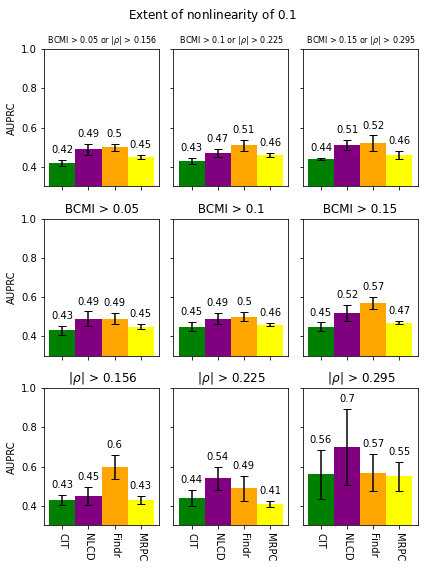

In [20]:
yeastbarplotnlrsubplots_seedrange_remainingrows_allmethods_onlypoint1(1)

In [18]:
def yeastbarplotnlrsubplots_seedrange_remainingrows_allmethods_onlypoint1_two_cols(y):
    # yeast calculate the avg precision score for all variance for each subset different varaince 
    ### yeast analysis ################
    cutoffs = [0.1]
    #p_values = ['both']
    p_values = ['both','bcmi', 'spear']

    #p_values = [ 'both']
    l_values = [0.05, 0.15]
    spearman_causal=pd.read_csv("../../../findr/findrfiles/scripts/mpmi_indices/spearman_cutoff_causal.txt",header=None)[0].to_list()
    spearman_causal.pop(1) # to remove the spearman equivalent to 0.1
    #spearman_indep=pd.read_csv("../../../findr/findrfiles/scripts/mpmi_indices/spearman_cutoff_indep.txt",header=None)[0].to_list()
    fig, axs = plt.subplots(len(p_values), len(l_values), figsize=(6, 8),sharex=True,sharey=True)
    #fig.suptitle(r'Average Precision Score across 10 seeds for a given run varying ($\Delta\mathrm{var}$)')
    fig.suptitle(r'Extent of nonlinearity of $0.1$')
    for p_index, p in enumerate(p_values):
        for l_index, l in enumerate(l_values):
            nlcd_mean=[]
            cit_mean=[]
            findr_mean=[]
            mrpc_mean=[]
            nlcd_std=[]
            cit_std=[]
            findr_std=[]
            mrpc_std=[]
            for j in range(len(cutoffs)):
                nlcd_avgprecision=[]
                cit_avgprecision=[]
                findr_avgprecision=[]
                mrpc_avgprecision=[]
                nlcd_auc=[]
                cit_auc=[]
                findr_auc=[]
                mrpc_auc=[]
                # backup2 has the older files which was a bug 
                #varcausalyeast=pd.read_csv('../../../findr/findrfiles/scripts/backup2/yeast_wilko_mi_causal_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
                #varindepyeast=pd.read_csv('../../../findr/findrfiles/scripts/backup2/yeast_wilko_mi_indep_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
                for i in range(1,11):
                    varcausalyeast=pd.read_csv('../../../findr/findrfiles/scripts/mpmi_indices/seed'+str(i)+'/yeast_wilko_mi_causal_'+p+str(l)+'_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
                    varindepyeast=pd.read_csv('../../../findr/findrfiles/scripts/mpmi_indices/seed'+str(i)+'/yeast_wilko_mi_indep_'+p+str(l)+'_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
                    if i==1:
                        print(len(varcausalyeast))
                        print(len(varindepyeast))
                    random_classifier=len(varcausalyeast)/(len(varindepyeast)+len(varindepyeast))
                    #print(random_classifier)
                    #print("Run ",i)
                    avgprecision=calculate_avgprecision("./results/journal/yeast/wilko10runs/nlcd/yeast_causal"+str(y)+".csv", "./results/journal/yeast/wilko10runs/nlcd/yeast_indp"+str(y)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    nlcd_avgprecision.append(avgprecision)
                    #print("NLCD avg precision ", avgprecision)
                    avgprecision=calculate_avgprecision("./results/journal/yeast/wilko10runs/cit/yeast_causal_"+str(y)+".csv", "./results/journal/yeast/wilko10runs/cit/yeast_indp_"+str(y)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    #print("CIT avg precision",avgprecision)
                    cit_avgprecision.append(avgprecision)
                    avgprecision=calculate_avgprecision_findr("../../../findr/findrfiles/scripts/findr_yeast/yeast_1_1234_findr.csv","../../../findr/findrfiles/scripts/findr_yeast/yeast_0_1234_findr.csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    findr_avgprecision.append(avgprecision)
                    avgprecision=calculate_avgprecision_MRPC("./results/journal/simulation/MRPC/yeast_results/yeast_indv/1_trios_mrpc.csv","./results/journal/simulation/MRPC/yeast_results/yeast_indv/0_trios_mrpc.csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    mrpc_avgprecision.append(avgprecision)

                    precision_CIT, recall_CIT = calculate_precision_recall("./results/journal/yeast/wilko10runs/cit/yeast_causal_"+str(y)+".csv", "./results/journal/yeast/wilko10runs/cit/yeast_indp_"+str(y)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall("./results/journal/yeast/wilko10runs/nlcd/yeast_causal"+str(y)+".csv", "./results/journal/yeast/wilko10runs/nlcd/yeast_indp"+str(y)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    precision_findr,recall_findr=calculate_precision_recall_findr("../../../findr/findrfiles/scripts/findr_yeast/yeast_1_1234_findr.csv","../../../findr/findrfiles/scripts/findr_yeast/yeast_0_1234_findr.csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    precision_mrpc,recall_mrpc=calculate_precision_recall_MRPC("./results/journal/simulation/MRPC/yeast_results/yeast_indv/1_trios_mrpc.csv","./results/journal/simulation/MRPC/yeast_results/yeast_indv/0_trios_mrpc.csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    auc_score = auc(recall_nlmr_KRR, precision_nlmr_KRR)
                    #print("NLCD AUPR ",auc_score)
                    nlcd_auc.append(auc_score)
                    auc_score = auc(recall_CIT, precision_CIT)
                    #print("CIT AUPR ",auc_score)
                    cit_auc.append(auc_score)
                    auc_score=auc(recall_findr,precision_findr)
                    findr_auc.append(auc_score)
                    #auc_score=auc(recall_mrpc,precision_mrpc)
                    #mrpc_auc.append(auc_score)

                nlcd_mean.append(np.mean(nlcd_avgprecision))
                cit_mean.append(np.mean(cit_avgprecision))
                findr_mean.append(np.mean(findr_avgprecision))
                mrpc_mean.append(np.mean(mrpc_avgprecision))
                nlcd_std.append(np.std(nlcd_avgprecision))
                cit_std.append(np.std(cit_avgprecision))
                findr_std.append(np.std(findr_avgprecision))
                mrpc_std.append(np.std(mrpc_avgprecision))

            nlcd_mean=np.round(nlcd_mean,2)
            cit_mean=np.round(cit_mean,2)
            findr_mean=np.round(findr_mean,2)
            mrpc_mean=np.round(mrpc_mean,2)



            species = cutoffs
            
            algo_means = {
                'CIT': cit_mean,
                'NLCD': nlcd_mean,
                'Findr':findr_mean,
                'MRPC':mrpc_mean
            }
            #species=list(algo_means.keys())

            x = np.arange(len(species))  # the label locations
            width = 0.2  # the width of the bars , change this if the numbers are overlapping 
            multiplier = 0
            
            
            #fig, ax = plt.subplots(figsize=(10, 6),layout='constrained')
            #ax=axs[l_index]
            ax=axs[p_index,l_index]
            #ax=axs[l_index]
            for attribute, measurement in algo_means.items():
                offset = width * multiplier
                if attribute=='CIT':
                    rects = ax.bar(x + offset, measurement, width, yerr=cit_std,label=attribute,color='green',capsize=4)
                elif attribute=='NLCD':
                    rects = ax.bar(x + offset, measurement, width, yerr=nlcd_std,label=attribute,color='purple',capsize=4)    
                elif attribute=='Findr':
                    rects = ax.bar(x + offset, measurement, width, yerr=findr_std,label=attribute,color='orange',capsize=4)     
                else:
                    rects = ax.bar(x + offset, measurement, width, yerr=mrpc_std,label=attribute,color='yellow',capsize=4)   
                ax.bar_label(rects, padding=5)
                multiplier += 1

            # Add some text for labels, title and custom x-axis tick labels, etc.
            #ax.set_ylabel('Average precision score')
            #ax.set_title(r'Average Precision Score across 10 runs with varying Extent of nonlinearity ($\Delta\mathrm{var}$)')
            #ax.set_xlabel("Extent of nonlinearity")
            if(p=='both'):
                ax.set_title(fr' BCMI > {l} or $|\rho|$ > {np.round(spearman_causal[l_index],3)} ',fontsize=8)
            elif(p=='bcmi'):
                ax.set_title(f' BCMI > {l} ')
            elif(p=='spear'):
                ax.set_title(fr' $|\rho|$ > {np.round(spearman_causal[l_index],3)} ')
            #ax.set_ylim(0.3, 0.9)
            ax.set_xticks([0,0.2,0.4,0.6])
            #if(p=='bcmi' and l==0.05):
            #    ax.legend(loc='upper left', ncol=2)
            #    ax.set_ylabel('Bcmi')
            if( l==0.05):
                ax.set_ylabel('AUPRC')
            #ax.set_ylabel
            #if(p=='spear' and l==0.05):
            #    ax.set_ylabel('Average precision score \n spearman')
            ax.set_xticklabels(algo_means.keys(),rotation=-90) 
            #if( l==0.1):
            #    ax.set_xlabel("Extent of nonlinearity")

            ax.set_ylim(0.3, 1)
            #print(np.round(np.mean(nlcd_std),2))
            #print(np.round(np.mean(cit_std),2))
            #print(np.round(np.mean(findr_std),2))
            #print(np.round(np.mean(mrpc_std),2))

            #ax = axs[p_index, l_index]
            #ax.set_title(f'p: {p}, l: {l}')
            #ax.set_ylim(0.3, 0.9)
            #ax.legend(loc='upper left', ncol=2)
    fig.tight_layout()
    #fig.text(0.5, 0.08, "Extent of nonlinearity ODC cutoff", ha='center')
    #fig.text(0.08, 0.5, 'Average Precision Score', va='center', rotation='vertical')
    #plt.savefig("./results/journal/plots/figyeast_bar_nlr_seedyeast_first_"+str(y)+"_all_point1_two_cols.png", bbox_inches='tight', dpi=1200)
    #plt.savefig('./results/journal/plots/figyeast_bar_nlr_seedyeast_first_'+str(y)+'_all_point1_two_cols.svg', bbox_inches='tight', format='svg', dpi=1200)
    #plt.savefig('./results/journal/plots/figyeast_bar_nlr_seedyeast_first_'+str(y)+'_all_point1_two_cols.pdf', bbox_inches='tight', format='pdf', dpi=1200)


70
70
43
43
70
70
43
43
23
23
4
4


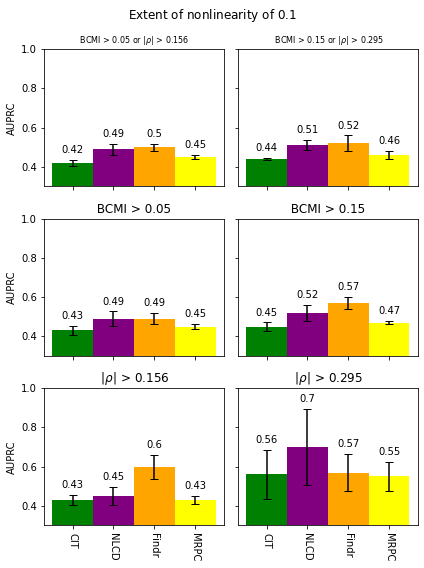

In [21]:
yeastbarplotnlrsubplots_seedrange_remainingrows_allmethods_onlypoint1_two_cols(1)

In [23]:
def yeastbarplotnlrsubplots_seedrange_remainingrows_allmethods_supplementary_split(y,cutoff):
    # yeast calculate the avg precision score for all variance for each subset different varaince 
    ### yeast analysis ################
    cutoffs = [cutoff]
    #p_values = ['both']
    p_values = ['both','bcmi', 'spear']

    #p_values = [ 'both']
    l_values = [0.05, 0.1, 0.15]
    spearman_causal=pd.read_csv("../../../findr/findrfiles/scripts/mpmi_indices/spearman_cutoff_causal.txt",header=None)[0].to_list()
    #spearman_indep=pd.read_csv("../../../findr/findrfiles/scripts/mpmi_indices/spearman_cutoff_indep.txt",header=None)[0].to_list()
    fig, axs = plt.subplots(len(p_values), len(l_values), figsize=(6, 8),sharex=True,sharey=True)
    #fig.suptitle(r'Average Precision Score across 10 seeds for a given run varying ($\Delta\mathrm{var}$)')
    fig.suptitle(rf'Extent of nonlinearity of ${cutoff}$')
    for p_index, p in enumerate(p_values):
        for l_index, l in enumerate(l_values):
            nlcd_mean=[]
            cit_mean=[]
            findr_mean=[]
            mrpc_mean=[]
            nlcd_std=[]
            cit_std=[]
            findr_std=[]
            mrpc_std=[]
            for j in range(len(cutoffs)):
                nlcd_avgprecision=[]
                cit_avgprecision=[]
                findr_avgprecision=[]
                mrpc_avgprecision=[]
                nlcd_auc=[]
                cit_auc=[]
                findr_auc=[]
                mrpc_auc=[]
                # backup2 has the older files which was a bug 
                #varcausalyeast=pd.read_csv('../../../findr/findrfiles/scripts/backup2/yeast_wilko_mi_causal_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
                #varindepyeast=pd.read_csv('../../../findr/findrfiles/scripts/backup2/yeast_wilko_mi_indep_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
                for i in range(1,11):
                    varcausalyeast=pd.read_csv('../../../findr/findrfiles/scripts/mpmi_indices/seed'+str(i)+'/yeast_wilko_mi_causal_'+p+str(l)+'_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
                    varindepyeast=pd.read_csv('../../../findr/findrfiles/scripts/mpmi_indices/seed'+str(i)+'/yeast_wilko_mi_indep_'+p+str(l)+'_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
                
                    #print("Run ",i)
                    avgprecision=calculate_avgprecision("./results/journal/yeast/wilko10runs/nlcd/yeast_causal"+str(y)+".csv", "./results/journal/yeast/wilko10runs/nlcd/yeast_indp"+str(y)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    nlcd_avgprecision.append(avgprecision)
                    #print("NLCD avg precision ", avgprecision)
                    avgprecision=calculate_avgprecision("./results/journal/yeast/wilko10runs/cit/yeast_causal_"+str(y)+".csv", "./results/journal/yeast/wilko10runs/cit/yeast_indp_"+str(y)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    #print("CIT avg precision",avgprecision)
                    cit_avgprecision.append(avgprecision)
                    avgprecision=calculate_avgprecision_findr("../../../findr/findrfiles/scripts/findr_yeast/yeast_1_1234_findr.csv","../../../findr/findrfiles/scripts/findr_yeast/yeast_0_1234_findr.csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    findr_avgprecision.append(avgprecision)
                    avgprecision=calculate_avgprecision_MRPC("./results/journal/simulation/MRPC/yeast_results/yeast_indv/1_trios_mrpc.csv","./results/journal/simulation/MRPC/yeast_results/yeast_indv/0_trios_mrpc.csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    mrpc_avgprecision.append(avgprecision)

                    precision_CIT, recall_CIT = calculate_precision_recall("./results/journal/yeast/wilko10runs/cit/yeast_causal_"+str(y)+".csv", "./results/journal/yeast/wilko10runs/cit/yeast_indp_"+str(y)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall("./results/journal/yeast/wilko10runs/nlcd/yeast_causal"+str(y)+".csv", "./results/journal/yeast/wilko10runs/nlcd/yeast_indp"+str(y)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    precision_findr,recall_findr=calculate_precision_recall_findr("../../../findr/findrfiles/scripts/findr_yeast/yeast_1_1234_findr.csv","../../../findr/findrfiles/scripts/findr_yeast/yeast_0_1234_findr.csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    precision_mrpc,recall_mrpc=calculate_precision_recall_MRPC("./results/journal/simulation/MRPC/yeast_results/yeast_indv/1_trios_mrpc.csv","./results/journal/simulation/MRPC/yeast_results/yeast_indv/0_trios_mrpc.csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    auc_score = auc(recall_nlmr_KRR, precision_nlmr_KRR)
                    #print("NLCD AUPR ",auc_score)
                    nlcd_auc.append(auc_score)
                    auc_score = auc(recall_CIT, precision_CIT)
                    #print("CIT AUPR ",auc_score)
                    cit_auc.append(auc_score)
                    auc_score=auc(recall_findr,precision_findr)
                    findr_auc.append(auc_score)
                    #auc_score=auc(recall_mrpc,precision_mrpc)
                    #mrpc_auc.append(auc_score)

                nlcd_mean.append(np.mean(nlcd_avgprecision))
                cit_mean.append(np.mean(cit_avgprecision))
                findr_mean.append(np.mean(findr_avgprecision))
                mrpc_mean.append(np.mean(mrpc_avgprecision))
                nlcd_std.append(np.std(nlcd_avgprecision))
                cit_std.append(np.std(cit_avgprecision))
                findr_std.append(np.std(findr_avgprecision))
                mrpc_std.append(np.std(mrpc_avgprecision))

            nlcd_mean=np.round(nlcd_mean,2)
            cit_mean=np.round(cit_mean,2)
            findr_mean=np.round(findr_mean,2)
            mrpc_mean=np.round(mrpc_mean,2)

            species = cutoffs
            
            algo_means = {
                'CIT': cit_mean,
                'NLCD': nlcd_mean,
                'Findr':findr_mean,
                'MRPC':mrpc_mean
            }
            #species=list(algo_means.keys())

            x = np.arange(len(species))  # the label locations
            width = 0.2  # the width of the bars , change this if the numbers are overlapping 
            multiplier = 0
            
            
            #fig, ax = plt.subplots(figsize=(10, 6),layout='constrained')
            #ax=axs[l_index]
            ax=axs[p_index,l_index]
            #ax=axs[l_index]
            for attribute, measurement in algo_means.items():
                offset = width * multiplier
                if attribute=='CIT':
                    rects = ax.bar(x + offset, measurement, width, yerr=cit_std,label=attribute,color='green',capsize=4)
                elif attribute=='NLCD':
                    rects = ax.bar(x + offset, measurement, width, yerr=nlcd_std,label=attribute,color='purple',capsize=4)    
                elif attribute=='Findr':
                    rects = ax.bar(x + offset, measurement, width, yerr=findr_std,label=attribute,color='orange',capsize=4)     
                else:
                    rects = ax.bar(x + offset, measurement, width, yerr=mrpc_std,label=attribute,color='yellow',capsize=4)   
                ax.bar_label(rects, padding=5)
                multiplier += 1

            # Add some text for labels, title and custom x-axis tick labels, etc.
            #ax.set_ylabel('Average precision score')
            #ax.set_title(r'Average Precision Score across 10 runs with varying Extent of nonlinearity ($\Delta\mathrm{var}$)')
            #ax.set_xlabel("Extent of nonlinearity")
            if(p=='both'):
                ax.set_title(fr' BCMI > {l} or $|\rho|$ > {np.round(spearman_causal[l_index],3)} ',fontsize=8)
            elif(p=='bcmi'):
                ax.set_title(f' BCMI > {l} ')
            elif(p=='spear'):
                ax.set_title(fr' $|\rho|$ > {np.round(spearman_causal[l_index],3)} ')
            #ax.set_ylim(0.3, 0.9)
            ax.set_xticks([0,0.2,0.4,0.6])
            #if(p=='bcmi' and l==0.05):
            #    ax.legend(loc='upper left', ncol=2)
            #    ax.set_ylabel('Bcmi')
            if( l==0.05):
                ax.set_ylabel('AUPRC')
            #ax.set_ylabel
            #if(p=='spear' and l==0.05):
            #    ax.set_ylabel('Average precision score \n spearman')
            ax.set_xticklabels(algo_means.keys(),rotation=-90) 
            #if( l==0.1):
            #    ax.set_xlabel("Extent of nonlinearity")

            ax.set_ylim(0.3, 1)
            print(np.round(np.mean(nlcd_std),2))
            print(np.round(np.mean(cit_std),2))
            print(np.round(np.mean(findr_std),2))
            print(np.round(np.mean(mrpc_std),2))

            #ax = axs[p_index, l_index]
            #ax.set_title(f'p: {p}, l: {l}')
            #ax.set_ylim(0.3, 0.9)
            #ax.legend(loc='upper left', ncol=2)
    fig.tight_layout()
    #fig.text(0.5, 0.08, "Extent of nonlinearity ODC cutoff", ha='center')
    #fig.text(0.08, 0.5, 'Average Precision Score', va='center', rotation='vertical')
    #plt.savefig("./results/journal/plots/figyeast_bar_nlr_seedyeast_first_"+str(y)+"_all_remsupp_"+str(cutoff)+".png", bbox_inches='tight', dpi=1200)
    #plt.savefig('./results/journal/plots/figyeast_bar_nlr_seedyeast_first_'+str(y)+'_all_remsupp_'+str(cutoff)+'.svg', bbox_inches='tight', format='svg', dpi=1200)
    #plt.savefig('./results/journal/plots/figyeast_bar_nlr_seedyeast_first_'+str(y)+'_all_remsupp_'+str(cutoff)+'.pdf', bbox_inches='tight', format='pdf', dpi=1200)


0.01
0.01
0.01
0.0
0.01
0.01
0.02
0.01
0.02
0.01
0.02
0.01
0.01
0.01
0.01
0.0
0.01
0.01
0.01
0.01
0.02
0.02
0.02
0.01
0.02
0.01
0.01
0.01
0.02
0.02
0.02
0.01
0.03
0.02
0.02
0.01


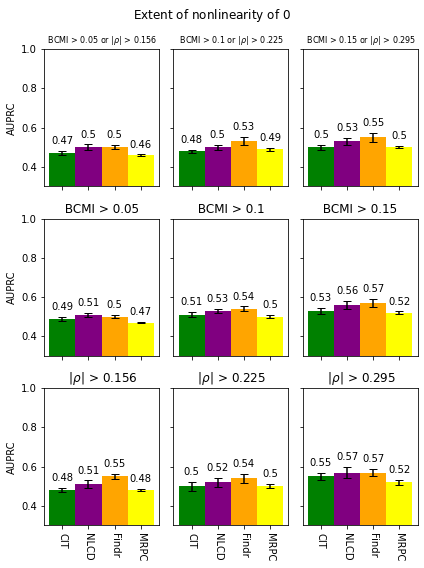

In [64]:
yeastbarplotnlrsubplots_seedrange_remainingrows_allmethods_supplementary_split(1,0)

0.02
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.03
0.02
0.03
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.02
0.01
0.03
0.02
0.02
0.01
0.04
0.02
0.04
0.01
0.03
0.02
0.03
0.02
0.08
0.04
0.04
0.03


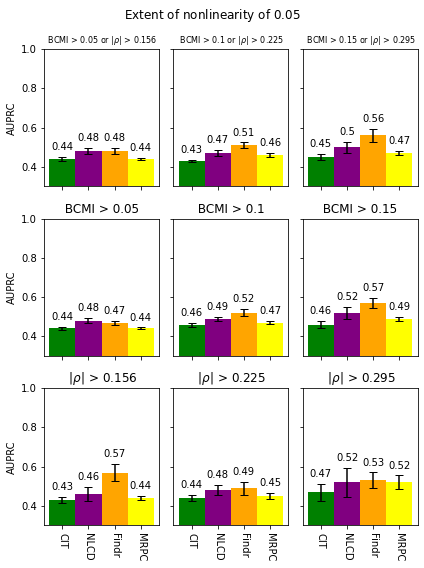

In [65]:
yeastbarplotnlrsubplots_seedrange_remainingrows_allmethods_supplementary_split(1,0.05)

0.03
0.02
0.02
0.01
0.02
0.02
0.03
0.01
0.03
0.01
0.04
0.02
0.04
0.03
0.03
0.01
0.03
0.02
0.02
0.01
0.04
0.02
0.03
0.01
0.05
0.03
0.06
0.02
0.06
0.04
0.06
0.02
0.19
0.13
0.09
0.07


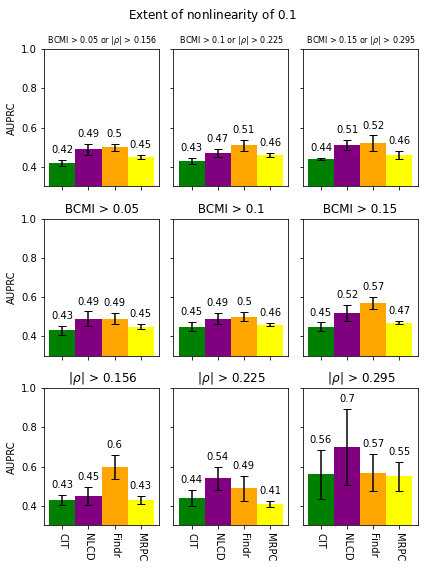

In [24]:
yeastbarplotnlrsubplots_seedrange_remainingrows_allmethods_supplementary_split(1,0.1)

In [42]:
def yeastbarplotnlrsubplots_seedrange_remainingrows_allmethods_supplementary(y):
    # yeast calculate the avg precision score for all variance for each subset different varaince 
    ### yeast analysis ################
    cutoffs = [0, 0.05]
    #p_values = ['both']
    p_values = ['both','bcmi', 'spear']

    #p_values = [ 'both']
    l_values = [0.05, 0.1, 0.15]
    spearman_causal=pd.read_csv("../../../findr/findrfiles/scripts/mpmi_indices/spearman_cutoff_causal.txt",header=None)[0].to_list()
    #spearman_indep=pd.read_csv("../../../findr/findrfiles/scripts/mpmi_indices/spearman_cutoff_indep.txt",header=None)[0].to_list()
    fig, axs = plt.subplots(len(p_values), len(l_values), figsize=(10, 8),sharex=True,sharey=True)
    #fig.suptitle(r'Average Precision Score across 10 seeds for a given run varying ($\Delta\mathrm{var}$)')
    for p_index, p in enumerate(p_values):
        for l_index, l in enumerate(l_values):
            nlcd_mean=[]
            cit_mean=[]
            findr_mean=[]
            mrpc_mean=[]
            nlcd_std=[]
            cit_std=[]
            findr_std=[]
            mrpc_std=[]
            for j in range(len(cutoffs)):
                nlcd_avgprecision=[]
                cit_avgprecision=[]
                findr_avgprecision=[]
                mrpc_avgprecision=[]
                nlcd_auc=[]
                cit_auc=[]
                findr_auc=[]
                mrpc_auc=[]
                # backup2 has the older files which was a bug 
                #varcausalyeast=pd.read_csv('../../../findr/findrfiles/scripts/backup2/yeast_wilko_mi_causal_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
                #varindepyeast=pd.read_csv('../../../findr/findrfiles/scripts/backup2/yeast_wilko_mi_indep_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
                for i in range(1,11):
                    varcausalyeast=pd.read_csv('../../../findr/findrfiles/scripts/mpmi_indices/seed'+str(i)+'/yeast_wilko_mi_causal_'+p+str(l)+'_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
                    varindepyeast=pd.read_csv('../../../findr/findrfiles/scripts/mpmi_indices/seed'+str(i)+'/yeast_wilko_mi_indep_'+p+str(l)+'_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
                
                    #print("Run ",i)
                    avgprecision=calculate_avgprecision("./results/journal/yeast/wilko10runs/nlcd/yeast_causal"+str(y)+".csv", "./results/journal/yeast/wilko10runs/nlcd/yeast_indp"+str(y)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    nlcd_avgprecision.append(avgprecision)
                    #print("NLCD avg precision ", avgprecision)
                    avgprecision=calculate_avgprecision("./results/journal/yeast/wilko10runs/cit/yeast_causal_"+str(y)+".csv", "./results/journal/yeast/wilko10runs/cit/yeast_indp_"+str(y)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    #print("CIT avg precision",avgprecision)
                    cit_avgprecision.append(avgprecision)
                    avgprecision=calculate_avgprecision_findr("../../../findr/findrfiles/scripts/findr_yeast/yeast_1_1234_findr.csv","../../../findr/findrfiles/scripts/findr_yeast/yeast_0_1234_findr.csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    findr_avgprecision.append(avgprecision)
                    avgprecision=calculate_avgprecision_MRPC("./results/journal/simulation/MRPC/yeast_results/yeast_indv/1_trios_mrpc.csv","./results/journal/simulation/MRPC/yeast_results/yeast_indv/0_trios_mrpc.csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    mrpc_avgprecision.append(avgprecision)

                    precision_CIT, recall_CIT = calculate_precision_recall("./results/journal/yeast/wilko10runs/cit/yeast_causal_"+str(y)+".csv", "./results/journal/yeast/wilko10runs/cit/yeast_indp_"+str(y)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall("./results/journal/yeast/wilko10runs/nlcd/yeast_causal"+str(y)+".csv", "./results/journal/yeast/wilko10runs/nlcd/yeast_indp"+str(y)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    precision_findr,recall_findr=calculate_precision_recall_findr("../../../findr/findrfiles/scripts/findr_yeast/yeast_1_1234_findr.csv","../../../findr/findrfiles/scripts/findr_yeast/yeast_0_1234_findr.csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    precision_mrpc,recall_mrpc=calculate_precision_recall_MRPC("./results/journal/simulation/MRPC/yeast_results/yeast_indv/1_trios_mrpc.csv","./results/journal/simulation/MRPC/yeast_results/yeast_indv/0_trios_mrpc.csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    auc_score = auc(recall_nlmr_KRR, precision_nlmr_KRR)
                    #print("NLCD AUPR ",auc_score)
                    nlcd_auc.append(auc_score)
                    auc_score = auc(recall_CIT, precision_CIT)
                    #print("CIT AUPR ",auc_score)
                    cit_auc.append(auc_score)
                    auc_score=auc(recall_findr,precision_findr)
                    findr_auc.append(auc_score)
                    #auc_score=auc(recall_mrpc,precision_mrpc)
                    #mrpc_auc.append(auc_score)

                nlcd_mean.append(np.mean(nlcd_avgprecision))
                cit_mean.append(np.mean(cit_avgprecision))
                findr_mean.append(np.mean(findr_avgprecision))
                mrpc_mean.append(np.mean(mrpc_avgprecision))
                nlcd_std.append(np.std(nlcd_avgprecision))
                cit_std.append(np.std(cit_avgprecision))
                findr_std.append(np.std(findr_avgprecision))
                mrpc_std.append(np.std(mrpc_avgprecision))

            nlcd_mean=np.round(nlcd_mean,2)
            cit_mean=np.round(cit_mean,2)
            findr_mean=np.round(findr_mean,2)
            mrpc_mean=np.round(mrpc_mean,2)

            species = cutoffs
            algo_means = {
                'CIT': cit_mean,
                'NLCD': nlcd_mean,
                'Findr':findr_mean,
                'mrpc':mrpc_mean
            }

            x = np.arange(len(species))  # the label locations
            width = 0.2  # the width of the bars , change this if the numbers are overlapping 
            multiplier = 0

            #fig, ax = plt.subplots(figsize=(10, 6),layout='constrained')
            #ax=axs[l_index]
            ax=axs[p_index,l_index]
            #ax=axs[l_index]
            for attribute, measurement in algo_means.items():
                offset = width * multiplier
                if attribute=='CIT':
                    rects = ax.bar(x + offset, measurement, width, yerr=cit_std,label=attribute,color='green',capsize=4)
                elif attribute=='NLCD':
                    rects = ax.bar(x + offset, measurement, width, yerr=nlcd_std,label=attribute,color='purple',capsize=4)    
                elif attribute=='Findr':
                    rects = ax.bar(x + offset, measurement, width, yerr=findr_std,label=attribute,color='orange',capsize=4)     
                else:
                    rects = ax.bar(x + offset, measurement, width, yerr=mrpc_std,label=attribute,color='yellow',capsize=4)   
                ax.bar_label(rects, padding=5)
                multiplier += 1

            # Add some text for labels, title and custom x-axis tick labels, etc.
            #ax.set_ylabel('Average precision score')
            #ax.set_title(r'Average Precision Score across 10 runs with varying Extent of nonlinearity ($\Delta\mathrm{var}$)')
            #ax.set_xlabel("Extent of nonlinearity")
            if(p=='both'):
                ax.set_title(fr' BCMI > {l} or $|\rho|$ > {np.round(spearman_causal[l_index],3)} ')
            elif(p=='bcmi'):
                ax.set_title(f' BCMI > {l} ')
            elif(p=='spear'):
                ax.set_title(fr' $|\rho|$ > {np.round(spearman_causal[l_index],3)} ')
            #ax.set_ylim(0.3, 0.9)
            ax.set_xticks(x + 1.5*width, [0,0.05])
            #if(p=='bcmi' and l==0.05):
            #    ax.legend(loc='upper left', ncol=2)
            #    ax.set_ylabel('Bcmi')
            if( l==0.05):
                ax.set_ylabel('Average Precision Score')
            ax.set_ylabel
            #if(p=='spear' and l==0.05):
            #    ax.set_ylabel('Average precision score \n spearman')
            if( l==0.1):
                ax.set_xlabel("Extent of nonlinearity")

            ax.set_ylim(0.3, 1)
            print(np.round(np.mean(nlcd_std),2))
            print(np.round(np.mean(cit_std),2))
            print(np.round(np.mean(findr_std),2))
            print(np.round(np.mean(mrpc_std),2))

            #ax = axs[p_index, l_index]
            #ax.set_title(f'p: {p}, l: {l}')
            #ax.set_ylim(0.3, 0.9)
            #ax.legend(loc='upper left', ncol=2)
    fig.tight_layout()
    #fig.text(0.5, 0.08, "Extent of nonlinearity ODC cutoff", ha='center')
    #fig.text(0.08, 0.5, 'Average Precision Score', va='center', rotation='vertical')
    plt.savefig("./results/journal/plots/figyeast_bar_nlr_seedyeast_first"+str(y)+"_all_remsupp.png", bbox_inches='tight', dpi=1200)
    plt.savefig('./results/journal/plots/figyeast_bar_nlr_seedyeast_first'+str(y)+'_all_remsupp.svg', bbox_inches='tight', format='svg', dpi=1200)


0.01
0.01
0.01
0.0
0.01
0.01
0.02
0.01
0.02
0.01
0.03
0.01
0.01
0.01
0.01
0.0
0.01
0.01
0.02
0.01
0.03
0.02
0.02
0.01
0.03
0.01
0.03
0.01
0.03
0.02
0.03
0.01
0.05
0.03
0.03
0.02


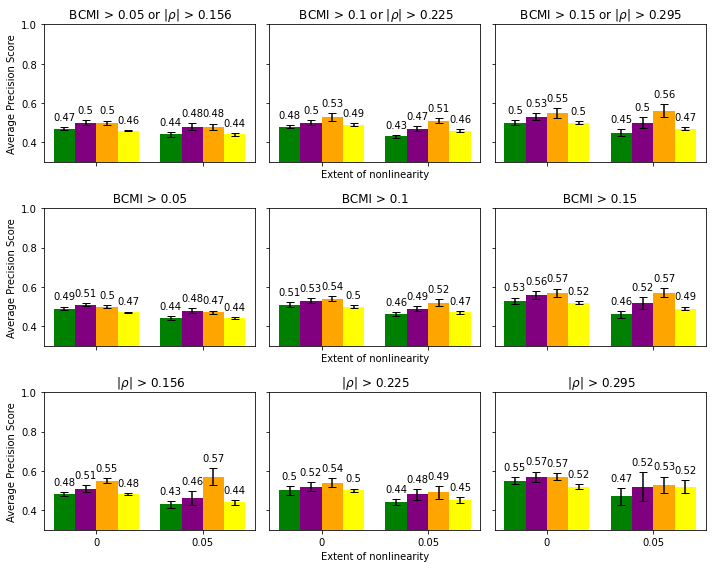

In [43]:

yeastbarplotnlrsubplots_seedrange_remainingrows_allmethods_supplementary(1)

In [ ]:
'''
This function is not used
def yeastbarplotnlrsubplots_seedrange_others(y):
    # yeast calculate the avg precision score for all variance for each subset different varaince 
    ### yeast analysis ################
    cutoffs = [0, 0.05, 0.1]
    p_values = ['bcmi', 'spear']
    #p_values = [ 'both']
    l_values = [0.05, 0.1, 0.15]
    spearman_causal=pd.read_csv("../../../findr/findrfiles/scripts/mpmi_indices/spearman_cutoff_causal.txt",header=None)[0].to_list()
    spearman_indep=pd.read_csv("../../../findr/findrfiles/scripts/mpmi_indices/spearman_cutoff_indep.txt",header=None)[0].to_list()
    fig, axs = plt.subplots(len(p_values), len(l_values), figsize=(10, 10),sharex=True,sharey=True)
    fig.suptitle(r'Average Precision Score across 10 seeds for a given run varying ($\Delta\mathrm{var}$)')
    for p_index, p in enumerate(p_values):
        for l_index, l in enumerate(l_values):
            nlcd_mean=[]
            cit_mean=[]
            nlcd_std=[]
            cit_std=[]
            for j in range(len(cutoffs)):
                nlcd_avgprecision=[]
                cit_avgprecision=[]
                nlcd_auc=[]
                cit_auc=[]
                # backup2 has the older files which was a bug 
                #varcausalyeast=pd.read_csv('../../../findr/findrfiles/scripts/backup2/yeast_wilko_mi_causal_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
                #varindepyeast=pd.read_csv('../../../findr/findrfiles/scripts/backup2/yeast_wilko_mi_indep_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
                for i in range(1,11):
                    varcausalyeast=pd.read_csv('../../../findr/findrfiles/scripts/mpmi_indices/seed'+str(i)+'/yeast_wilko_mi_causal_'+p+str(l)+'_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
                    varindepyeast=pd.read_csv('../../../findr/findrfiles/scripts/mpmi_indices/seed'+str(i)+'/yeast_wilko_mi_indep_'+p+str(l)+'_'+str(cutoffs[j])+'.csv',header=None)[0].to_list()
                
                    #print("Run ",i)
                    avgprecision=calculate_avgprecision("./results/journal/yeast/wilko10runs/nlcd/yeast_causal"+str(y)+".csv", "./results/journal/yeast/wilko10runs/nlcd/yeast_indp"+str(y)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    nlcd_avgprecision.append(avgprecision)
                    #print("NLCD avg precision ", avgprecision)
                    avgprecision=calculate_avgprecision("./results/journal/yeast/wilko10runs/cit/yeast_causal_"+str(y)+".csv", "./results/journal/yeast/wilko10runs/cit/yeast_indp_"+str(y)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    #print("CIT avg precision",avgprecision)
                    cit_avgprecision.append(avgprecision)
                    precision_CIT, recall_CIT = calculate_precision_recall("./results/journal/yeast/wilko10runs/cit/yeast_causal_"+str(y)+".csv", "./results/journal/yeast/wilko10runs/cit/yeast_indp_"+str(y)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall("./results/journal/yeast/wilko10runs/nlcd/yeast_causal"+str(y)+".csv", "./results/journal/yeast/wilko10runs/nlcd/yeast_indp"+str(y)+".csv",causal_id=varcausalyeast,indep_id=varindepyeast)
                    auc_score = auc(recall_nlmr_KRR, precision_nlmr_KRR)
                    #print("NLCD AUPR ",auc_score)
                    nlcd_auc.append(auc_score)
                    auc_score = auc(recall_CIT, precision_CIT)
                    #print("CIT AUPR ",auc_score)
                    cit_auc.append(auc_score)

                nlcd_mean.append(np.mean(nlcd_avgprecision))
                cit_mean.append(np.mean(cit_avgprecision))
                nlcd_std.append(np.std(nlcd_avgprecision))
                cit_std.append(np.std(cit_avgprecision))

            nlcd_mean=np.round(nlcd_mean,3)
            cit_mean=np.round(cit_mean,3)


            species = cutoffs
            algo_means = {
                'CIT': cit_mean,
                'NLCD': nlcd_mean
            }

            x = np.arange(len(species))  # the label locations
            width = 0.4  # the width of the bars , change this if the numbers are overlapping 
            multiplier = 0

            #fig, ax = plt.subplots(figsize=(10, 6),layout='constrained')
            ax=axs[p_index,l_index]
            #ax=axs[l_index]
            for attribute, measurement in algo_means.items():
                offset = width * multiplier
                if attribute=='CIT':
                    rects = ax.bar(x + offset, measurement, width, yerr=cit_std,label=attribute,color='green',capsize=4)
                else:
                    rects = ax.bar(x + offset, measurement, width, yerr=nlcd_std,label=attribute,color='purple',capsize=4)    
                ax.bar_label(rects, padding=5)
                multiplier += 1

            # Add some text for labels, title and custom x-axis tick labels, etc.
            #ax.set_ylabel('Average precision score')
            #ax.set_title(r'Average Precision Score across 10 runs with varying Extent of nonlinearity ($\Delta\mathrm{var}$)')
            #ax.set_xlabel("Extent of nonlinearity")
            if p=='bcmi':
                ax.set_title(f' bcmi > {l} ')
            else:
                ax.set_title(f' spearman > {l} ')
            #ax.set_ylim(0.3, 0.9)
            ax.set_xticks(x + width/2, [0,0.05,0.1])
            #if(p=='bcmi' and l==0.05):
            #    ax.legend(loc='upper left', ncol=2)
            #    ax.set_ylabel('Bcmi')
            if(l==0.05):
                ax.set_ylabel('AUPR')
            ax.set_ylabel
            #if(p=='spear' and l==0.05):
            #    ax.set_ylabel('Average precision score \n spearman')
            if( l==0.1):
                ax.set_xlabel("Extent of nonlinearity")

            ax.set_ylim(0.3, 0.6)
            print(np.round(np.mean(nlcd_std),4))
            print(np.round(np.mean(cit_std),4))


            #ax = axs[p_index, l_index]
            #ax.set_title(f'p: {p}, l: {l}')
            #ax.set_ylim(0.3, 0.9)
            #ax.legend(loc='upper left', ncol=2)
    fig.tight_layout()
    #fig.text(0.5, 0.08, "Extent of nonlinearity ODC cutoff", ha='center')
    #fig.text(0.08, 0.5, 'Average Precision Score', va='center', rotation='vertical')
    plt.savefig("./results/journal/plots/figyeast_bar_nlr_seedyeast_others"+str(y)+".png", bbox_inches='tight', dpi=1200)
    plt.savefig('./results/journal/plots/figyeast_bar_nlr_seedyeast_others'+str(y)+'.svg', bbox_inches='tight', format='svg', dpi=1200)
    '''


In [ ]:
#yeastbarplotnlrsubplots_seedrange_others(1)

In [ ]:
def yeasttable():
    cutoff=[]
    ctrios=[]
    cuniquecisL=[]
    cuniquecis=[]
    ctarget=[]
    ceqtl=[]
    itrios=[]
    iuniquecisL=[]
    iuniquecis=[]
    itarget=[]
    ieqtl=[]
    cutoff=  [0,0.1,0.125,0.15,0.175,0.2,0.225,0.25]
    for i in [0,0.1,0.125,0.15,0.175,0.2,0.225,0.25]:
        dfcausal=read_configuration("../../../findr/findrfiles/scripts/yeastgt_1_wilko1234_ready.txt")
        dfindep=read_configuration("../../../findr/findrfiles/scripts/yeastgt_0_wilko1234_ready.txt")
        varcausalyeast=pd.read_csv('../../../findr/findrfiles/scripts/var_indices/yeast_wilko_var_causal_'+str(i)+'.csv',header=None)[0].to_list()
        varindepyeast=pd.read_csv('../../../findr/findrfiles/scripts/var_indices/yeast_wilko_var_indep_'+str(i)+'.csv',header=None)[0].to_list()

        temp=dfcausal.iloc[varcausalyeast,]
        #print("uniq causal",len(temp.drop_duplicates(keep='first')))
        
        ctrios.append(len(temp))
        cuniquecisL.append(len(temp.groupby([0,1]).size()))
        cuniquecis.append(len(pd.unique(temp[1])))
        ctarget.append(len(pd.unique(temp[2])))
        ceqtl.append(len(pd.unique(temp[0])))

        temp=dfindep.iloc[varindepyeast,]
        #print("uniq indp",len(temp.drop_duplicates(keep='first')))

        itrios.append(len(temp))
        iuniquecisL.append(len(temp.groupby([0,1]).size()))
        iuniquecis.append(len(pd.unique(temp[1])))
        itarget.append(len(pd.unique(temp[2])))
        ieqtl.append(len(pd.unique(temp[0])))

    #causaltable=pd.DataFrame({'cutoff':cutoff,'No of causal trios':ctrios,'Unique cis genes wrt L':cuniquecisL,'Unique cis genes':cuniquecis,"Unique target genes":ctarget,"Unique eQTL":ceqtl})
    #indeptable=pd.DataFrame({'cutoff':cutoff,'No of indep trios':itrios,'Unique cis genes wrt L':iuniquecisL,'Unique cis genes':iuniquecis,"Unique target genes":itarget,"Unique eQTL":ieqtl})
    causaltable=pd.DataFrame({'Extent relative difference':cutoff,'No of causal trios':ctrios,'Unique cis genes':cuniquecis,"Unique target genes":ctarget})
    indeptable=pd.DataFrame({'Extent relative difference':cutoff,'No of indep trios':itrios,'Unique cis genes':iuniquecis,"Unique target genes":itarget})
    
    return causaltable,indeptable
        

In [ ]:
causaltable,indeptable= yeasttable()

In [ ]:
causaltable.to_csv("causaltableyeast.csv",header=True)
indeptable.to_csv("indeptableyeast.csv",header=True)

In [26]:
def yeasttable_updated_bcmi_cutoff(bcmi_cutoff,seed):
    cutoff=[]
    ctrios=[]
    cuniquecisL=[]
    cuniquecis=[]
    ctarget=[]
    ceqtl=[]
    itrios=[]
    iuniquecisL=[]
    iuniquecis=[]
    itarget=[]
    ieqtl=[]
    cutoff=  [0,0.1,0.15,0.2,0.25]
    for i in [0,0.1,0.15,0.2,0.25]:
        dfcausal=read_configuration("../../../findr/findrfiles/scripts/yeastgt_1_wilko1234_ready.txt")
        dfindep=read_configuration("../../../findr/findrfiles/scripts/yeastgt_0_wilko1234_ready.txt")
        varcausalyeast=pd.read_csv("../../../findr/findrfiles/scripts/varandnonlinear_indices/seed"+str(seed) + "/yeast_causal_var" + str(i) + "both" + str(bcmi_cutoff) + "_0.csv",header=None)[0].to_list()
        varindepyeast=pd.read_csv("../../../findr/findrfiles/scripts/varandnonlinear_indices/seed"+str(seed) + "/yeast_indep_var" + str(i) + "both" + str(bcmi_cutoff) + "_0.csv",header=None)[0].to_list()

        temp=dfcausal.iloc[varcausalyeast,]
        #print("uniq causal",len(temp.drop_duplicates(keep='first')))
        
        ctrios.append(len(temp))
        cuniquecisL.append(len(temp.groupby([0,1]).size()))
        cuniquecis.append(len(pd.unique(temp[1])))
        ctarget.append(len(pd.unique(temp[2])))
        ceqtl.append(len(pd.unique(temp[0])))

        temp=dfindep.iloc[varindepyeast,]
        #print("uniq indp",len(temp.drop_duplicates(keep='first')))

        itrios.append(len(temp))
        iuniquecisL.append(len(temp.groupby([0,1]).size()))
        iuniquecis.append(len(pd.unique(temp[1])))
        itarget.append(len(pd.unique(temp[2])))
        ieqtl.append(len(pd.unique(temp[0])))

    #causaltable=pd.DataFrame({'cutoff':cutoff,'No of causal trios':ctrios,'Unique cis genes wrt L':cuniquecisL,'Unique cis genes':cuniquecis,"Unique target genes":ctarget,"Unique eQTL":ceqtl})
    #indeptable=pd.DataFrame({'cutoff':cutoff,'No of indep trios':itrios,'Unique cis genes wrt L':iuniquecisL,'Unique cis genes':iuniquecis,"Unique target genes":itarget,"Unique eQTL":ieqtl})
    causaltable=pd.DataFrame({'Extent relative difference':cutoff,'No of causal trios':ctrios,'Unique cis genes':cuniquecis,"Unique target genes":ctarget})
    indeptable=pd.DataFrame({'Extent relative difference':cutoff,'No of indep trios':itrios,'Unique cis genes':iuniquecis,"Unique target genes":itarget})
    
    return causaltable,indeptable
        

In [27]:
causaltable,indeptable= yeasttable_updated_bcmi_cutoff(bcmi_cutoff=0.1,seed=7)

In [28]:
causaltable

,Extent relative difference,No of causal trios,Unique cis genes,Unique target genes
0,0.00,216,22,205
1,0.10,63,11,63
2,0.15,60,9,60
3,0.20,10,5,10
4,0.25,10,5,10


In [30]:
indeptable

,Extent relative difference,No of indep trios,Unique cis genes,Unique target genes
0,0.00,216,32,210
1,0.10,103,19,102
2,0.15,85,12,85
3,0.20,28,7,28
4,0.25,24,6,24


In [29]:
causaltable.to_csv("causaltableyeast_updated_bcmi_cutoff0.1.csv",header=True)
indeptable.to_csv("indeptableyeast_updated_bcmi_cutoff0.1.csv",header=True)

In [ ]:
#scatter plot of KLF5 ENSG00000102554  and SLC17A9 ENSG00000101194
df=read_data('./gtex/adipose/human_adipose_deseq.txt')
dfconf=read_configuration('./gtex/adipose/human_adipose_deseq.txt')

In [ ]:
# get the row number of SDHAP2 : ENSG00000215837.7, AC024560.2 : ENSG00000236833.1
dfconf[dfconf[1]=="ENSG00000215837.7"]

In [ ]:

fig, ax = plt.subplots()

scatter = ax.scatter(df[4227][1], df[4227][2], c=df[4227][0])

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower right", title="L values")
ax.add_artist(legend1)
ax.set_title("Scatter plot of SDHAP2 gene vs AC024560.2 gene")
ax.set_xlabel("SDHAP2 gene expression")
ax.set_ylabel("AC024560.2 gene expression")
plt.savefig("./results/journal/plots/fig_muscle_scatter.png", bbox_inches='tight', dpi=1200)
plt.savefig('./results/journal/plots/fig_muscle_scatter.svg', bbox_inches='tight', format='svg', dpi=1200)


In [13]:
def find_aupr():
    ### Figure 2 supplementary ################
    nlcd_dir="./results/journal/simulation/nlcd/"
    cit_dir="./results/journal/simulation/cit/"
    norows=3
    nocols=3
    fig, ax = plt.subplots(nrows=norows, ncols=nocols, sharex=True, sharey=True, figsize=(10,10))
    fig.suptitle("Precision-Recall Curve plots for 500 permutations ")
    #fig.text(0.5, 1, 'Precision-Recall Curve plots', ha='center')
    #fig.text(0.22, 1, 'Linear', ha='center')
    #fig.text(0.52, 1, 'Sine', ha='center')
    #fig.text(0.85, 1, 'Saw', ha='center')
    #fig.text(0,0.20, 'Sample size 1000', va='center', rotation='vertical')
    #fig.text(0,0.50, 'Sample size 500', va='center', rotation='vertical')
    #fig.text(0,0.79, 'Sample size 300', va='center', rotation='vertical')

    plot_index = 0
    avg_auc_nlmr_sine=0
    avg_auc_cit_sine=0
    avg_auc_nlmr_saw=0
    avg_auc_cit_saw=0
    count=0
    for i in ['300', '500', '1000'] :
     
        for j in ['Linear', 'Sine', 'Saw']:
            for k in [ '500']: # put 100 permutations in supplementary 
                precision_nlmr_SVR, recall_nlmr_SVR = calculate_precision_recall(nlcd_dir + j + "SVR" + i + "s" + k + "perm.csv", nlcd_dir+"IndpSVR" + i + "s" + k + "perm.csv")
                
                precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall(nlcd_dir + j + "KRR" + i + "s" + k + "perm.csv", nlcd_dir+"IndpKRR" + i + "s" + k + "perm.csv")
                print("NLMR (KRR) Sample size", i, "Data type", j, "AUPR", auc(recall_nlmr_KRR, precision_nlmr_KRR))
                if(j=='Saw'):
                    avg_auc_nlmr_saw+=auc(recall_nlmr_KRR,precision_nlmr_KRR)
                if(j=='Sine'):
                    avg_auc_nlmr_sine+=auc(recall_nlmr_KRR, precision_nlmr_KRR)
                precision_nlmr_ANN, recall_nlmr_ANN = calculate_precision_recall(nlcd_dir + j + "ANN" + i + "s" + k + "perm.csv", nlcd_dir+"IndpANN" + i + "s" + k + "perm.csv")
                precision_CIT, recall_CIT = calculate_precision_recall(cit_dir + j + i + "cit" + k + "perm.csv", cit_dir+"Indp" + i + "cit" + k + "perm.csv")
                print("CIT Sample size", i, "Data type", j, "AUPR", auc(recall_CIT, precision_CIT))
                if(j=='Saw'):
                    avg_auc_cit_saw+=auc(recall_CIT,precision_CIT)
                if(j=='Sine'):
                    print(avg_auc_cit_sine)
                    avg_auc_cit_sine+=auc(recall_CIT, precision_CIT)
                    count+=1
                curr_ax = ax[plot_index // nocols, plot_index % nocols]
                
                #curr_ax.plot(recall_CIT,precision_CIT,color=color_algo['CIT'])
                #curr_ax.plot(recall_nlmr_ANN,precision_nlmr_ANN,color=color_algo['ANN'])
                #curr_ax.plot(recall_nlmr_SVR,precision_nlmr_SVR,color=color_algo['SVR'])
                #curr_ax.plot(recall_nlmr_KRR,precision_nlmr_KRR,color=color_algo['KRR'])
                disp = PrecisionRecallDisplay(precision=precision_nlmr_SVR, recall=recall_nlmr_SVR)
                disp.plot(ax=curr_ax, color=color_algo['SVR'])
                disp = PrecisionRecallDisplay(precision=precision_nlmr_ANN, recall=recall_nlmr_ANN)
                disp.plot(ax=curr_ax, color=color_algo['ANN'])
                disp = PrecisionRecallDisplay(precision=precision_CIT, recall=recall_CIT)
                disp.plot(ax=curr_ax, color=color_algo['CIT'])
                disp = PrecisionRecallDisplay(precision=precision_nlmr_KRR, recall=recall_nlmr_KRR)
                disp.plot(ax=curr_ax, color=color_algo['KRR'])
                curr_ax.set_ylabel('')
                curr_ax.set_xlabel('')
                if(plot_index // nocols == 0 and plot_index % nocols == 0):
                    curr_ax.set_title('Linear')
                elif(plot_index // nocols == 0 and plot_index % nocols == 1):
                    curr_ax.set_title('Sine')
                elif(plot_index // nocols == 0 and plot_index % nocols == 2):
                    curr_ax.set_title('Sawtooth')   
                if(plot_index % nocols == 0 and plot_index//norows==0):
                    curr_ax.set_ylabel('Sample size =300 \n Precision')
                if(plot_index % nocols == 0 and plot_index//norows==1):
                    curr_ax.set_ylabel('Sample size =500 \n Precision')
                if(plot_index % nocols == 0 and plot_index//norows==2):
                    curr_ax.set_ylabel('Sample size =1000 \n Precision')
                if(plot_index //nocols == (norows-1)):
                    curr_ax.set_xlabel('Recall')
                if(plot_index // nocols == norows-1 and plot_index % nocols == 0) :# if the plot is lower left, then add the legend in that plot
                    xindex=norows-1
                    yindex=0
                    handles = [ax[xindex, yindex].lines[3],ax[xindex,yindex].lines[0], ax[xindex, yindex].lines[1],ax[xindex, yindex].lines[2]]
                    labels = ['NLCD (KRR)','NLCD (SVR)', 'NLCD (ANN)',  'CIT (baseline)']
                    curr_ax.legend(handles,labels,loc="lower left")
            
                
                plot_index += 1
        #print(avg_auc_cit)
        #print(avg_auc_nlmr)
        #print(count)
    avg_auc_cit_sine/=3
    avg_auc_nlmr_sine/=3
    avg_auc_cit_saw/=3
    avg_auc_nlmr_saw/=3
    print("Sine Average auc CIT",avg_auc_cit_sine)
    print("Sine Average auc NLMR",avg_auc_nlmr_sine)
    print("Saw Average auc CIT",avg_auc_cit_saw)
    print("Saw Average auc NLMR",avg_auc_nlmr_saw)
    print("Average of CIT",(avg_auc_cit_sine+avg_auc_cit_saw)/2)
    print("Average of NLCD",(avg_auc_nlmr_sine+avg_auc_nlmr_saw)/2)
    fig.tight_layout()
    #plt.savefig("./results/journal/plots/fig_2_suppl_a.png",bbox_inches='tight',dpi=1200)
    #plt.savefig('./results/journal/plots/fig_2_suppl_a.svg', bbox_inches='tight',format='svg', dpi=1200)

NLMR (KRR) Sample size 300 Data type Linear AUPR 0.9442228715906973
CIT Sample size 300 Data type Linear AUPR 0.9169407437994103
NLMR (KRR) Sample size 300 Data type Sine AUPR 0.7674378731361557
CIT Sample size 300 Data type Sine AUPR 0.6153730031748965
0
NLMR (KRR) Sample size 300 Data type Saw AUPR 0.678020777758964
CIT Sample size 300 Data type Saw AUPR 0.5147555095171252
NLMR (KRR) Sample size 500 Data type Linear AUPR 0.9451755982298657
CIT Sample size 500 Data type Linear AUPR 0.9475981142150545
NLMR (KRR) Sample size 500 Data type Sine AUPR 0.7995303676047848
CIT Sample size 500 Data type Sine AUPR 0.6438583788252574
0.6153730031748965
NLMR (KRR) Sample size 500 Data type Saw AUPR 0.7317370770544727
CIT Sample size 500 Data type Saw AUPR 0.5755032690116539
NLMR (KRR) Sample size 1000 Data type Linear AUPR 0.9442076751885035
CIT Sample size 1000 Data type Linear AUPR 0.9551997348010387
NLMR (KRR) Sample size 1000 Data type Sine AUPR 0.787983696334795
CIT Sample size 1000 Data typ

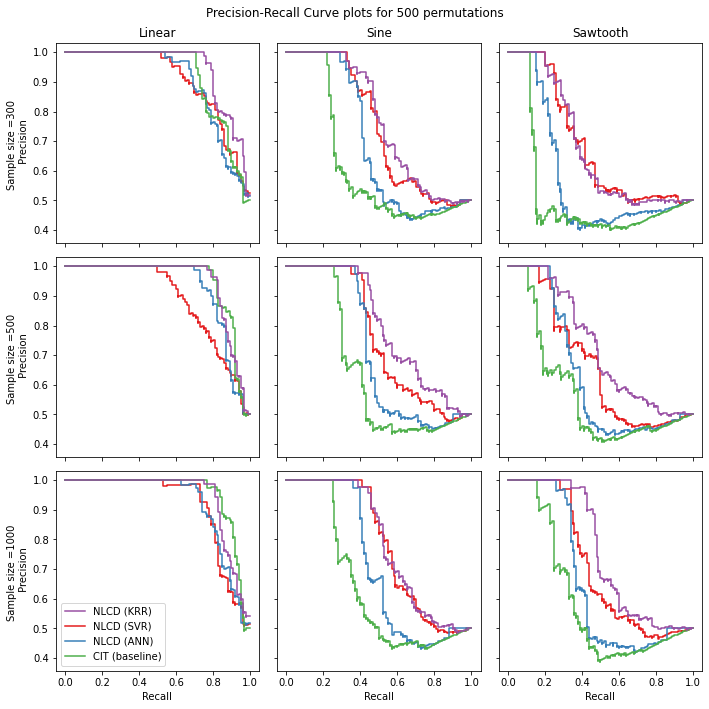

In [14]:
find_aupr()

## Combine the predictions of all the methods 

In [72]:

#CIT
cit_causal=pd.read_csv("./results/journal/yeast/wilko500/cit/yeast_causal_1234.csv")
cit_indep=pd.read_csv("./results/journal/yeast/wilko500/cit/yeast_indp_1234.csv")
#mrpc
mrpc_indep=pd.read_csv("./results/journal/simulation/MRPC/yeast_results/yeast_indv/0_trios_mrpc.csv")
mrpc_causal=pd.read_csv("./results/journal/simulation/MRPC/yeast_results/yeast_indv/1_trios_mrpc.csv")
#nlcd
nlcd_causal=pd.read_csv("./results/journal/yeast/wilko500/nlcd/yeast_causal.csv")
nlcd_indep=pd.read_csv("./results/journal/yeast/wilko500/nlcd/yeast_indp.csv")
#findr
findr_causal=pd.read_csv("/data/users/cs20s037/CITNonLinear/findr/findrfiles/scripts/findr_yeast/yeast_1_1234_findr.csv")
findr_indep=pd.read_csv("/data/users/cs20s037/CITNonLinear/findr/findrfiles/scripts/findr_yeast/yeast_0_1234_findr.csv")

#read the yeast trio names
causal_conf=read_configuration("/data/users/cs20s037/CITNonLinear/findr/findrfiles/scripts/yeastgt_1_wilko1234_ready.txt")
indp_conf=read_configuration("/data/users/cs20s037/CITNonLinear/findr/findrfiles/scripts/yeastgt_0_wilko1234_ready.txt")

In [73]:
#causal data
for fdr in [0.05,0.25,0.5,0.75,1]:
    mrpc_causal_filter = mrpc_causal[mrpc_causal['fdr'] == fdr].reset_index()

    edge_columns = [col for col in mrpc_causal_filter.columns if col.startswith('edge names')]

    # Iterate through each row
    for index, row in mrpc_causal_filter.iterrows():
        present = 0  # Initialize present as 0
        # Iterate through each edge column in the row
        for col in edge_columns:
            # Check if 'A|B' is present in the current edge column
            if 'A|B' == row[col]:
                present = 1  # If present, set present to 1
                break  # No need to continue, we found 'A|B'
        mrpc_causal_filter.loc[index, 'Present'] = present  # Assign present value to 'Present' column


    causal_table=pd.concat([causal_conf,mrpc_causal_filter['Present'],cit_causal['p_cit'],nlcd_causal['p_final'],findr_causal['p_val']],axis=1)
    causal_table.insert(0, 'Trio_Number', range(1, len(causal_table) + 1))
    new_column_names = {'Trio_Number': 'trio_number', 0: 'L',1:'A',2:'B','Present':'mrpc_present','p_cit':'p_cit','p_final':'p_nlcd','p_val':'prob_findr'}
    causal_table=causal_table.rename(columns=new_column_names)
    causal_table.to_csv('./results/journal/yeast/combined_results/causal/causal_fdr'+str(fdr)+".csv",index=False)



In [74]:
#independent data
for fdr in [0.05,0.25,0.5,0.75,1]:
    mrpc_indep_filter = mrpc_indep[mrpc_indep['fdr'] == fdr].reset_index()

    edge_columns = [col for col in mrpc_indep_filter.columns if col.startswith('edge names')]

    # Iterate through each row
    for index, row in mrpc_indep_filter.iterrows():
        present = 0  # Initialize present as 0
        # Iterate through each edge column in the row
        for col in edge_columns:
            # Check if 'A|B' is present in the current edge column
            if 'A|B' == row[col]:
                present = 1  # If present, set present to 1
                break  # No need to continue, we found 'A|B'
        mrpc_indep_filter.loc[index, 'Present'] = present  # Assign present value to 'Present' column


    indep_table=pd.concat([indp_conf,mrpc_indep_filter['Present'],cit_indep['p_cit'],nlcd_indep['p_final'],findr_indep['p_val']],axis=1)
    indep_table.insert(0, 'Trio_Number', range(1, len(indep_table) + 1))
    new_column_names = {'Trio_Number': 'trio_number', 0: 'L',1:'A',2:'B','Present':'mrpc_present','p_cit':'p_cit','p_final':'p_nlcd','p_val':'prob_findr'}
    indep_table=indep_table.rename(columns=new_column_names)
    indep_table.to_csv('./results/journal/yeast/combined_results/indep/indep_fdr'+str(fdr)+".csv",index=False)

In [24]:

def find_aupr_average_precision():
    ### Figure round_digit ################
    #this is for sample 500
    nlcd_dir="./results/journal/simulation/nlcd/"
    cit_dir="./results/journal/simulation/cit/"
    findr_dir="./results/journal/simulation/findr/"
    mrpc_dir="./results/journal/simulation/MRPC/sim_results/edges_robust/"
    round_digit=3

    for i in [ '300','500','1000'] :
        for j in ['Linear', 'Sine', 'Saw']:
            print("Data type: ", j)
            print("Sample size",i)
            for k in [ '500']: # put 100 permutations in supplementary 
                #precision_nlmr_SVR, recall_nlmr_SVR = calculate_precision_recall(nlcd_dir + j + "SVR" + i + "s" + k + "perm.csv", nlcd_dir+"IndpSVR" + i + "s" + k + "perm.csv")
                #print('nlcd SVR ',round(calculate_avgprecision(nlcd_dir + j + "SVR" + i + "s" + k + "perm.csv", nlcd_dir+"IndpSVR" + i + "s" + k + "perm.csv"),round_digit))
              
                precision_nlmr_KRR, recall_nlmr_KRR = calculate_precision_recall(nlcd_dir + j + "KRR" + i + "s" + k + "perm.csv", nlcd_dir+"IndpKRR" + i + "s" + k + "perm.csv")
                print('nlcd krr ',round(calculate_avgprecision(nlcd_dir + j + "KRR" + i + "s" + k + "perm.csv", nlcd_dir+"IndpKRR" + i + "s" + k + "perm.csv"),round_digit))
             
                #precision_nlmr_ANN, recall_nlmr_ANN = calculate_precision_recall(nlcd_dir + j + "ANN" + i + "s" + k + "perm.csv", nlcd_dir+"IndpANN" + i + "s" + k + "perm.csv")
                #print('nlcd ann ',round(calculate_avgprecision(nlcd_dir + j + "ANN" + i + "s" + k + "perm.csv", nlcd_dir+"IndpANN" + i + "s" + k + "perm.csv"),round_digit))
             
                precision_CIT, recall_CIT = calculate_precision_recall(cit_dir + j + i + "cit" + k + "perm.csv", cit_dir+"Indp" + i + "cit" + k + "perm.csv")
                print('cit ',round(calculate_avgprecision(cit_dir + j + i + "cit" + k + "perm.csv", cit_dir+"Indp" + i + "cit" + k + "perm.csv"),round_digit))
             
                precision_findr, recall_findr = calculate_precision_recall_findr(findr_dir + j + i  +"findr"+ ".csv", findr_dir + "Indp" + i +"findr"  + ".csv")
                print('findr ',round(calculate_avgprecision_findr(findr_dir + j + i  +"findr"+ ".csv", findr_dir + "Indp" + i +"findr"  + ".csv"),round_digit))

                
                precision_mrpc, recall_mrpc = calculate_precision_recall_MRPC(mrpc_dir + j + i  +"mrpc"+ ".csv", mrpc_dir + "Indp" + i +"mrpc"  + ".csv")
                print('mrpc ',round(calculate_avgprecision_MRPC(mrpc_dir + j + i  +"mrpc"+ ".csv", mrpc_dir + "Indp" + i +"mrpc"  + ".csv"),round_digit))
          
           
        
      



In [25]:
find_aupr_average_precision()

Data type:  Linear
Sample size 300
nlcd krr  0.944
cit  0.917
findr  0.93
mrpc  0.974
Data type:  Sine
Sample size 300
nlcd krr  0.768
cit  0.617
findr  0.554
mrpc  0.722
Data type:  Saw
Sample size 300
nlcd krr  0.679
cit  0.517
findr  0.479
mrpc  0.681
Data type:  Linear
Sample size 500
nlcd krr  0.945
cit  0.948
findr  0.94
mrpc  0.989
Data type:  Sine
Sample size 500
nlcd krr  0.8
cit  0.645
findr  0.627
mrpc  0.776
Data type:  Saw
Sample size 500
nlcd krr  0.733
cit  0.578
findr  0.495
mrpc  0.687
Data type:  Linear
Sample size 1000
nlcd krr  0.944
cit  0.955
findr  0.938
mrpc  0.998
Data type:  Sine
Sample size 1000
nlcd krr  0.789
cit  0.642
findr  0.658
mrpc  0.761
Data type:  Saw
Sample size 1000
nlcd krr  0.76
cit  0.602
findr  0.556
mrpc  0.765
